<div style="margin-bottom: 200px;"></div>
<div style="display: flex; justify-content: center;">
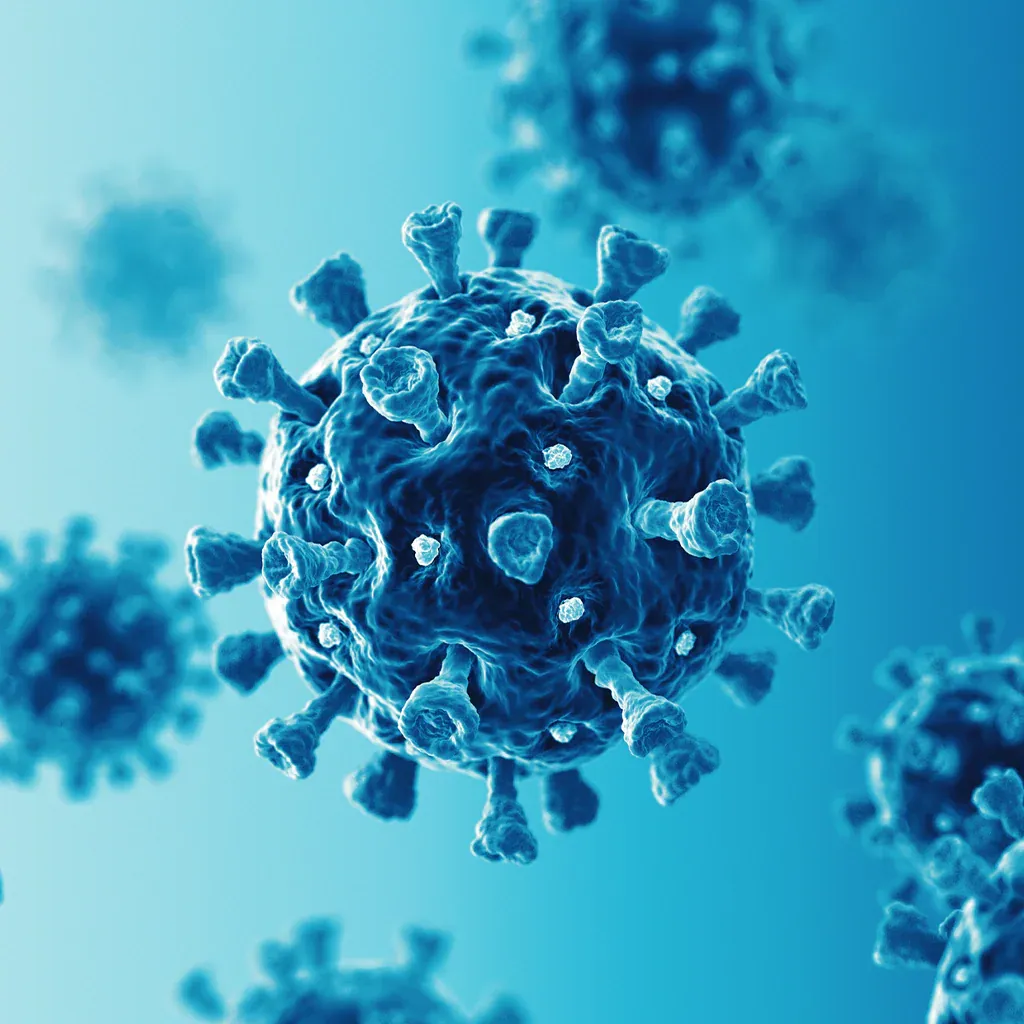
</div>
<div style="width: 400px; margin: 0 auto; text-align: right; font-size: xx-small;">
    Source: CDC
</div>

<h1 style='text-align: center;'>Diagnosis of the COVID-19</h1>

<div style="margin-bottom: 50px;"></div>
<div style="display: flex; justify-content: center;">
    <table style="border-collapse: collapse; border: 0;">
        <tr>
            <td style="text-align:center; vertical-align:middle; padding:10px 40px 10px 10px; border: 0;">
                <h3 style="margin: 0;">Radek Holik</h3>
            </td>
        </tr>
    </table>
</div>
<br>
<br>
<br>

The goal of this project is to leverage machine learning techniques to predict Diagnosis from a dataset of clinical and demographic features related to respiratory illnesses such as COVID-19 and influenza (referred to as the covid_flu dataset). In the context of healthcare, accurate and timely diagnosis is crucial for effective treatment and patient management. With the increasing availability of medical data, machine learning models can assist healthcare professionals by automating the diagnosis process, offering data-driven insights, and potentially improving the accuracy and speed of diagnosis.

This project encompasses multiple stages, starting from Exploratory Data Analysis (EDA), through Data Cleaning and Preprocessing, to Model Training and Evaluation. The dataset contains a mixture of numerical, binary, and categorical features, including symptoms, laboratory test results, and demographic information such as age and sex. Key challenges include handling missing data, addressing class imbalance between positive and negative diagnoses, and selecting the most relevant features that contribute to accurate predictions.

### Project Objectives:
- Exploratory Data Analysis (EDA): To explore and visualize the dataset, identify missing values, assess the distribution of features, and understand correlations between variables.

- Data Cleaning and Preprocessing: To prepare the dataset for modeling by handling missing values, encoding categorical features, scaling numerical features, and addressing any inconsistencies.

- Feature Importance Analysis: To determine which features are most critical in predicting the target variable by using techniques such as Permutation Importance, Random Forest Feature Importance, and Logistic Regression Coefficients.

- Data Augmentation: To address class imbalance by applying techniques such as SMOTE (Synthetic Minority Over-sampling Technique), enabling models to focus more effectively on minority classes.

- Model Training and Evaluation: To build and train various machine learning models, including Logistic Regression, Random Forest, Support Vector Machine (SVM), Decision Tree, Naive Bayes, and a Neural Network. The models will be evaluated based on accuracy, precision, recall, and F1-score, with a particular focus on improving the recall of minority class predictions.

### Problem Motivation:
In healthcare settings, diagnosing illnesses such as COVID-19 and influenza often involves analyzing multiple clinical and demographic factors. Machine learning can assist in automating this diagnostic process, reducing the burden on healthcare professionals, and ensuring that more consistent and data-driven decisions are made. The ability to accurately predict diagnosis using machine learning can be especially valuable in scenarios where early detection is crucial for successful treatment, such as during pandemics or in areas with limited medical resources.

### Key Challenges:
- Class Imbalance: The dataset has an inherent imbalance between the number of positive and negative diagnoses, making it difficult for models to learn to identify the minority class.

- Feature Selection: With numerous features in the dataset, understanding which features contribute most to model performance is critical for improving model interpretability and reducing overfitting.

- Generalizability: Ensuring that the trained models generalize well to unseen data, particularly when predicting positive diagnoses, is a key focus to ensure practical utility in real-world scenarios.

This project aims to explore these challenges and provide a robust solution for predicting diagnoses in a healthcare context, while also offering insights into which features are most significant for diagnosis prediction. By employing a variety of machine learning techniques and analyzing their performance, we aim to develop a model that not only performs well in terms of accuracy but is also interpretable and reliable in healthcare settings.

### Package Import

In [496]:
# General system and utility libraries
import os
import platform
import psutil
import time
import win32com.client  # Windows-specific library

# Data manipulation and analysis libraries
import numpy as np
import pandas as pd
import re
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import StandardScaler, PowerTransformer
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.inspection import permutation_importance
from sklearn.manifold import TSNE
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Data visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning and deep learning libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import SMOTE

# Deep learning libraries (Keras and TensorFlow)
from keras.models import Sequential
from keras.layers import Dense, LeakyReLU, Dropout, BatchNormalization
from keras.optimizers import Adam
from tensorflow.keras.optimizers import AdamW
from keras.regularizers import l2
from keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ReduceLROnPlateau

# Data augmentation library
from ctgan import CTGAN

# Disable warnings for clean notebook presentation
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)

### System Info

In [495]:
def get_basic_system_info():
    # Get CPU Name using WMI
    wmi = win32com.client.GetObject("winmgmts:")
    for item in wmi.ExecQuery("select * from Win32_Processor"):
        cpu_name = item.Name

    # Total RAM capacity in bytes
    total_ram_bytes = psutil.virtual_memory().total

    # Convert total RAM from bytes to GB for better readability
    total_ram_gb = total_ram_bytes / (1024 ** 3)

    return cpu_name, total_ram_gb

print(f"Python Version : {platform.python_version()}")

os_info = platform.uname()
print(f"OS System: {os_info.system} {os_info.release}")


cpu_name, total_ram_gb = get_basic_system_info()
print(f"CPU Name: {cpu_name}")
print(f"Total RAM Capacity: {total_ram_gb:.2f} GB")

Python Version : 3.9.12
OS System: Windows 10
CPU Name: 12th Gen Intel(R) Core(TM) i9-12900K
Total RAM Capacity: 63.75 GB


# Dataset Description

The dataset contains observations representing patients who visited a doctor with an illness. Each observation includes various features representing patient information and the symptoms presented by the patient. The data is sourced from several reputable publications, including the *New England Journal of Medicine*.

### Features:
- Patient demographic and medical history information
- Symptoms presented by the patient

### Target Classes:
- **COVID-19:** A disease caused by the SARS-CoV-2 virus.
- **H1N1:** A subtype of influenza.

### Notes:
- This dataset is designed for building a model to predict a diagnosis based on symptoms. 
- The data is not perfect for diagnostic purposes, but it serves well for the purposes of this case study.

The dataset has been taken from :

https://github.com/sinanuozdemir/feature_engineering_bookcamp

# 1. Data Loading

In [254]:
path_way = "./Data/covid_flu.csv"

# Load the dataset
covid_flu = pd.read_csv(path_way)

# 2. Data Exploration and Preprocessing

- Explore and clean the dataset to understand its structure and handle missing or erroneous data.

## A. Exploratory Data Analysis (EDA)

 - Get basic statistics, distributions, and relationships.

### Basic Overview

In [255]:
covid_flu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1482 entries, 0 to 1481
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Diagnosis                    1482 non-null   object 
 1   InitialPCRDiagnosis          104 non-null    object 
 2   Age                          1454 non-null   float64
 3   Sex                          1406 non-null   object 
 4   neutrophil                   103 non-null    float64
 5   serumLevelsOfWhiteBloodCell  151 non-null    float64
 6   lymphocytes                  156 non-null    float64
 7   CReactiveProteinLevels       137 non-null    object 
 8   DurationOfIllness            87 non-null     float64
 9   CTscanResults                159 non-null    object 
 10  RiskFactors                  209 non-null    object 
 11  GroundGlassOpacity           93 non-null     object 
 12  Diarrhea                     450 non-null    object 
 13  Fever             

In [256]:
covid_flu.describe()

Age  neutrophil  serumLevelsOfWhiteBloodCell  lymphocytes  \
count  1454.000000  103.000000                   151.000000   156.000000   
mean     26.471040    6.854078                     6.885159     1.850154   
std      21.487982   12.690131                     4.346668     3.956668   
min       0.000000    0.446000                     0.500000     0.130000   
25%       7.000000    2.160000                     3.995000     0.637500   
50%      24.000000    3.310000                     5.690000     0.905500   
75%      42.000000    6.645000                     9.155000     1.605000   
max      88.000000   93.000000                    36.070000    30.600000   

       DurationOfIllness  Temperature  
count          87.000000   628.000000  
mean           13.988506    38.068312  
std             9.043171     1.094468  
min             1.000000    35.722222  
25%             7.000000    37.222222  
50%            12.000000    38.000000  
75%            20.000000    38.722222  
max            37.000000    42.222222

In [257]:
covid_flu.shape

(1482, 20)

In [258]:
covid_flu.head(20)

Diagnosis InitialPCRDiagnosis   Age Sex  neutrophil  \
0       H1N1                 NaN  67.0   F         NaN   
1       H1N1                 NaN  29.0   M         NaN   
2       H1N1                 NaN  22.0   F         NaN   
3       H1N1                 NaN  20.0   F         NaN   
4       H1N1                 NaN  21.0   M         NaN   
5       H1N1                 NaN  22.0   F         NaN   
6       H1N1                 NaN  19.0   F         NaN   
7       H1N1                 NaN  60.0   M         NaN   
8       H1N1                 NaN  46.0   F         NaN   
9       H1N1                 NaN  18.0   M         NaN   
10      H1N1                 NaN  53.0   M         NaN   
11      H1N1                 NaN  56.0   M         NaN   
12      H1N1                 NaN  55.0   F         NaN   
13      H1N1                 NaN  36.0   M         NaN   
14      H1N1                 NaN  29.0   F         NaN   
15      H1N1                 NaN  60.0   F         NaN   
16      H1N1                 NaN  63.0   F         NaN   
17      H1N1                 NaN  21.0   F         NaN   
18      H1N1                 NaN  66.0   M         NaN   
19      H1N1                 NaN  22.0   F         NaN   

    serumLevelsOfWhiteBloodCell  lymphocytes CReactiveProteinLevels  \
0                           NaN          NaN                    NaN   
1                           NaN          NaN                    NaN   
2                           NaN          NaN                    NaN   
3                           NaN          NaN                    NaN   
4                           NaN          NaN                    NaN   
5                           NaN          NaN                    NaN   
6                           NaN          NaN                    NaN   
7                           NaN          NaN                    NaN   
8                           NaN          NaN                    NaN   
9                           NaN          NaN                    NaN   
10                          NaN          NaN                    NaN   
11                          NaN          NaN                    NaN   
12                          NaN          NaN                    NaN   
13                          NaN          NaN                    NaN   
14                          NaN          NaN                    NaN   
15                          NaN          NaN                    NaN   
16                          NaN          NaN                    NaN   
17                          NaN          NaN                    NaN   
18                          NaN          NaN                    NaN   
19                          NaN          NaN                    NaN   

    DurationOfIllness CTscanResults                   RiskFactors  \
0                 NaN           NaN                           NaN   
1                 NaN           NaN                           NaN   
2                 NaN           NaN                           NaN   
3                 NaN           NaN                        immuno   
4                 NaN           NaN                           NaN   
5                 NaN           NaN                           NaN   
6                 NaN           NaN                           NaN   
7                 NaN           NaN         Renal Disease, athero   
8                 NaN           NaN                           NaN   
9                 NaN           NaN                           NaN   
10                NaN           NaN     chronic, diabetes, athero   
11                NaN           NaN                        immuno   
12                NaN           NaN                           NaN   
13                NaN           NaN                      diabetes   
14                NaN           NaN                           NaN   
15                NaN           NaN  asthma, congestive, diabetes   
16                NaN           NaN       diabetes, Renal Disease   
17                NaN           NaN               

### Bar Plot for Unique Values

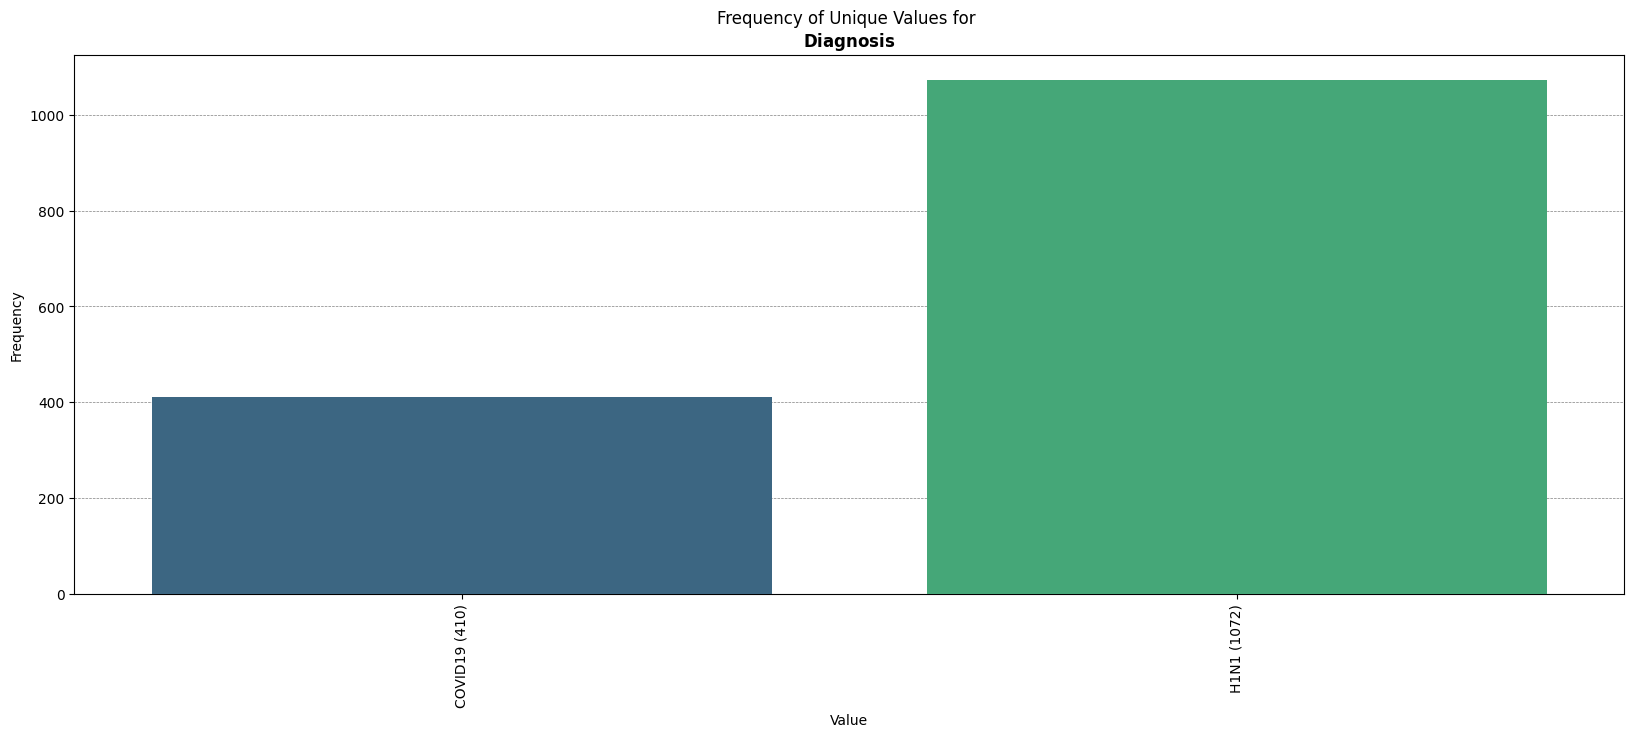

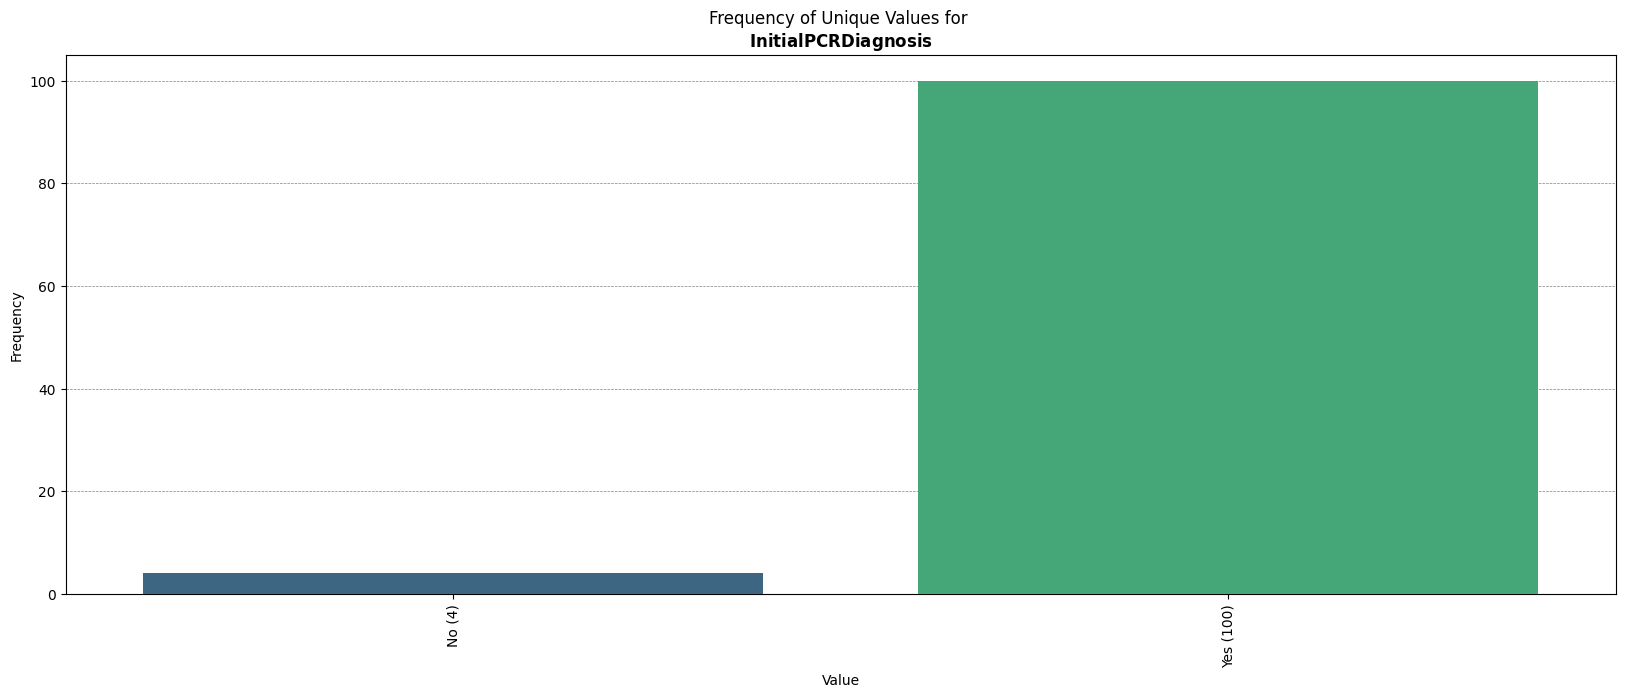

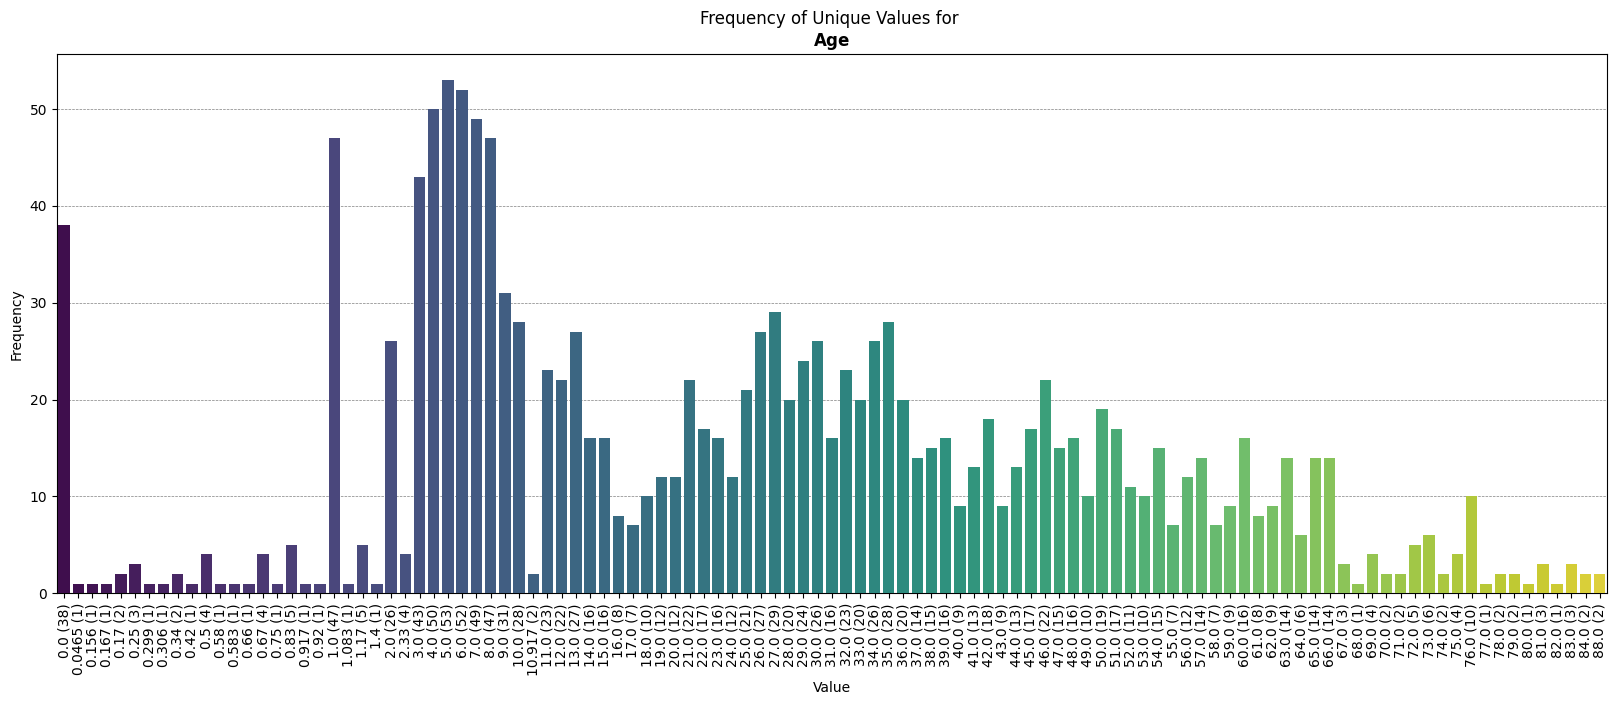

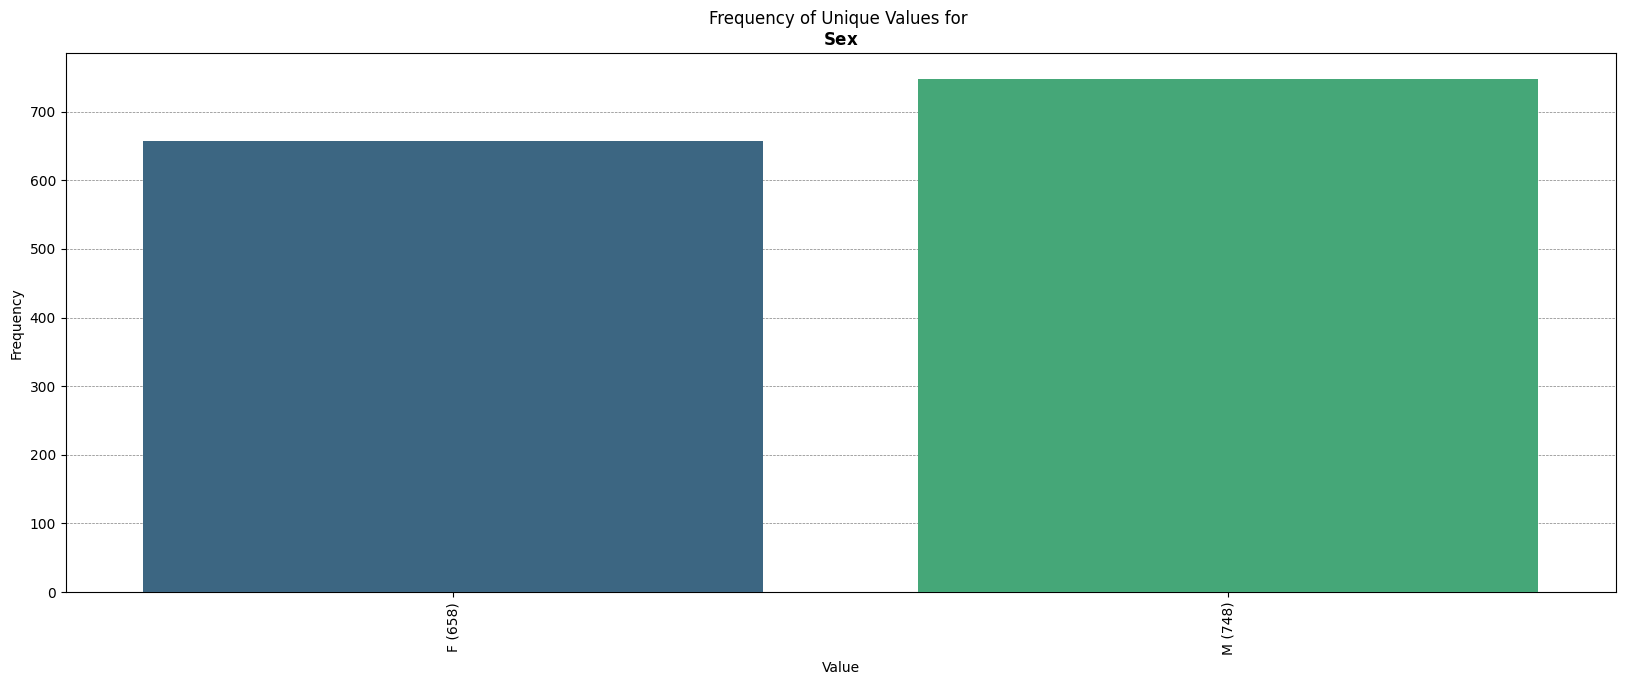

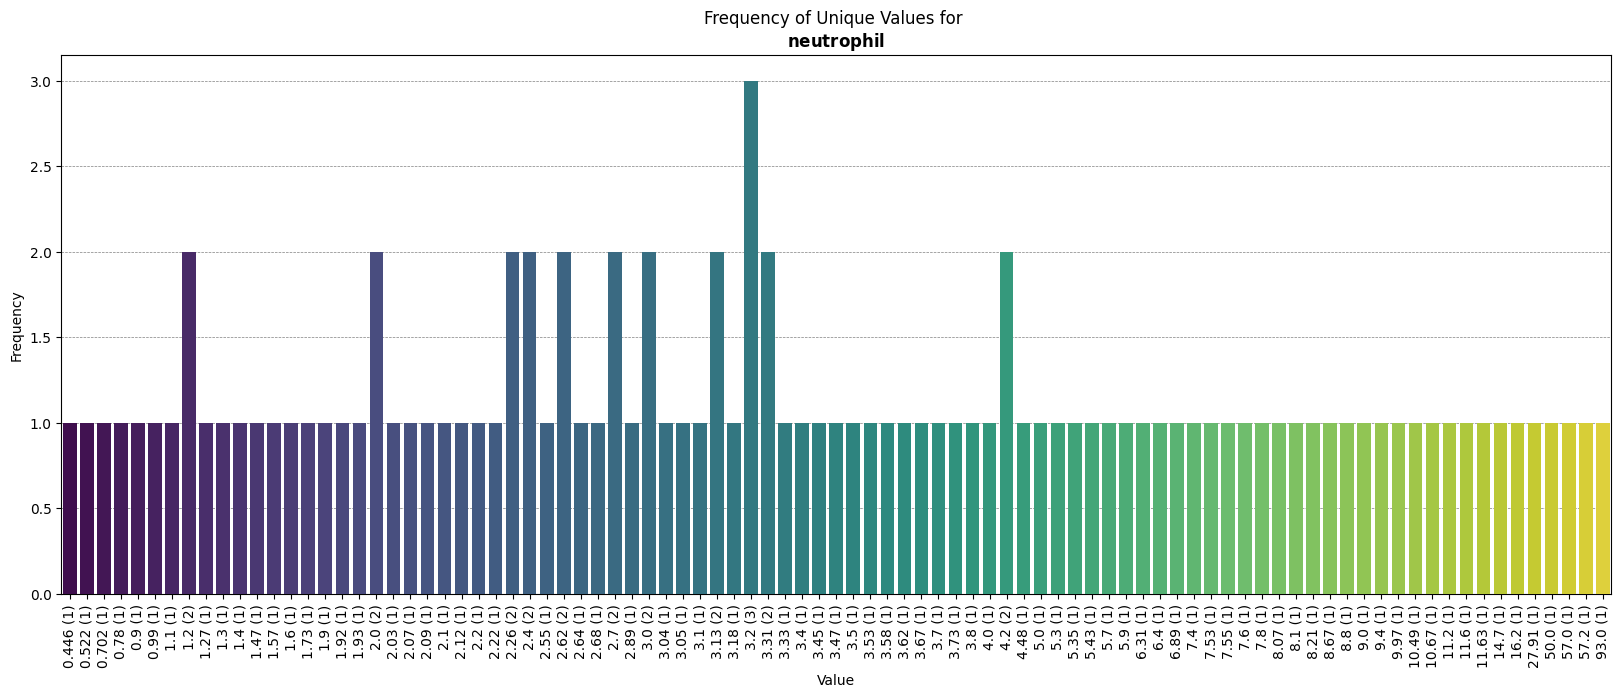

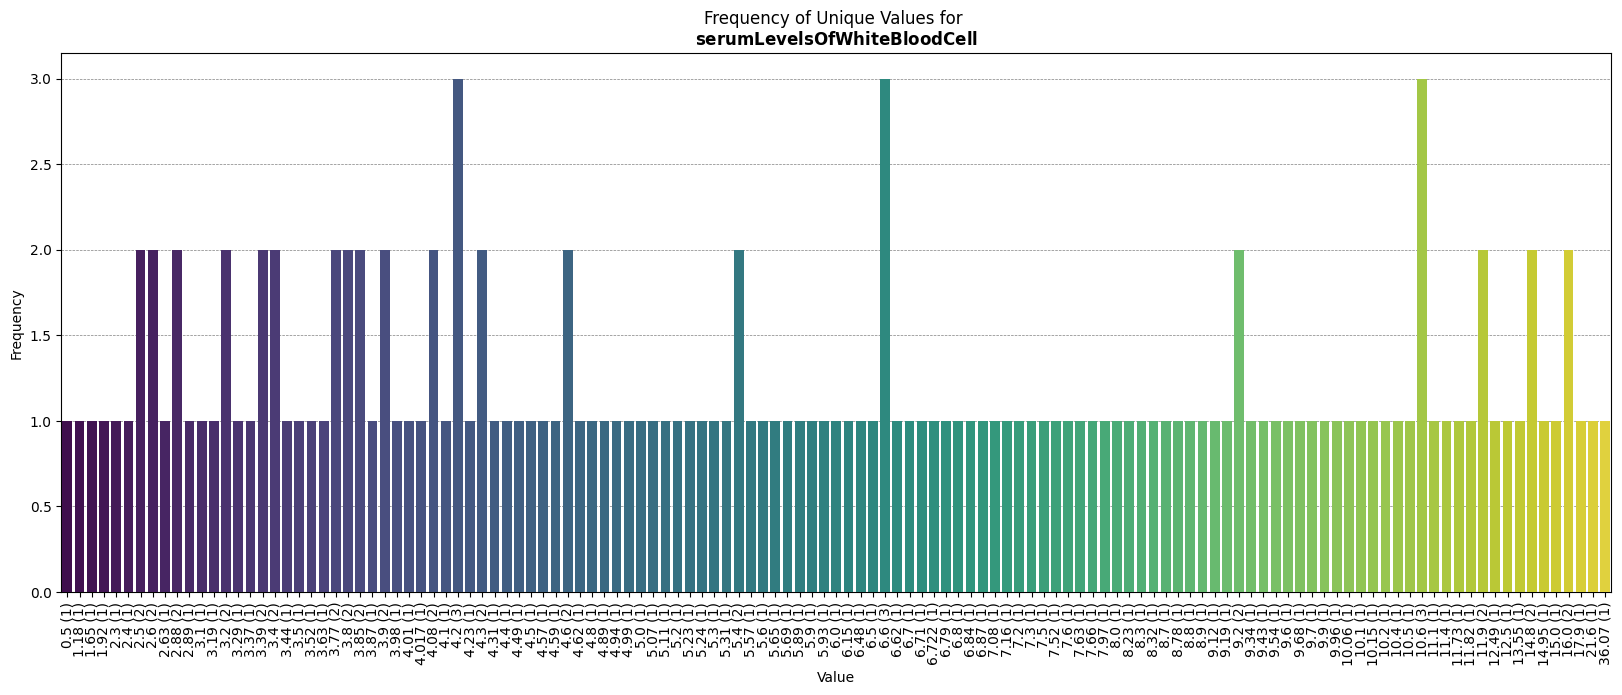

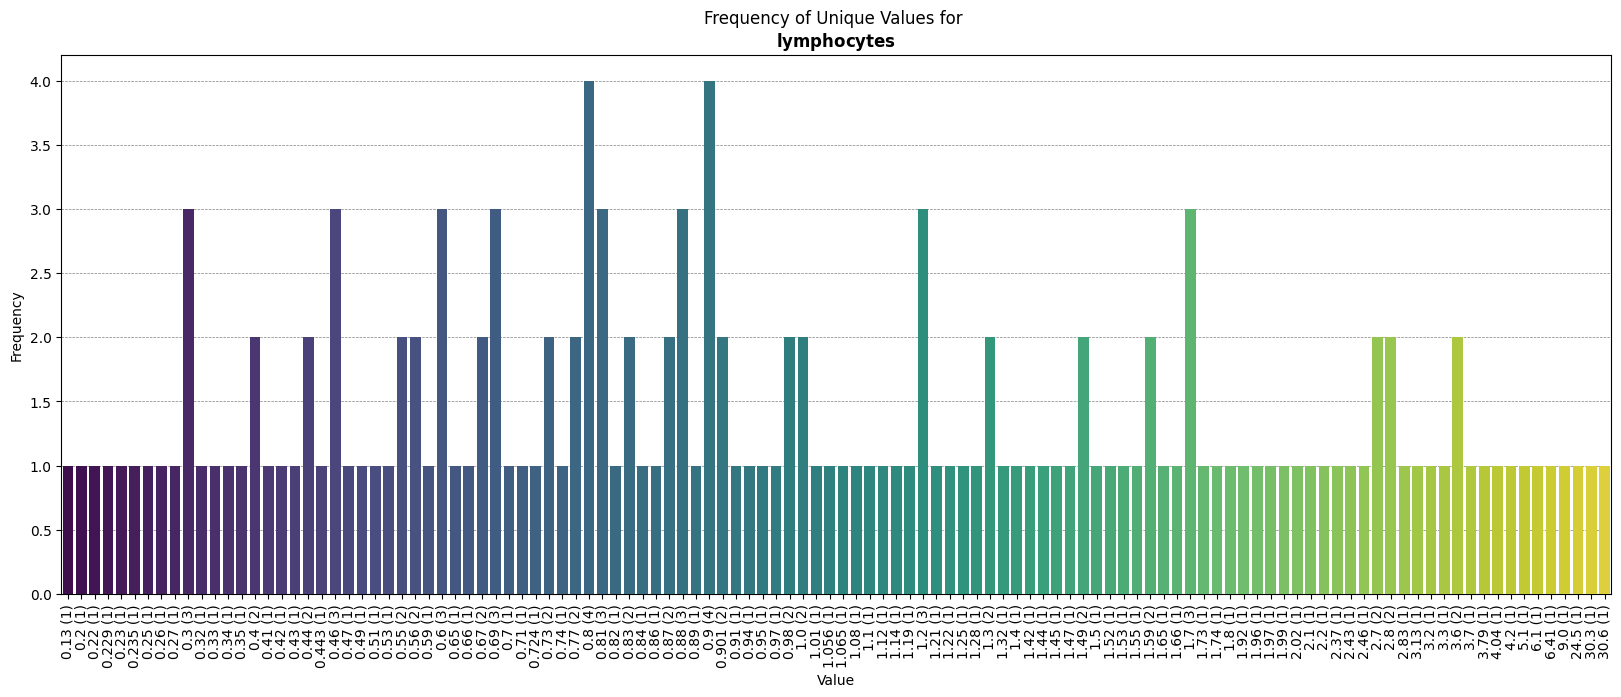

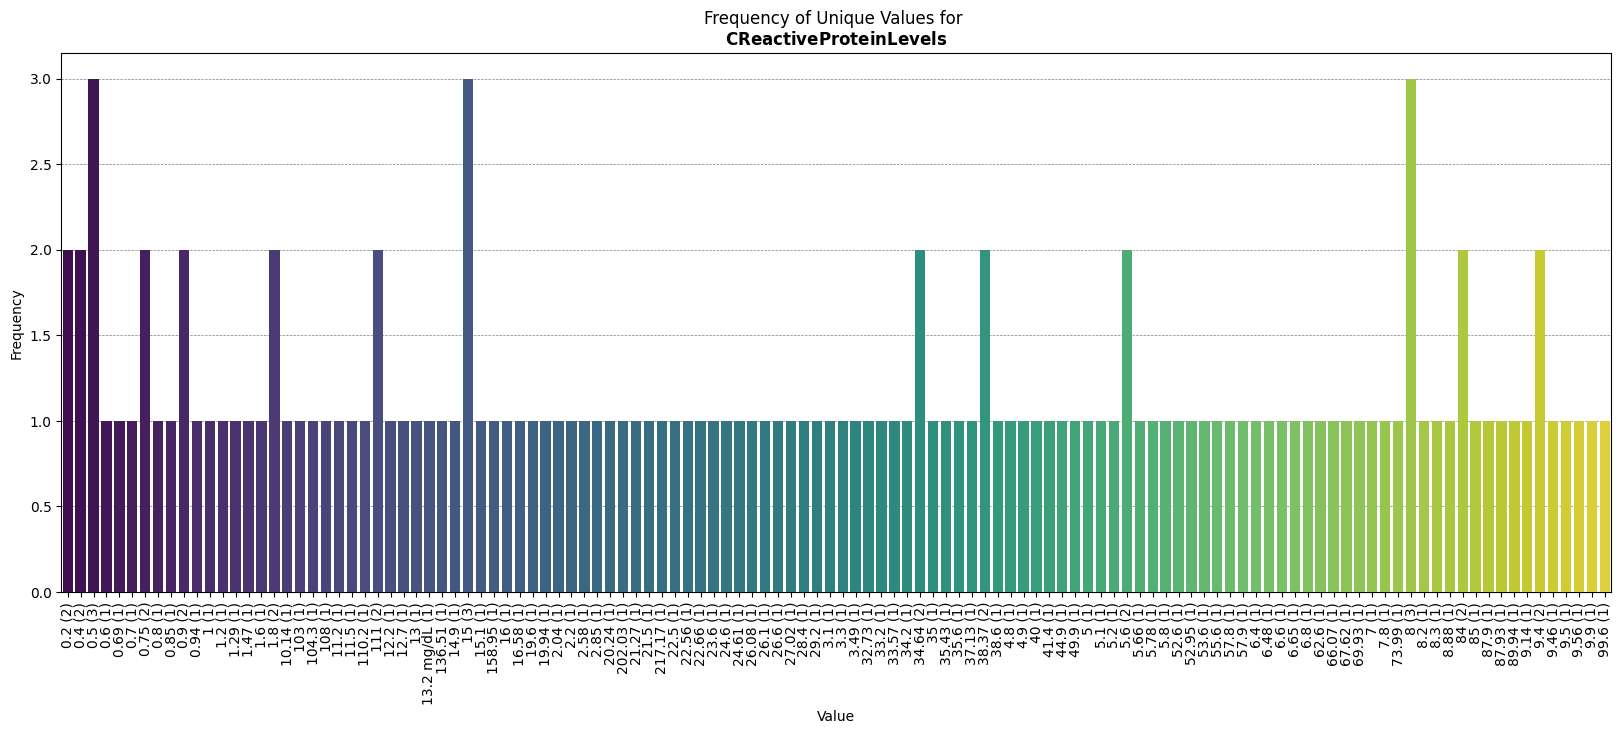

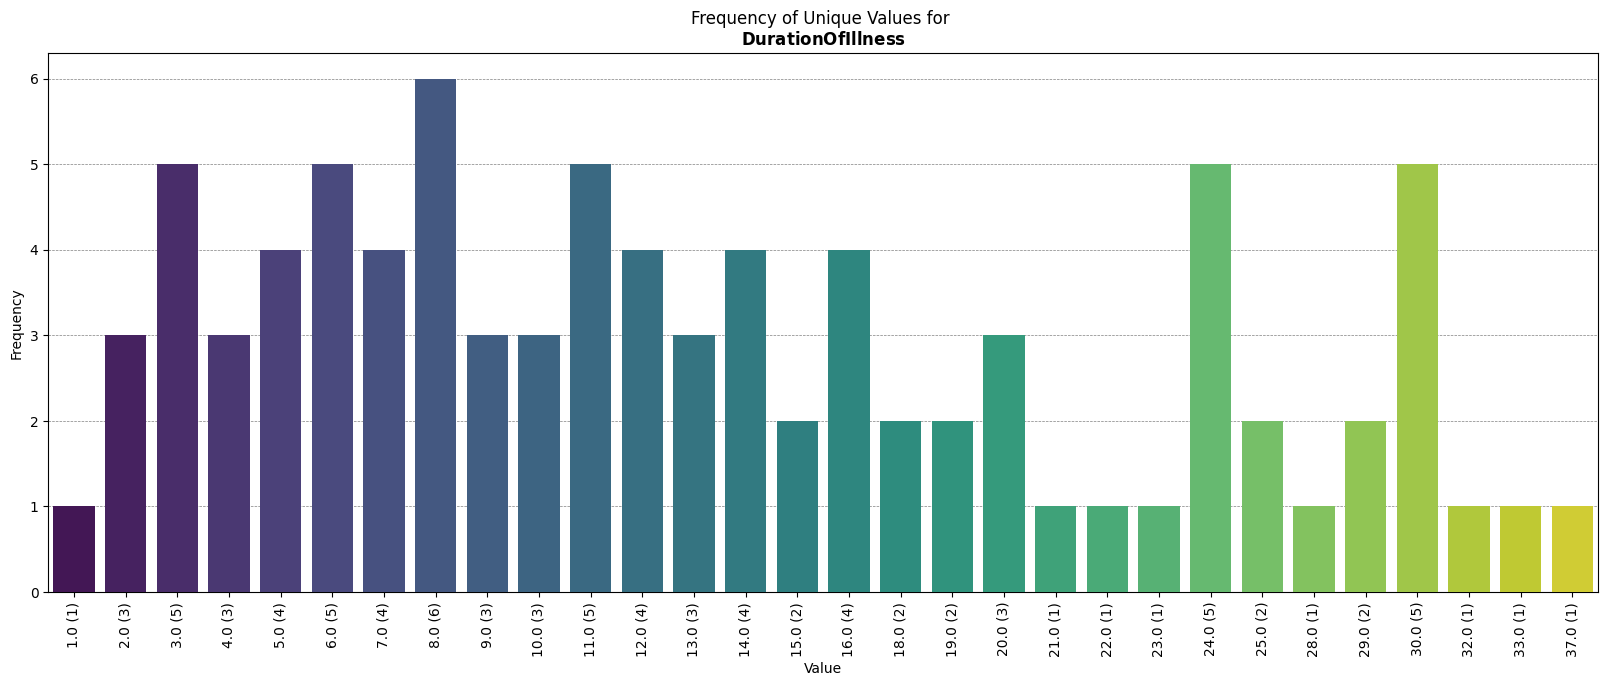

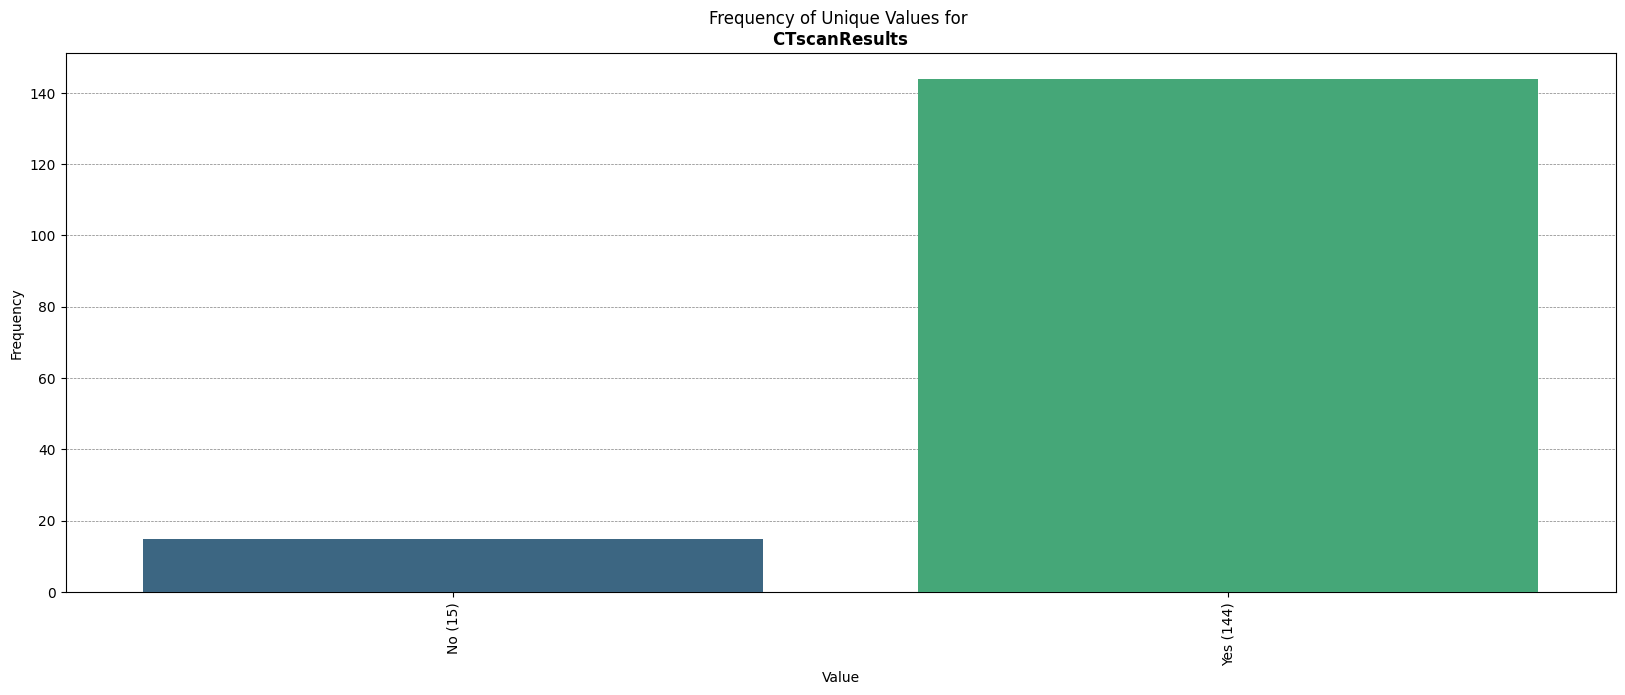

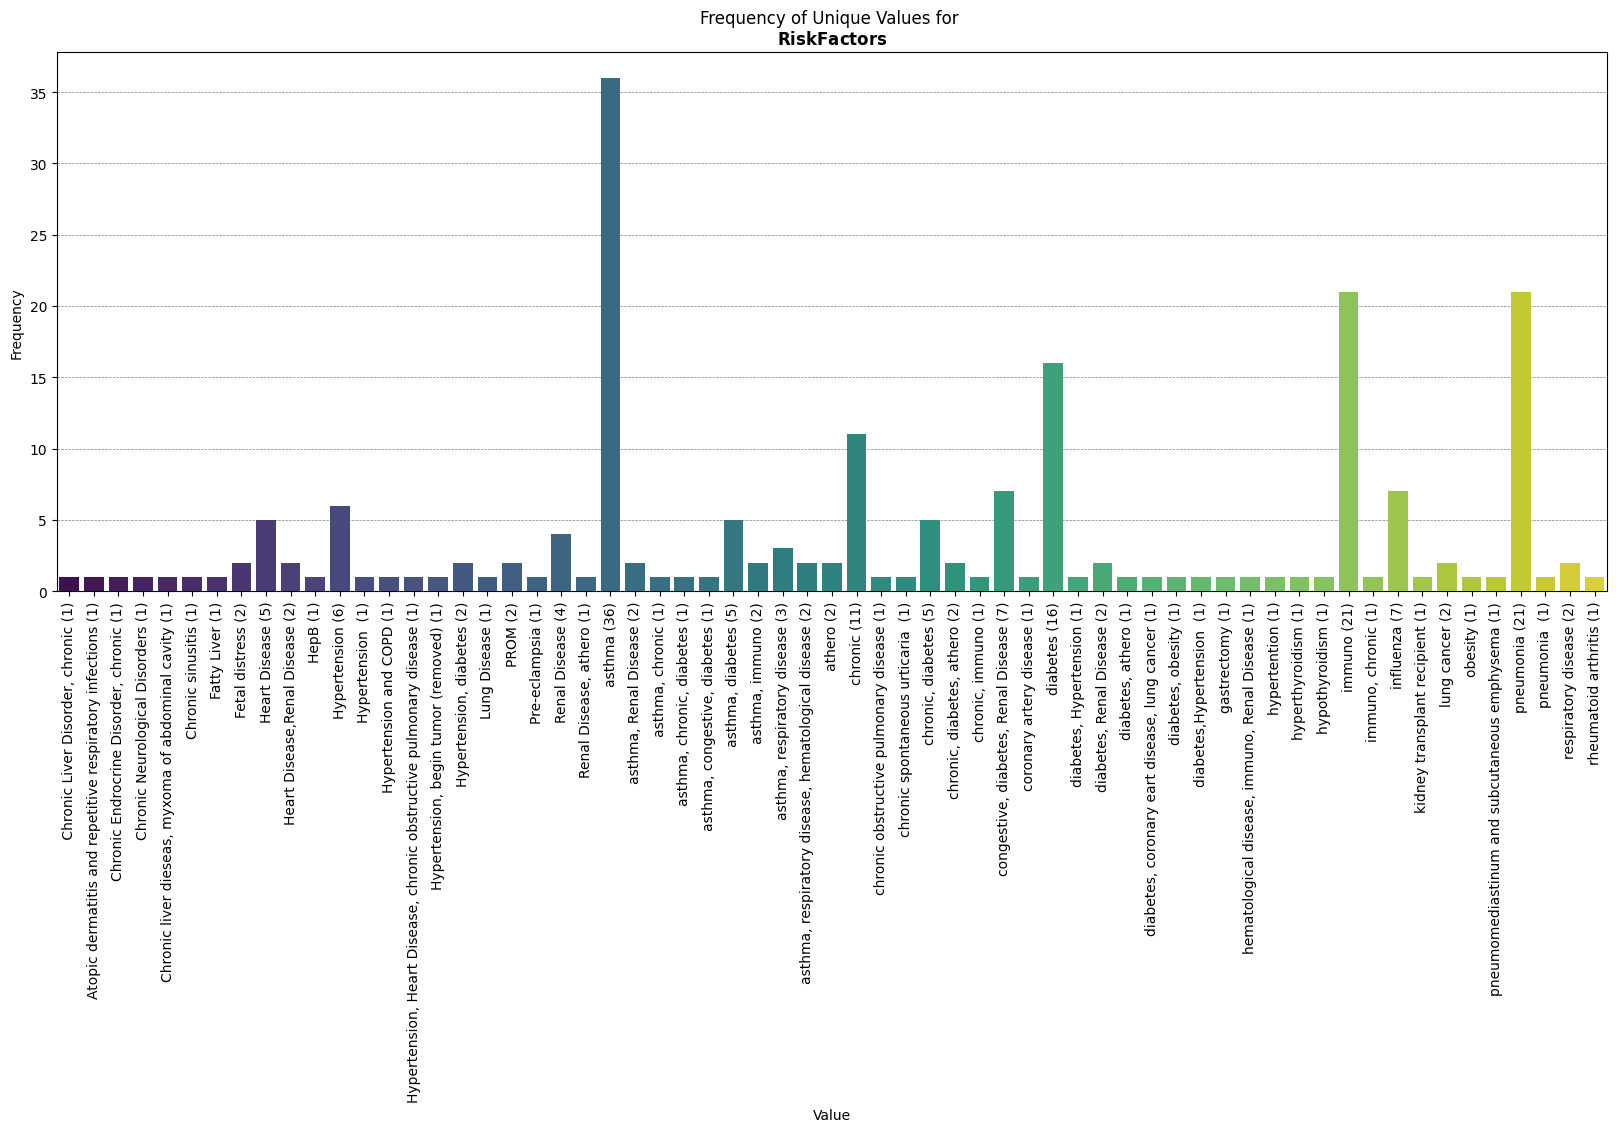

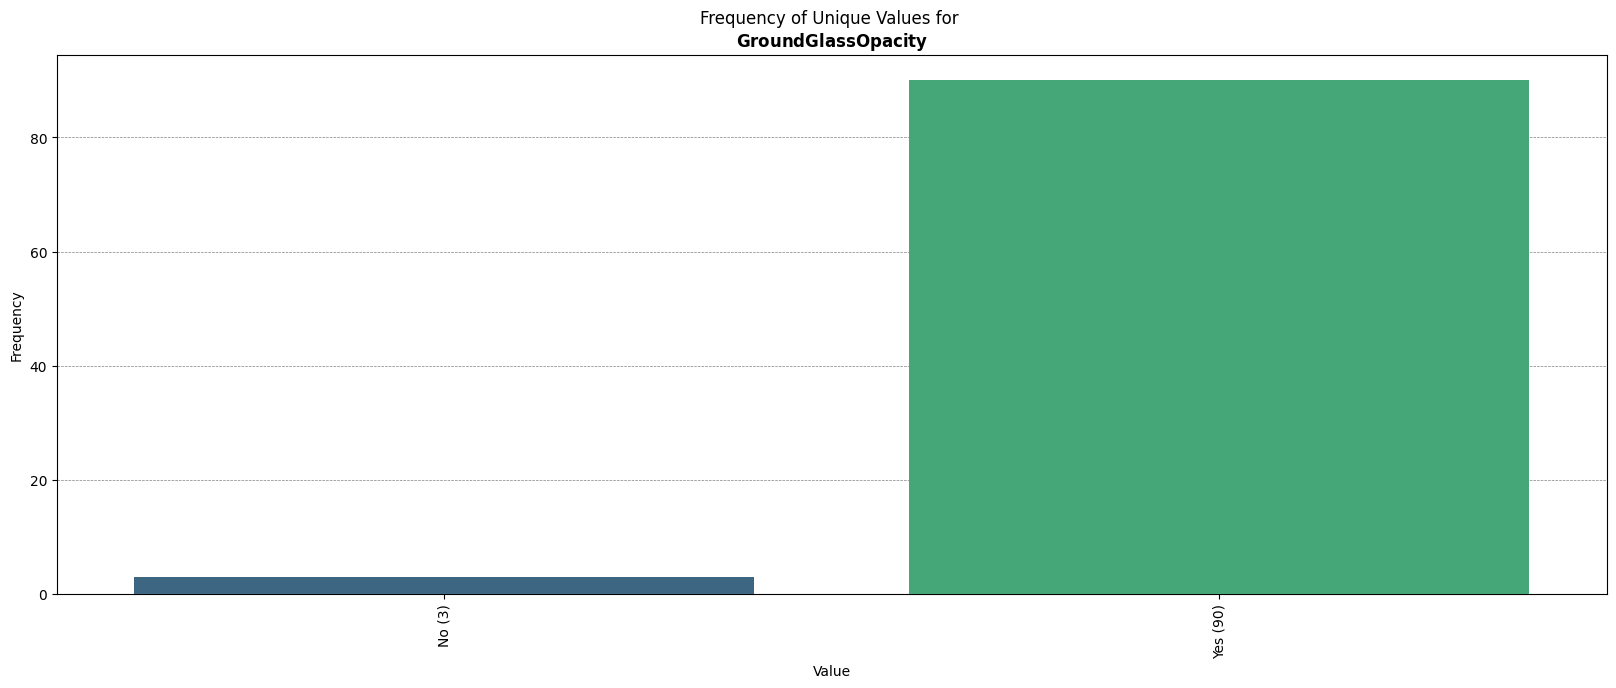

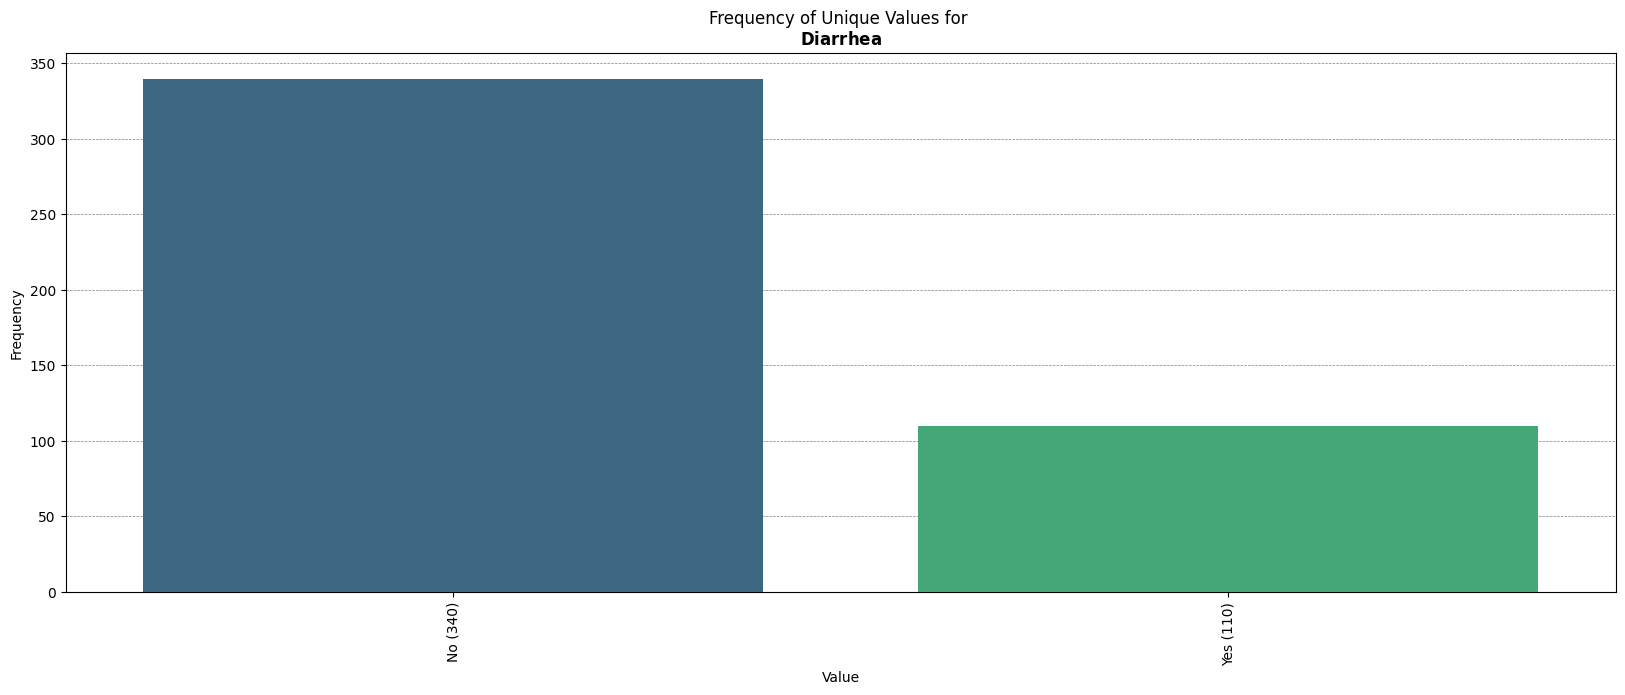

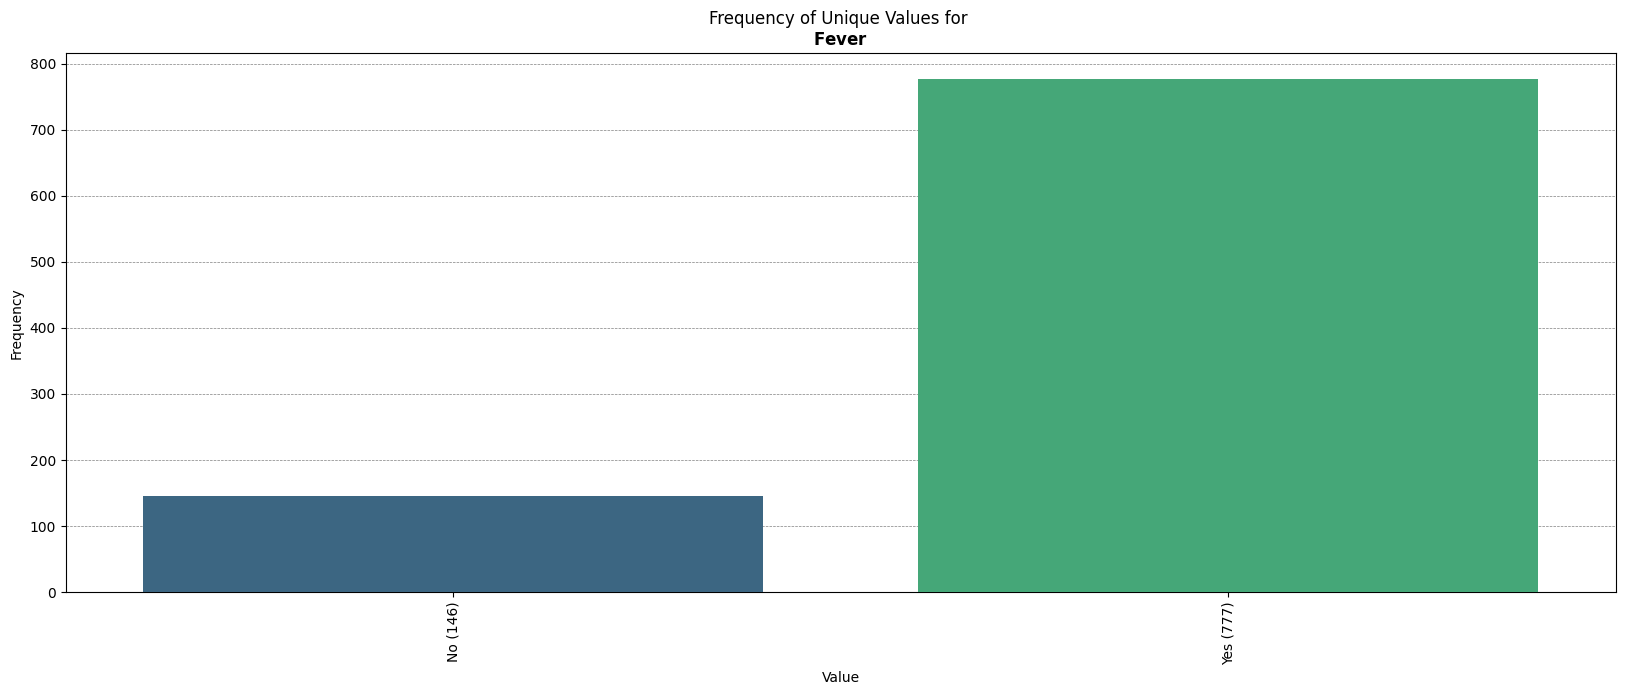

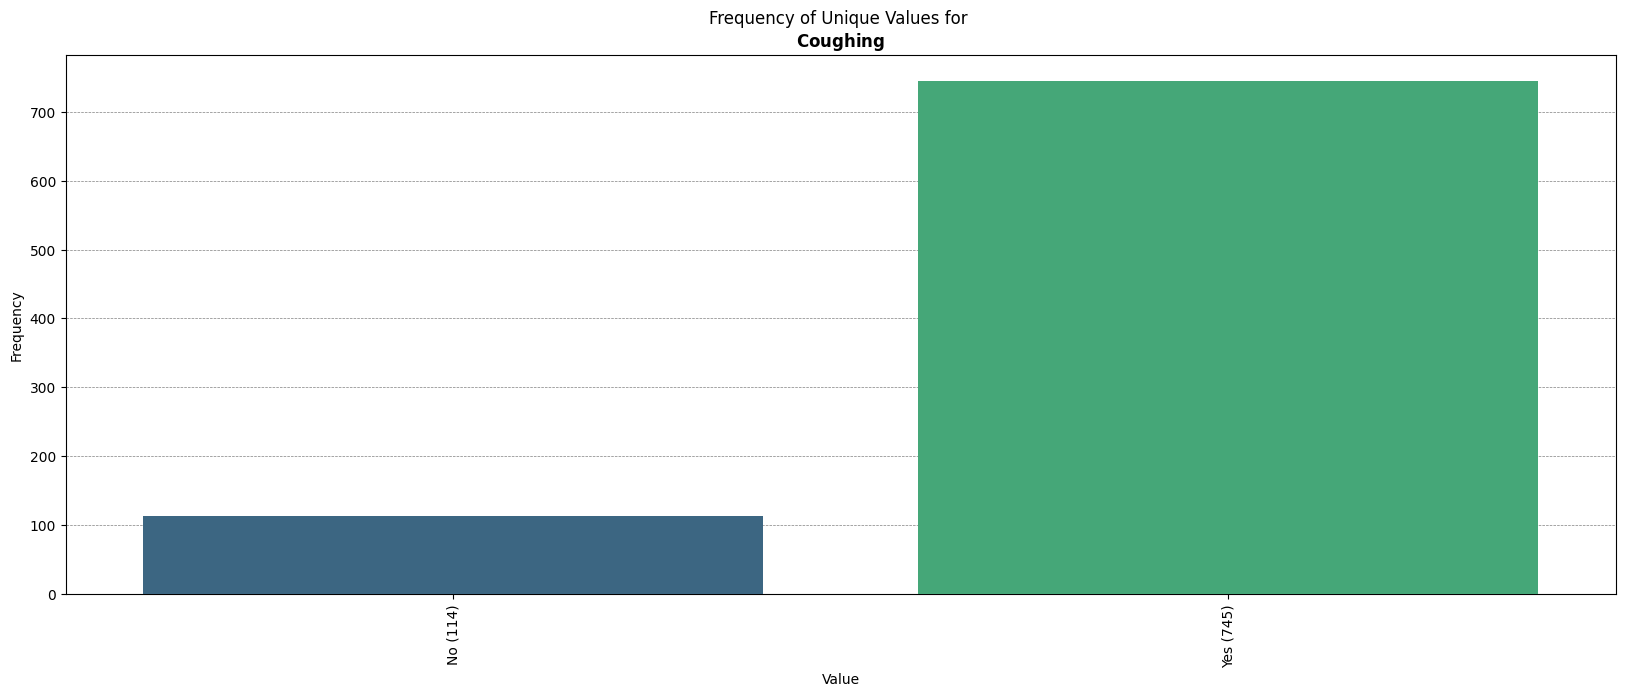

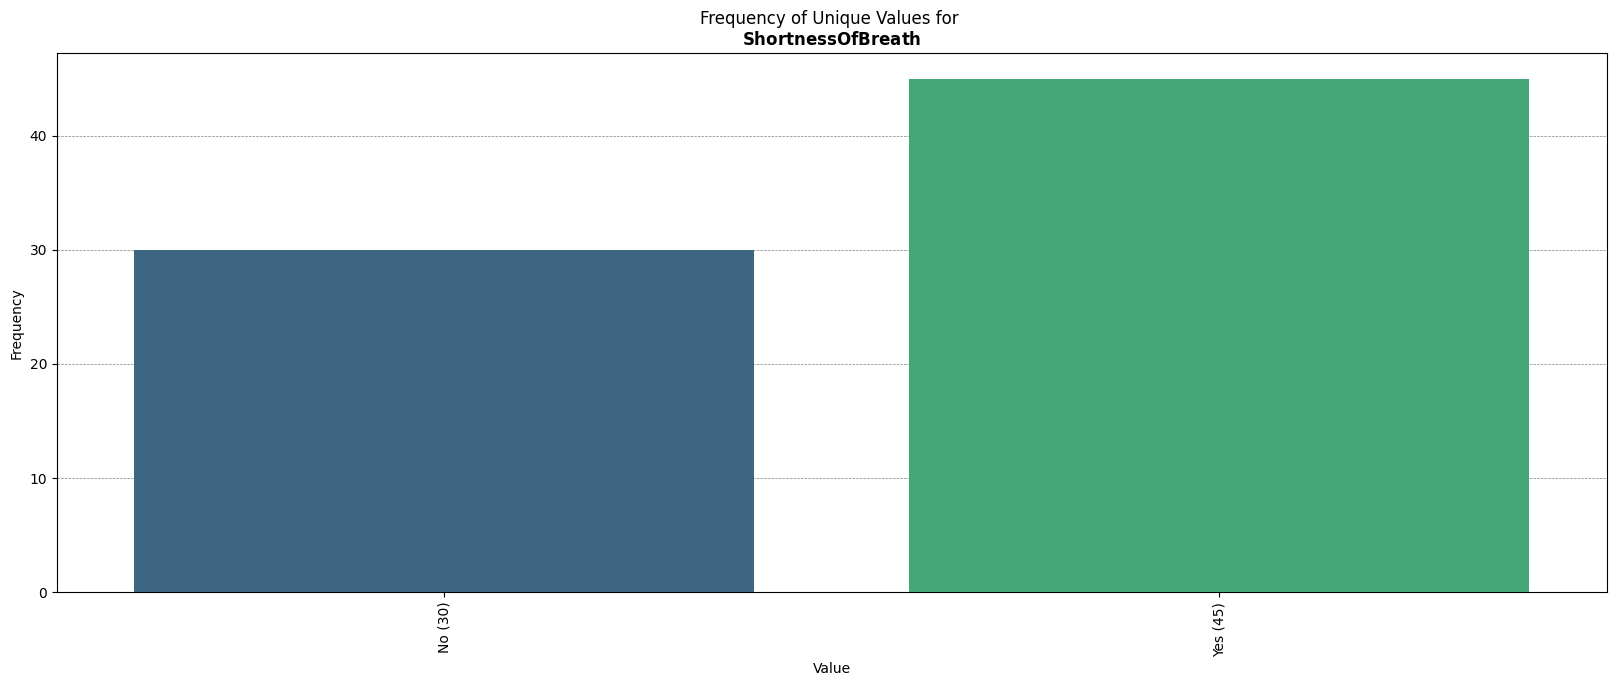

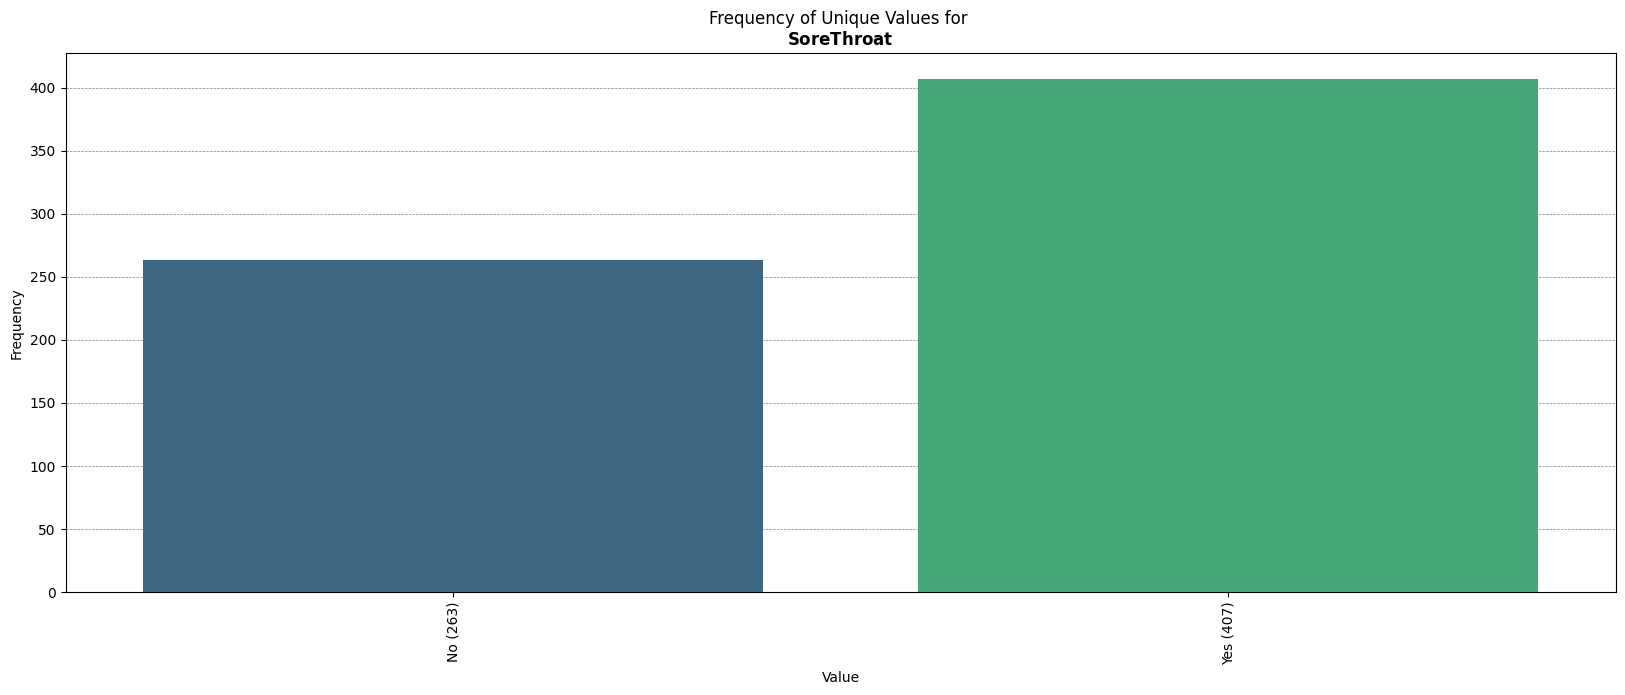

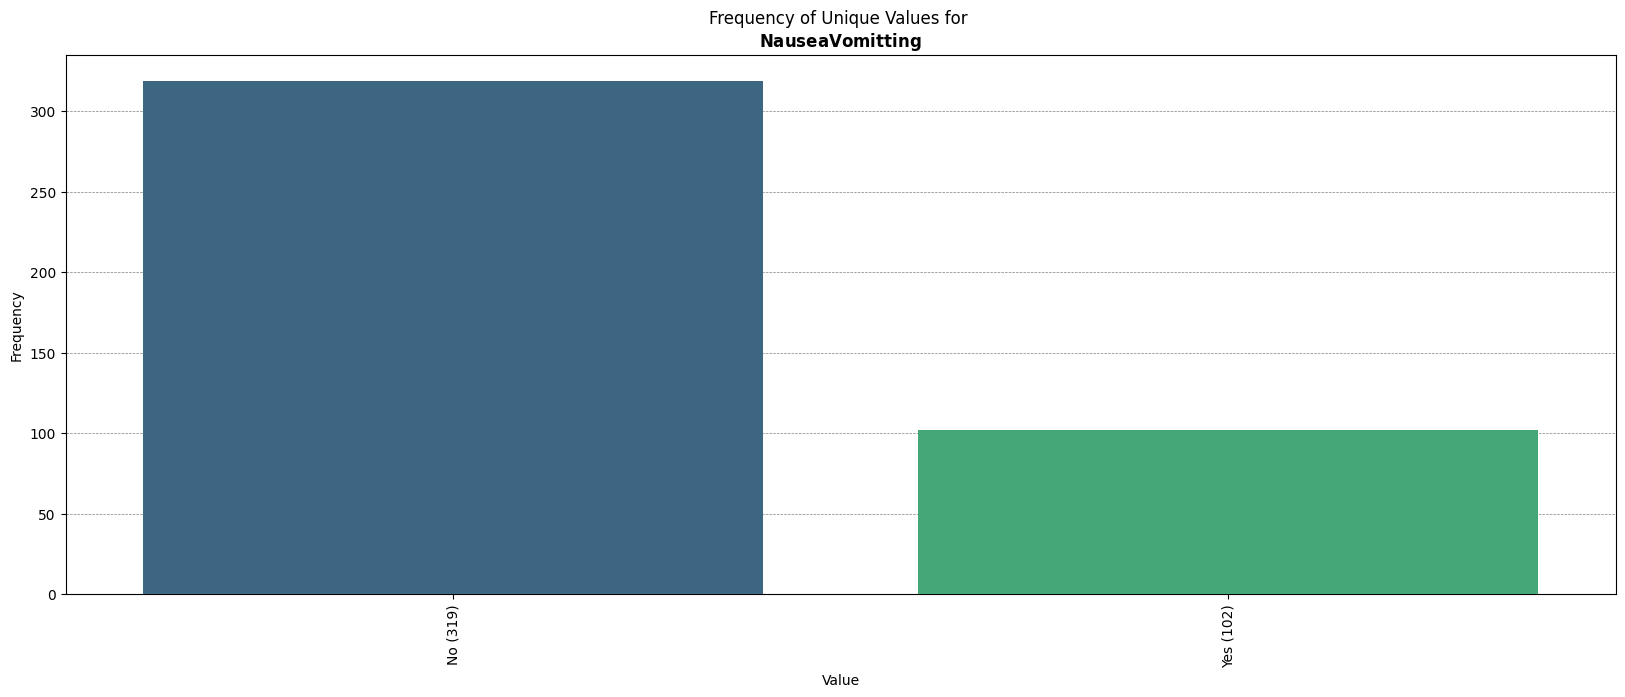

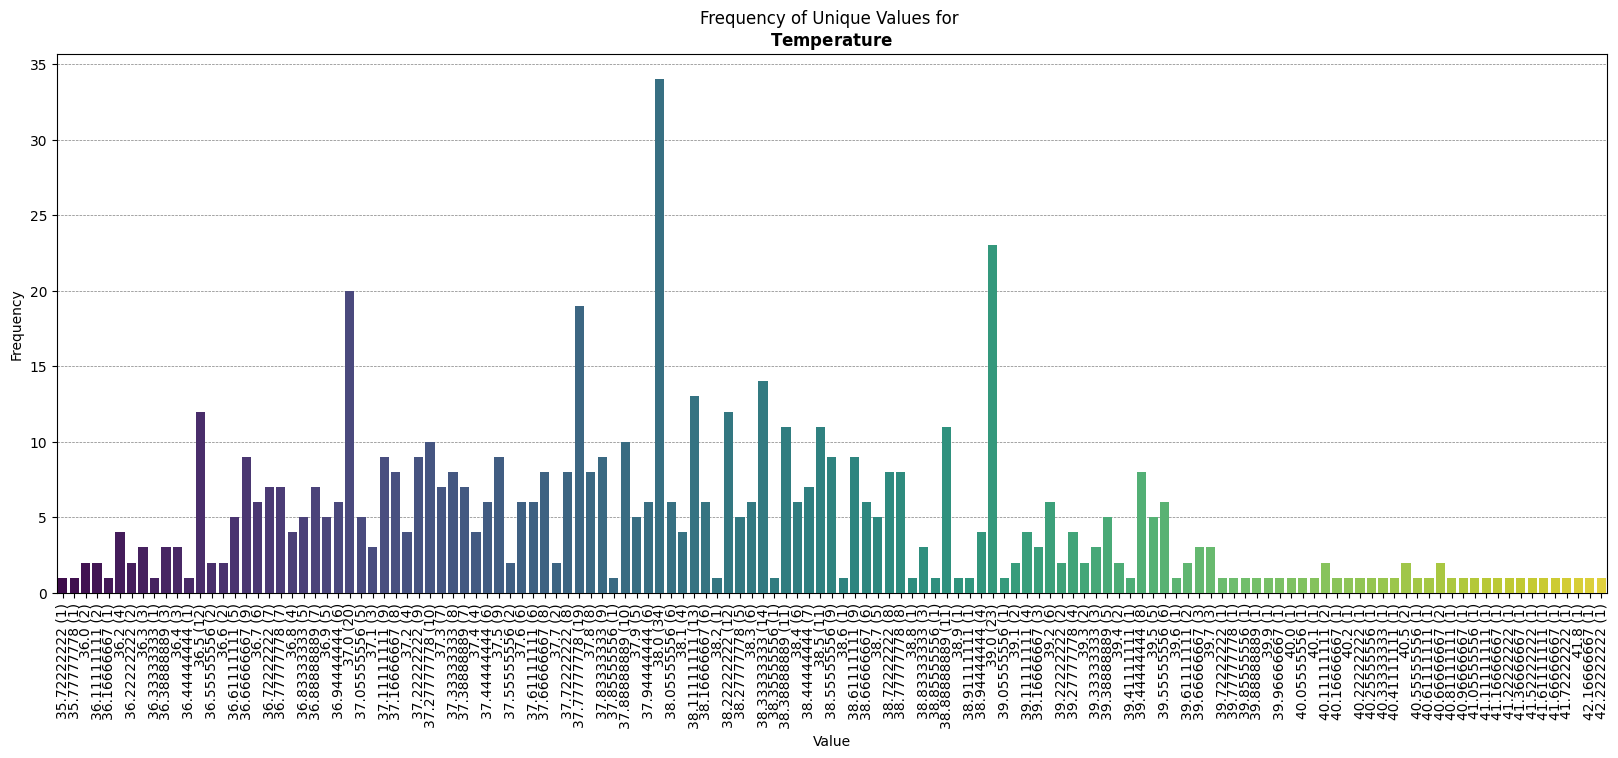

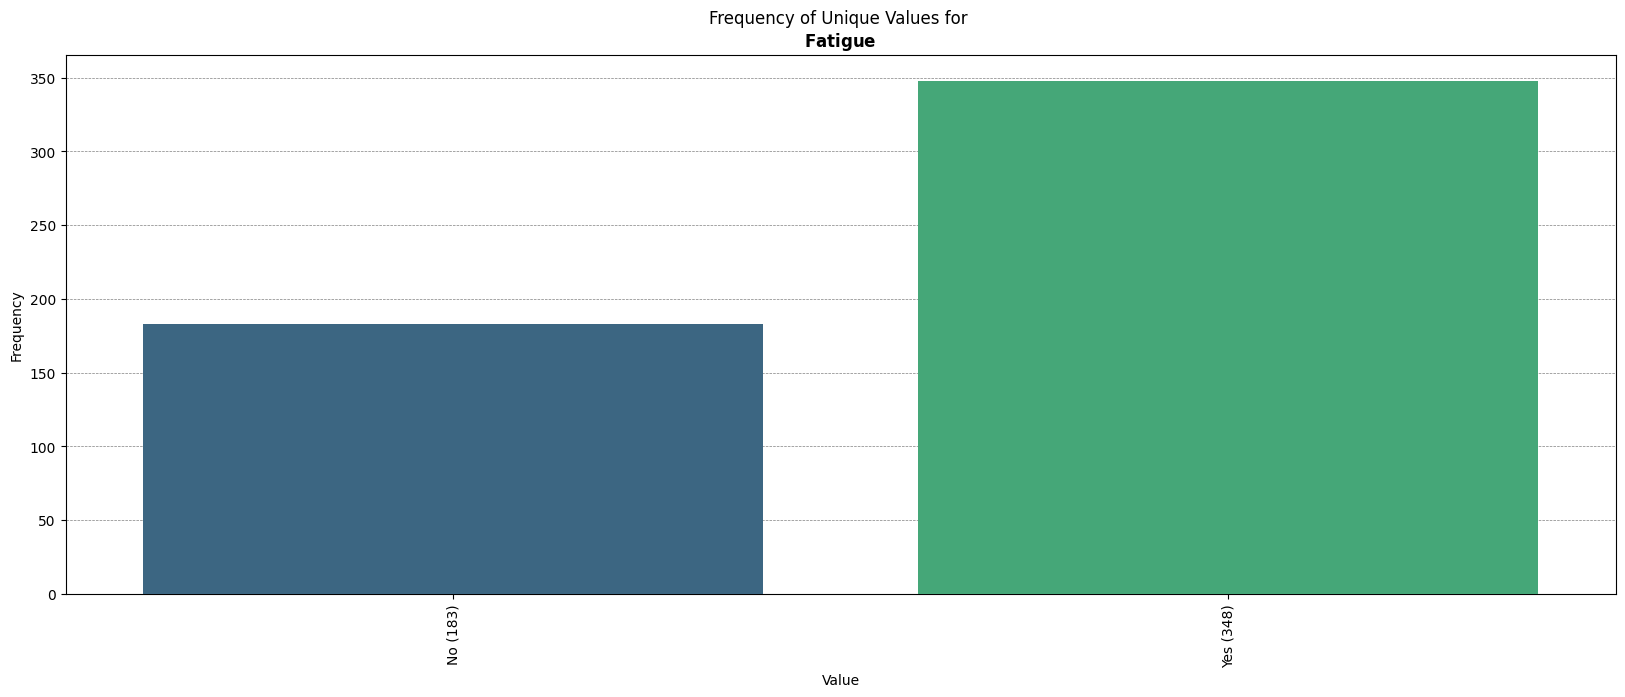

In [259]:
# Iterate through each column in the DataFrame
for column in covid_flu.columns:
    # Get the unique values and their frequencies, sorted by the unique values (not by frequencies)
    unique_values = covid_flu[column].value_counts().sort_index(ascending=True)
    
    # Create new labels that show the value and its count
    labels_with_counts = [f'{val} ({count})' for val, count in zip(unique_values.index, unique_values.values)]
    
    # Plot a bar chart for the unique values
    plt.figure(figsize=(20, 7))

    # Ensure grid is drawn behind the bars
    plt.grid(True, color='gray', linestyle='--', linewidth=0.5, zorder=0)  # zorder=0 for grid behind

    # Plot bar chart with higher zorder to ensure it's on top of the grid
    sns.barplot(x=unique_values.index, y=unique_values.values, palette="viridis", zorder=3)  # zorder=3 for bars on top
    
    # Format the title with bold column name
    plt.title(f'Frequency of Unique Values for \n' + r'$\bf{' + column + '}$', fontsize=12)
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    
    # Set the x-tick labels with the unique value and count in brackets
    plt.xticks(ticks=range(len(unique_values)), labels=labels_with_counts, rotation=90)
    
    plt.show()

#### Re-typing CReactiveProteinLevels

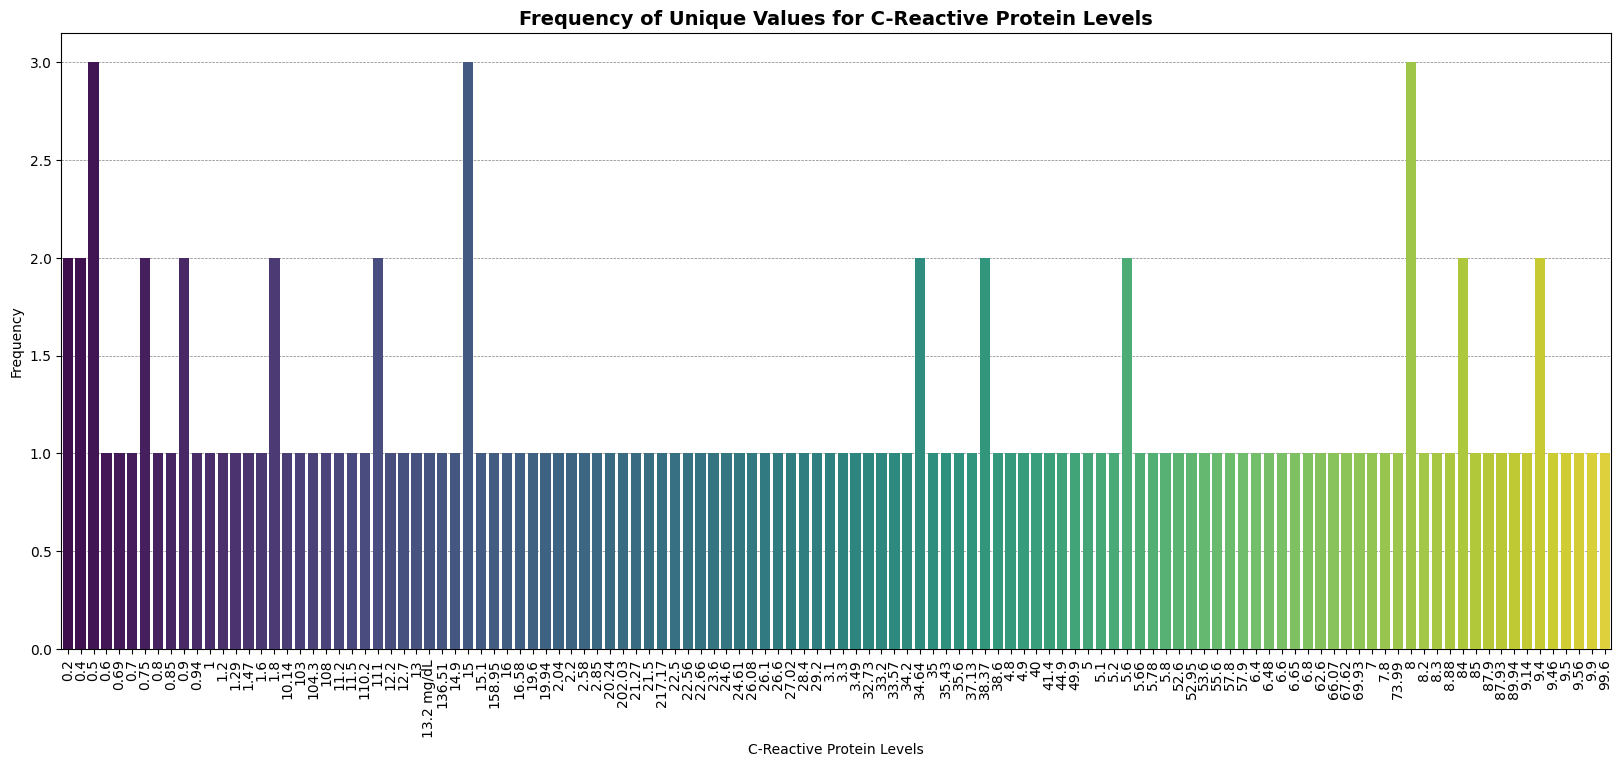

In [260]:
# Get the unique values and their frequencies
unique_values = covid_flu['CReactiveProteinLevels'].value_counts().sort_index(ascending=True)
    
# Create a bar plot
plt.figure(figsize=(20, 8))
plt.grid(True, color='gray', linestyle='--', linewidth=0.5, zorder=0)  # zorder=0 for grid behind
sns.barplot(x=unique_values.index, y=unique_values.values, palette="viridis", zorder=3)
plt.title('Frequency of Unique Values for C-Reactive Protein Levels', fontsize=14, fontweight='bold')
plt.xlabel('C-Reactive Protein Levels')
plt.ylabel('Frequency')
plt.xticks(rotation=90)  # Rotate x labels for better readability

# Show the plot
plt.show()

In [261]:
# Function to extract numerical value from string
def extract_numerical(value):
    if pd.isna(value):
        return np.nan
    # Use regex to extract the numerical part
    match = re.search(r'([-+]?\d*\.\d+|\d+)', str(value))
    if match:
        return float(match.group(0))
    return np.nan

In [262]:
# Apply the function to the column
covid_flu['CReactiveProteinLevels'] = covid_flu['CReactiveProteinLevels'].apply(extract_numerical)

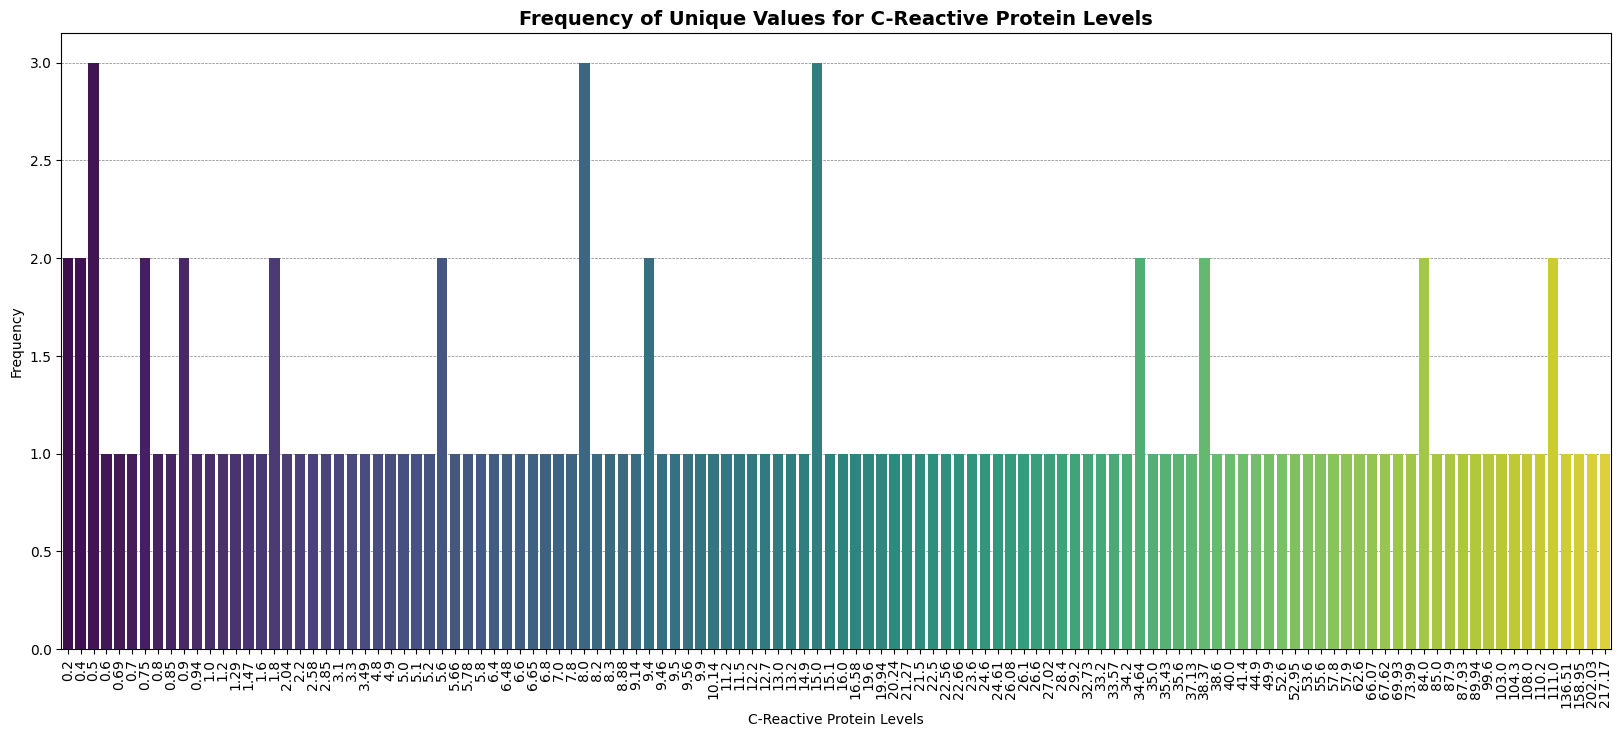

In [263]:
# Get the unique values and their frequencies
unique_values = covid_flu['CReactiveProteinLevels'].value_counts().sort_index(ascending=True)
    
# Create a bar plot
plt.figure(figsize=(20, 8))
plt.grid(True, color='gray', linestyle='--', linewidth=0.5, zorder=0)  # zorder=0 for grid behind
sns.barplot(x=unique_values.index, y=unique_values.values, palette="viridis", zorder=3)
plt.title('Frequency of Unique Values for C-Reactive Protein Levels', fontsize=14, fontweight='bold')
plt.xlabel('C-Reactive Protein Levels')
plt.ylabel('Frequency')
plt.xticks(rotation=90)  # Rotate x labels for better readability

# Show the plot
plt.show()

### Missing values

In [264]:
covid_flu.isnull().mean() # percent of missing data in each column

Diagnosis                      0.000000
InitialPCRDiagnosis            0.929825
Age                            0.018893
Sex                            0.051282
neutrophil                     0.930499
serumLevelsOfWhiteBloodCell    0.898111
lymphocytes                    0.894737
CReactiveProteinLevels         0.907557
DurationOfIllness              0.941296
CTscanResults                  0.892713
RiskFactors                    0.858974
GroundGlassOpacity             0.937247
Diarrhea                       0.696356
Fever                          0.377193
Coughing                       0.420378
ShortnessOfBreath              0.949393
SoreThroat                     0.547908
NauseaVomitting                0.715924
Temperature                    0.576248
Fatigue                        0.641700
dtype: float64

In [265]:
covid_flu.isnull().sum()

Diagnosis                         0
InitialPCRDiagnosis            1378
Age                              28
Sex                              76
neutrophil                     1379
serumLevelsOfWhiteBloodCell    1331
lymphocytes                    1326
CReactiveProteinLevels         1345
DurationOfIllness              1395
CTscanResults                  1323
RiskFactors                    1273
GroundGlassOpacity             1389
Diarrhea                       1032
Fever                           559
Coughing                        623
ShortnessOfBreath              1407
SoreThroat                      812
NauseaVomitting                1061
Temperature                     854
Fatigue                         951
dtype: int64

In [266]:
covid_flu['Diagnosis'].value_counts(normalize=True) # percent breakdown of response variable

H1N1       0.723347
COVID19    0.276653
Name: Diagnosis, dtype: float64

## Handling Float Columns

The float64 columns represent continuous numeric variables. Here are common EDA techniques for these columns:

### A. Summary Statistics:
- Get an overview of basic statistics for the float columns (mean, median, standard deviation, etc.).

In [267]:
covid_flu.describe()

Age  neutrophil  serumLevelsOfWhiteBloodCell  lymphocytes  \
count  1454.000000  103.000000                   151.000000   156.000000   
mean     26.471040    6.854078                     6.885159     1.850154   
std      21.487982   12.690131                     4.346668     3.956668   
min       0.000000    0.446000                     0.500000     0.130000   
25%       7.000000    2.160000                     3.995000     0.637500   
50%      24.000000    3.310000                     5.690000     0.905500   
75%      42.000000    6.645000                     9.155000     1.605000   
max      88.000000   93.000000                    36.070000    30.600000   

       CReactiveProteinLevels  DurationOfIllness  Temperature  
count              137.000000          87.000000   628.000000  
mean                30.248759          13.988506    38.068312  
std                 39.409941           9.043171     1.094468  
min                  0.200000           1.000000    35.722222  
25%                  5.100000           7.000000    37.222222  
50%                 14.900000          12.000000    38.000000  
75%                 38.370000          20.000000    38.722222  
max                217.170000          37.000000    42.222222

### Feature improvement - Numerical Data

In [268]:
covid_flu.select_dtypes(include=['number']).columns.tolist() # Select only numerical columns

['Age',
 'neutrophil',
 'serumLevelsOfWhiteBloodCell',
 'lymphocytes',
 'CReactiveProteinLevels',
 'DurationOfIllness',
 'Temperature']

### Imputation

In [269]:
covid_flu.mean()

Age                            26.471040
neutrophil                      6.854078
serumLevelsOfWhiteBloodCell     6.885159
lymphocytes                     1.850154
CReactiveProteinLevels         30.248759
DurationOfIllness              13.988506
Temperature                    38.068312
dtype: float64

In [270]:
covid_flu.mode()

Diagnosis InitialPCRDiagnosis  Age  Sex  neutrophil  \
0      H1N1                 Yes  5.0    M         3.2   
1       NaN                 NaN  NaN  NaN         NaN   
2       NaN                 NaN  NaN  NaN         NaN   

   serumLevelsOfWhiteBloodCell  lymphocytes  CReactiveProteinLevels  \
0                          4.2          0.8                     0.5   
1                          6.6          0.9                     8.0   
2                         10.6          NaN                    15.0   

   DurationOfIllness CTscanResults RiskFactors GroundGlassOpacity Diarrhea  \
0                8.0           Yes      asthma                Yes       No   
1                NaN           NaN         NaN                NaN      NaN   
2                NaN           NaN         NaN                NaN      NaN   

  Fever Coughing ShortnessOfBreath SoreThroat NauseaVomitting  Temperature  \
0   Yes      Yes               Yes        Yes              No         38.0   
1   NaN      NaN               NaN        NaN             NaN          NaN   
2   NaN      NaN               NaN        NaN             NaN          NaN   

  Fatigue  
0     Yes  
1     NaN  
2     NaN

In [271]:
covid_flu.min()

Diagnosis                        COVID19
Age                                  0.0
neutrophil                         0.446
serumLevelsOfWhiteBloodCell          0.5
lymphocytes                         0.13
CReactiveProteinLevels               0.2
DurationOfIllness                    1.0
Temperature                    35.722222
dtype: object

In [272]:
covid_flu.max()

Diagnosis                           H1N1
Age                                 88.0
neutrophil                          93.0
serumLevelsOfWhiteBloodCell        36.07
lymphocytes                         30.6
CReactiveProteinLevels            217.17
DurationOfIllness                   37.0
Temperature                    42.222222
dtype: object

In [273]:
numerical_columns = covid_flu.select_dtypes('number').columns.to_list()
print(numerical_columns)

['Age', 'neutrophil', 'serumLevelsOfWhiteBloodCell', 'lymphocytes', 'CReactiveProteinLevels', 'DurationOfIllness', 'Temperature']


### Mean/Median/Mode/Arbitrary Value Imputation

- Normal distribution: Use the mean.
- Skewed distribution: Use the median.
- Exponential distribution: Use the mode or a small value like zero.

#### Age

<Axes: title={'center': 'Age Distribution'}, ylabel='Frequency'>

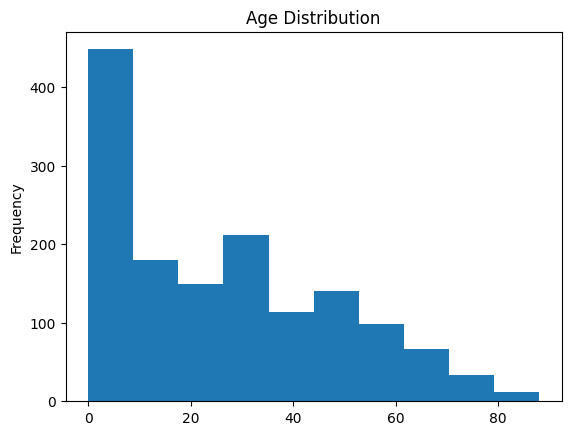

In [274]:
covid_flu["Age"].plot(title = "Age Distribution", kind = "hist", xlabel = "Years")

- The histogram in the image represents a right-skewed distribution (also known as positively skewed).
- Given this distribution, the median would be a more appropriate measure to use for filling in missing values, as it better represents the central tendency of the data than the mean would.

In [275]:
covid_flu["Age"].isnull().mean()

0.018893387314439947

In [276]:
# # Count the number of occurrences where 'Age' is 0 in the 'covid_flu' DataFrame
# covid_flu[covid_flu['Age']==0]['Age'].value_counts()

In [277]:
# # Replace all occurrences of 'Age' equal to 0 with 0.01, leaving other values unchanged
# covid_flu.loc[covid_flu['Age'] == 0, 'Age'] = 0.01

In [278]:
age_median = covid_flu["Age"].median()
age_mean = covid_flu["Age"].mean()
print(f"age_median = {age_median}")
print(f"age_mean = {age_mean}")

age_median = 24.0
age_mean = 26.47103954607978


In [279]:
covid_flu["Age"].fillna(age_mean, inplace = True)

<Axes: ylabel='Frequency'>

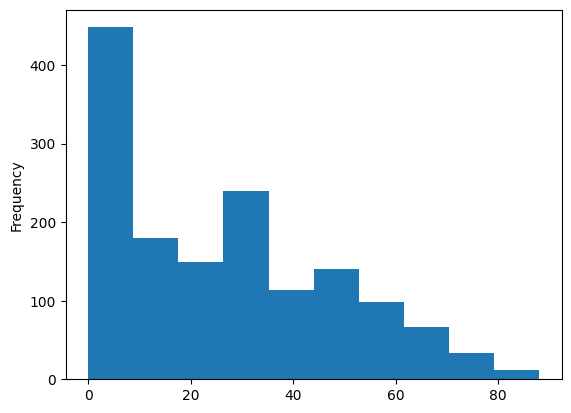

In [280]:
# Histogram after NaN removal
covid_flu["Age"].plot(kind = "hist")

### Neutrophil

<Axes: ylabel='Frequency'>

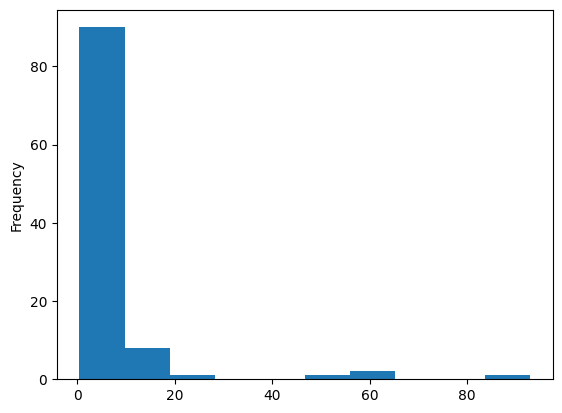

In [281]:
covid_flu["neutrophil"].plot(kind = "hist")

- This type of distribution is also known as a long-tailed distribution or an exponential distribution.

In [282]:
covid_flu["neutrophil"].isna().mean()

0.9304993252361673

- When you have a dataset where more than 80% of the data in a column is missing (NaN), it presents a significant challenge.
- You could use advanced imputation techniques like K-Nearest Neighbors (KNN), multiple imputation by chained equations (MICE), or even predictive models to estimate the missing values based on other variables. 
- This is useful when you believe the missing values can be predicted with some degree of accuracy from other data in the dataset.

In [283]:
imputer = KNNImputer(n_neighbors=5)

# Reshape the Series to a DataFrame with one column
neutrophil_reshaped = covid_flu[["neutrophil"]]

# Apply KNN imputation
covid_flu["neutrophil"] = imputer.fit_transform(neutrophil_reshaped)

<Axes: ylabel='Frequency'>

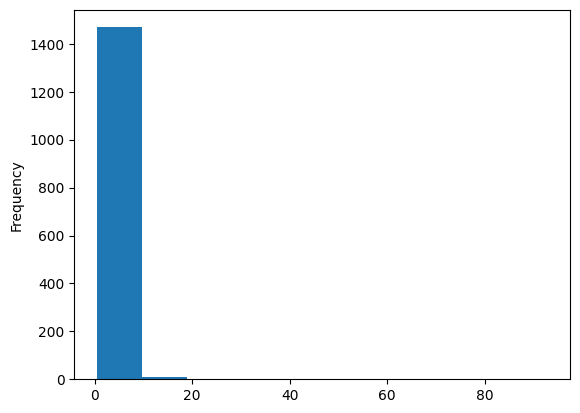

In [284]:
# Histogram after NaN removal
covid_flu["neutrophil"].plot(kind = "hist")

In [285]:
# covid_flu['log_transformed_neutrophil'] = np.log1p(covid_flu['neutrophil'])

In [286]:
# covid_flu['log_transformed_neutrophil'].plot(kind = "hist")

#### Serum Levels Of White Blood Cell

<Axes: ylabel='Frequency'>

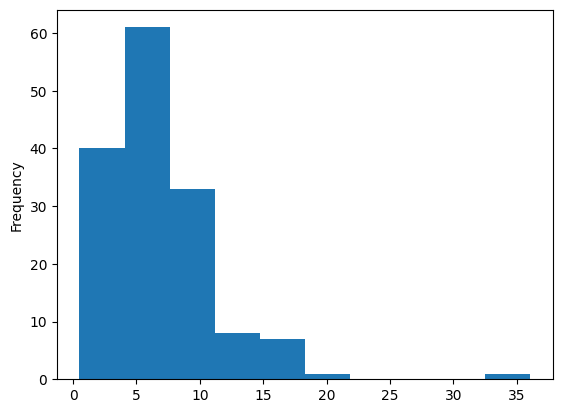

In [287]:
covid_flu["serumLevelsOfWhiteBloodCell"].plot(kind = "hist")

- The histogram in the image represents a right-skewed distribution (also known as positively skewed).

In [288]:
covid_flu["serumLevelsOfWhiteBloodCell"].isna().mean()

0.898110661268556

- When you have a dataset where more than 80% of the data in a column is missing (NaN), it presents a significant challenge.

In [289]:
imputer = KNNImputer(n_neighbors=5)

# Reshape the Series to a DataFrame with one column
serumLevelsOfWhiteBloodCell_reshaped = covid_flu[["serumLevelsOfWhiteBloodCell"]]

# Apply KNN imputation
covid_flu["serumLevelsOfWhiteBloodCell"] = imputer.fit_transform(serumLevelsOfWhiteBloodCell_reshaped)

<Axes: ylabel='Frequency'>

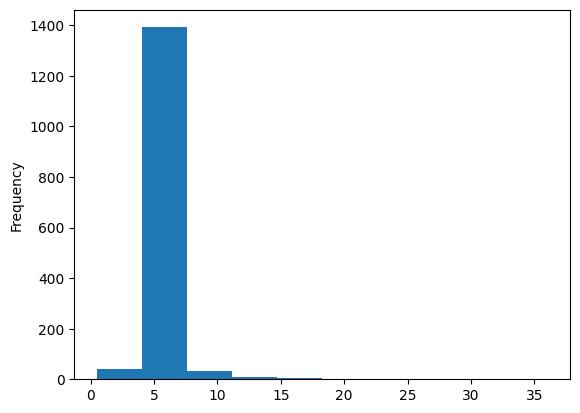

In [290]:
# Histogram after NaN removal
covid_flu["serumLevelsOfWhiteBloodCell"].plot(kind = "hist")

#### Lymphocytes

<Axes: ylabel='Frequency'>

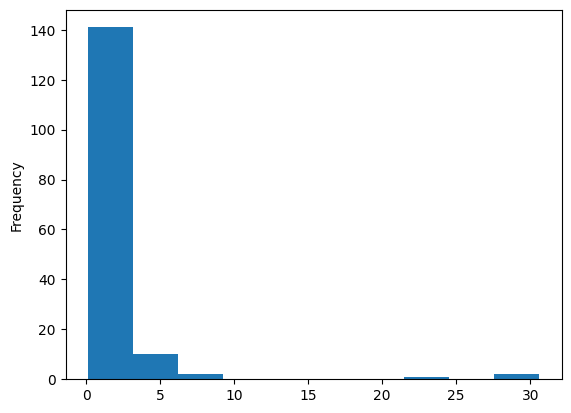

In [291]:
covid_flu["lymphocytes"].plot(kind = "hist")

- This type of distribution is also known as a long-tailed distribution or an exponential distribution.

In [292]:
covid_flu["lymphocytes"].isna().mean()

0.8947368421052632

- When you have a dataset where more than 80% of the data in a column is missing (NaN), it presents a significant challenge.

In [293]:
imputer = KNNImputer(n_neighbors=5)

# Reshape the Series to a DataFrame with one column
lymphocytes_reshaped = covid_flu[["lymphocytes"]]

# Apply KNN imputation
covid_flu["lymphocytes"] = imputer.fit_transform(lymphocytes_reshaped)

<Axes: ylabel='Frequency'>

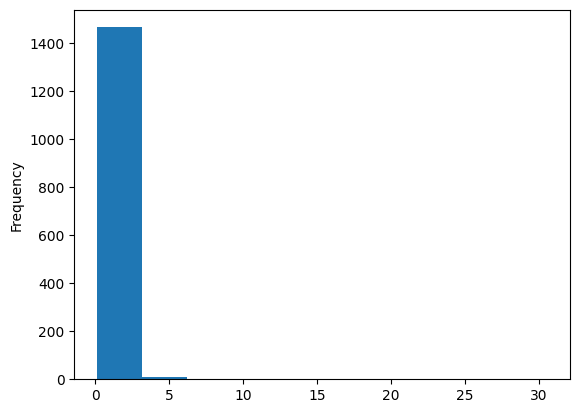

In [294]:
# Histogram after NaN removal
covid_flu["lymphocytes"].plot(kind = "hist")

#### Duration Of Illness

<Axes: ylabel='Frequency'>

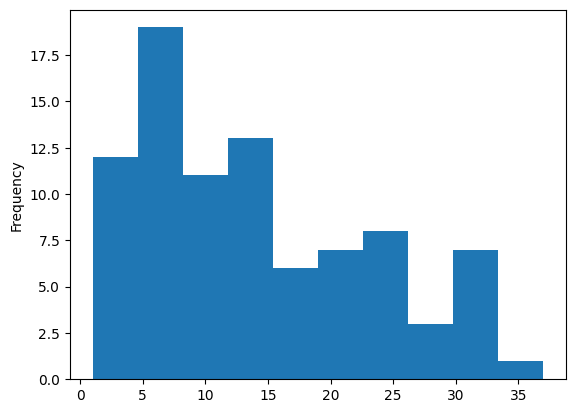

In [295]:
covid_flu["DurationOfIllness"].plot(kind = "hist")

- The histogram in the image represents a right-skewed distribution (also known as positively skewed).
- Given this distribution, the median would be a more appropriate measure to use for filling in missing values, as it better represents the central tendency of the data than the mean would.

In [296]:
covid_flu["DurationOfIllness"].isna().mean()

0.9412955465587044

- When you have a dataset where more than 80% of the data in a column is missing (NaN), it presents a significant challenge.

In [297]:
imputer = KNNImputer(n_neighbors=5)

# Reshape the Series to a DataFrame with one column
DurationOfIllness_reshaped = covid_flu[["DurationOfIllness"]]

# Apply KNN imputation
covid_flu["DurationOfIllness"] = imputer.fit_transform(DurationOfIllness_reshaped)

<Axes: ylabel='Frequency'>

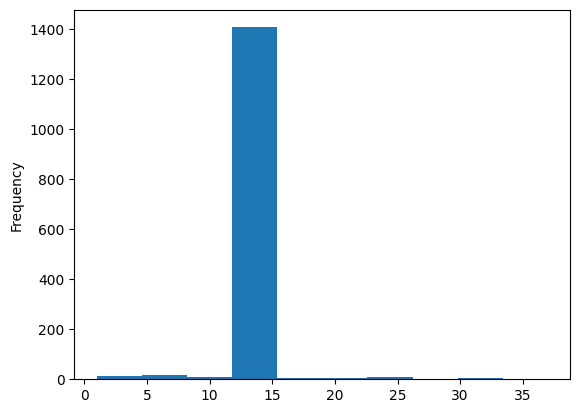

In [298]:
# Histogram after NaN removal
covid_flu["DurationOfIllness"].plot(kind = "hist")

#### Temperature

<Axes: ylabel='Frequency'>

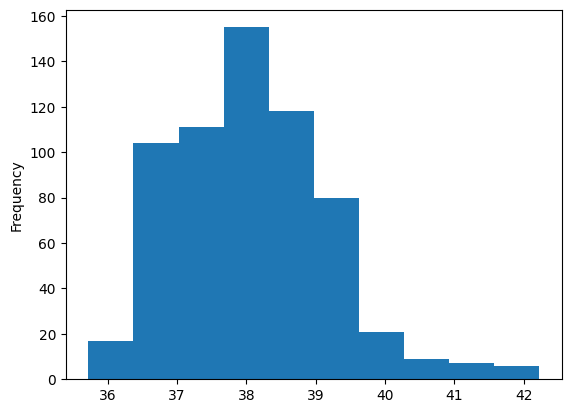

In [299]:
covid_flu['Temperature'].plot(kind = "hist")

In [300]:
covid_flu['Temperature'].isna().mean()

0.5762483130904184

- Given that the missing temperature values (NaN) likely indicate that the patient didn't have a higher temperature.

- Normal temperature: 35-37°C
- Increased temperature: above 37°C
- Subfebrile: 37-38°C
- Fever (febrile, pyrexia): above 38°C
- Hyperpyrexia: above 40°C

In [301]:
# imputer = KNNImputer(n_neighbors=5)

# # Reshape the Series to a DataFrame with one column
# Temperature_reshaped = covid_flu[["Temperature"]]

# # Apply KNN imputation
# covid_flu["Temperature"] = imputer.fit_transform(Temperature_reshaped)

In [302]:
covid_flu['Temperature'].fillna(36.8, inplace=True)  # Just below the higher temperature threshold

<Axes: ylabel='Frequency'>

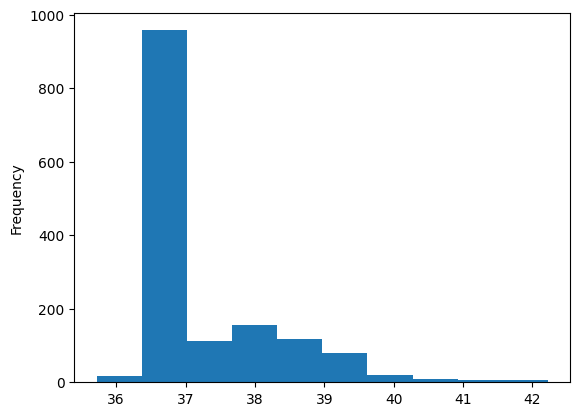

In [303]:
# Histogram after NaN removal
covid_flu['Temperature'].plot(kind = "hist")

In [304]:
covid_flu.isnull().sum()

Diagnosis                         0
InitialPCRDiagnosis            1378
Age                               0
Sex                              76
neutrophil                        0
serumLevelsOfWhiteBloodCell       0
lymphocytes                       0
CReactiveProteinLevels         1345
DurationOfIllness                 0
CTscanResults                  1323
RiskFactors                    1273
GroundGlassOpacity             1389
Diarrhea                       1032
Fever                           559
Coughing                        623
ShortnessOfBreath              1407
SoreThroat                      812
NauseaVomitting                1061
Temperature                       0
Fatigue                         951
dtype: int64

### Feature improvement - Categorical Data

In [305]:
covid_flu.select_dtypes(include='category').columns.tolist()

[]

In [306]:
categorical_columns = covid_flu.select_dtypes(include='object').columns.tolist()
print(categorical_columns)

['Diagnosis', 'InitialPCRDiagnosis', 'Sex', 'CTscanResults', 'RiskFactors', 'GroundGlassOpacity', 'Diarrhea', 'Fever', 'Coughing', 'ShortnessOfBreath', 'SoreThroat', 'NauseaVomitting', 'Fatigue']


In [307]:
# We want to remove our response variable from this list because it is not a feature in our ML model.
categorical_columns.remove("Diagnosis")

In [308]:
categorical_columns

['InitialPCRDiagnosis',
 'Sex',
 'CTscanResults',
 'RiskFactors',
 'GroundGlassOpacity',
 'Diarrhea',
 'Fever',
 'Coughing',
 'ShortnessOfBreath',
 'SoreThroat',
 'NauseaVomitting',
 'Fatigue']

In [309]:
# covid_flu[categorical_columns] = covid_flu[categorical_columns].astype('category')

In [310]:
# covid_flu.select_dtypes(include='category').columns.tolist()

In [311]:
for categorical_column in categorical_columns:
    print('=======')
    print(categorical_column)
    print('=======')
    print(covid_flu[categorical_column].value_counts(dropna=False))
    print()

InitialPCRDiagnosis
NaN    1378
Yes     100
No        4
Name: InitialPCRDiagnosis, dtype: int64

Sex
M      748
F      658
NaN     76
Name: Sex, dtype: int64

CTscanResults
NaN    1323
Yes     144
No       15
Name: CTscanResults, dtype: int64

RiskFactors
NaN                                                                   1273
asthma                                                                  36
pneumonia                                                               21
immuno                                                                  21
diabetes                                                                16
                                                                      ... 
diabetes, Hypertension                                                   1
Hypertension, Heart Disease, chronic obstructive pulmonary disease       1
rheumatoid arthritis                                                     1
hematological disease, immuno, Renal Disease                         

### InitialPCRDiagnosis Column

For our purposes, let's make an assumption about missing categorical data and say that if a categorical value (which in our data represents a symptom) is missing, the physician responsible for recording it did not think they had that symptom, so it is more likely than not that they did not have that symptom.

In [312]:
covid_flu['InitialPCRDiagnosis'].isna().mean()

0.9298245614035088

In [313]:
# Impute with a specific value
covid_flu['InitialPCRDiagnosis'].fillna('No', inplace=True)

In [314]:
covid_flu["InitialPCRDiagnosis"].value_counts(normalize= True)

No     0.932524
Yes    0.067476
Name: InitialPCRDiagnosis, dtype: float64

In [315]:
covid_flu["InitialPCRDiagnosis"] = covid_flu["InitialPCRDiagnosis"].map({"No": 0, "Yes": 1})
# covid_flu = pd.get_dummies(covid_flu, columns = ["InitialPCRDiagnosis"])

In [316]:
covid_flu.head(20)

Diagnosis  InitialPCRDiagnosis   Age Sex  neutrophil  \
0       H1N1                    0  67.0   F    6.854078   
1       H1N1                    0  29.0   M    6.854078   
2       H1N1                    0  22.0   F    6.854078   
3       H1N1                    0  20.0   F    6.854078   
4       H1N1                    0  21.0   M    6.854078   
5       H1N1                    0  22.0   F    6.854078   
6       H1N1                    0  19.0   F    6.854078   
7       H1N1                    0  60.0   M    6.854078   
8       H1N1                    0  46.0   F    6.854078   
9       H1N1                    0  18.0   M    6.854078   
10      H1N1                    0  53.0   M    6.854078   
11      H1N1                    0  56.0   M    6.854078   
12      H1N1                    0  55.0   F    6.854078   
13      H1N1                    0  36.0   M    6.854078   
14      H1N1                    0  29.0   F    6.854078   
15      H1N1                    0  60.0   F    6.854078   
16      H1N1                    0  63.0   F    6.854078   
17      H1N1                    0  21.0   F    6.854078   
18      H1N1                    0  66.0   M    6.854078   
19      H1N1                    0  22.0   F    6.854078   

    serumLevelsOfWhiteBloodCell  lymphocytes  CReactiveProteinLevels  \
0                      6.885159     1.850154                     NaN   
1                      6.885159     1.850154                     NaN   
2                      6.885159     1.850154                     NaN   
3                      6.885159     1.850154                     NaN   
4                      6.885159     1.850154                     NaN   
5                      6.885159     1.850154                     NaN   
6                      6.885159     1.850154                     NaN   
7                      6.885159     1.850154                     NaN   
8                      6.885159     1.850154                     NaN   
9                      6.885159     1.850154                     NaN   
10                     6.885159     1.850154                     NaN   
11                     6.885159     1.850154                     NaN   
12                     6.885159     1.850154                     NaN   
13                     6.885159     1.850154                     NaN   
14                     6.885159     1.850154                     NaN   
15                     6.885159     1.850154                     NaN   
16                     6.885159     1.850154                     NaN   
17                     6.885159     1.850154                     NaN   
18                     6.885159     1.850154                     NaN   
19                     6.885159     1.850154                     NaN   

    DurationOfIllness CTscanResults                   RiskFactors  \
0           13.988506           NaN                           NaN   
1           13.988506           NaN                           NaN   
2           13.988506           NaN                           NaN   
3           13.988506           NaN                        immuno   
4           13.988506           NaN                           NaN   
5           13.988506           NaN                           NaN   
6           13.988506           NaN                           NaN   
7           13.988506           NaN         Renal Disease, athero   
8           13.988506           NaN                           NaN   
9           13.988506           NaN                           NaN   
10          13.988506           NaN     chronic, diabetes, athero   
11          13.988506           NaN                        immuno   
12          13.988506           NaN                           NaN   
13          13.988506           NaN                      diabetes   
14          13.988506           NaN                           NaN   
15          13.988506           NaN  asthma, congestive, diabetes   
16          13.988506           NaN       diabetes, Renal Disease   
17      

### SoreThroat Column 

In [317]:
covid_flu['SoreThroat'].isna().mean()

0.5479082321187584

In [318]:
covid_flu['SoreThroat'].value_counts()

Yes    407
No     263
Name: SoreThroat, dtype: int64

In [319]:
covid_flu['SoreThroat'].fillna("No", inplace = True)

In [320]:
# Example: Convert 'SoreThroat' column to numerical values
covid_flu['SoreThroat'] = covid_flu['SoreThroat'].map({'No': 0, 'Yes': 1})

In [321]:
covid_flu['SoreThroat'].value_counts()

0    1075
1     407
Name: SoreThroat, dtype: int64

### Sex Column

In [322]:
covid_flu['Sex'].isna().mean()

0.05128205128205128

In [323]:
# Impute with a specific value
covid_flu['Sex'].fillna('Unknown', inplace=True)

In [324]:
covid_flu['Sex'].value_counts()

M          748
F          658
Unknown     76
Name: Sex, dtype: int64

In [325]:
# Remove rows where 'Sex' is 'Unknown'
covid_flu = covid_flu[covid_flu['Sex'] != 'Unknown']

In [326]:
covid_flu['Sex'] = covid_flu['Sex'].map({"M": 1, "F": 0})
# covid_flu = pd.get_dummies(covid_flu, columns = ["Sex"])

In [327]:
# Rename the column 'Sex' to 'Sex_M'
covid_flu.rename(columns={'Sex': 'Sex_M'}, inplace=True)

In [328]:
covid_flu.head(20)

Diagnosis  InitialPCRDiagnosis   Age  Sex_M  neutrophil  \
0       H1N1                    0  67.0      0    6.854078   
1       H1N1                    0  29.0      1    6.854078   
2       H1N1                    0  22.0      0    6.854078   
3       H1N1                    0  20.0      0    6.854078   
4       H1N1                    0  21.0      1    6.854078   
5       H1N1                    0  22.0      0    6.854078   
6       H1N1                    0  19.0      0    6.854078   
7       H1N1                    0  60.0      1    6.854078   
8       H1N1                    0  46.0      0    6.854078   
9       H1N1                    0  18.0      1    6.854078   
10      H1N1                    0  53.0      1    6.854078   
11      H1N1                    0  56.0      1    6.854078   
12      H1N1                    0  55.0      0    6.854078   
13      H1N1                    0  36.0      1    6.854078   
14      H1N1                    0  29.0      0    6.854078   
15      H1N1                    0  60.0      0    6.854078   
16      H1N1                    0  63.0      0    6.854078   
17      H1N1                    0  21.0      0    6.854078   
18      H1N1                    0  66.0      1    6.854078   
19      H1N1                    0  22.0      0    6.854078   

    serumLevelsOfWhiteBloodCell  lymphocytes  CReactiveProteinLevels  \
0                      6.885159     1.850154                     NaN   
1                      6.885159     1.850154                     NaN   
2                      6.885159     1.850154                     NaN   
3                      6.885159     1.850154                     NaN   
4                      6.885159     1.850154                     NaN   
5                      6.885159     1.850154                     NaN   
6                      6.885159     1.850154                     NaN   
7                      6.885159     1.850154                     NaN   
8                      6.885159     1.850154                     NaN   
9                      6.885159     1.850154                     NaN   
10                     6.885159     1.850154                     NaN   
11                     6.885159     1.850154                     NaN   
12                     6.885159     1.850154                     NaN   
13                     6.885159     1.850154                     NaN   
14                     6.885159     1.850154                     NaN   
15                     6.885159     1.850154                     NaN   
16                     6.885159     1.850154                     NaN   
17                     6.885159     1.850154                     NaN   
18                     6.885159     1.850154                     NaN   
19                     6.885159     1.850154                     NaN   

    DurationOfIllness CTscanResults                   RiskFactors  \
0           13.988506           NaN                           NaN   
1           13.988506           NaN                           NaN   
2           13.988506           NaN                           NaN   
3           13.988506           NaN                        immuno   
4           13.988506           NaN                           NaN   
5           13.988506           NaN                           NaN   
6           13.988506           NaN                           NaN   
7           13.988506           NaN         Renal Disease, athero   
8           13.988506           NaN                           NaN   
9           13.988506           NaN                           NaN   
10          13.988506           NaN     chronic, diabetes, athero   
11          13.988506           NaN                        immuno   
12          13.988506           NaN                           NaN   
13          13.988506           NaN                      diabetes   
14          13.988506           NaN                           NaN   
15          13.988506           NaN  asthma, congestive, diabetes   
16          13

In [329]:
covid_flu.isna().sum()

Diagnosis                         0
InitialPCRDiagnosis               0
Age                               0
Sex_M                             0
neutrophil                        0
serumLevelsOfWhiteBloodCell       0
lymphocytes                       0
CReactiveProteinLevels         1274
DurationOfIllness                 0
CTscanResults                  1251
RiskFactors                    1199
GroundGlassOpacity             1317
Diarrhea                        957
Fever                           486
Coughing                        551
ShortnessOfBreath              1332
SoreThroat                        0
NauseaVomitting                 985
Temperature                       0
Fatigue                         875
dtype: int64

### CReactiveProteinLevels

In [330]:
covid_flu['CReactiveProteinLevels'].value_counts(dropna = False)

NaN      1274
8.00        3
15.00       3
0.50        3
34.64       2
         ... 
67.62       1
13.20       1
21.27       1
69.93       1
28.40       1
Name: CReactiveProteinLevels, Length: 119, dtype: int64

In [331]:
# Function to extract numerical value from string
def extract_numerical(value):
    if pd.isna(value):
        return np.nan
    # Use regex to extract the numerical part
    match = re.search(r'([-+]?\d*\.\d+|\d+)', str(value))
    if match:
        return float(match.group(0))
    return np.nan

In [332]:
# Apply the function to the column
covid_flu['CReactiveProteinLevels'] = covid_flu['CReactiveProteinLevels'].apply(extract_numerical)

In [333]:
covid_flu['CReactiveProteinLevels'].value_counts(dropna = False)

NaN      1274
8.00        3
15.00       3
0.50        3
34.64       2
         ... 
67.62       1
13.20       1
21.27       1
69.93       1
28.40       1
Name: CReactiveProteinLevels, Length: 119, dtype: int64

In [334]:
print(covid_flu["CReactiveProteinLevels"].dtype)

float64


<Axes: ylabel='Frequency'>

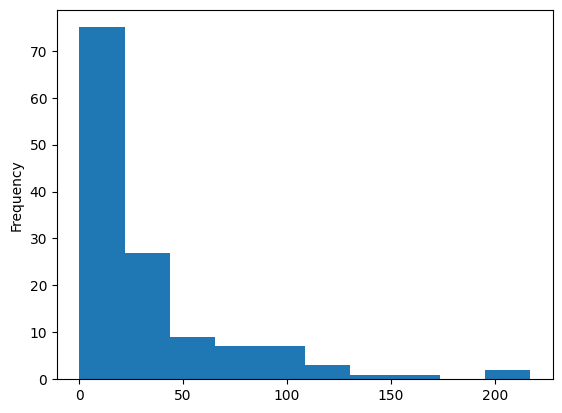

In [335]:
covid_flu["CReactiveProteinLevels"].plot(kind = "hist")

- The histogram in the image represents a right-skewed distribution (also known as positively skewed).
- Given this distribution, the median would be a more appropriate measure to use for filling in missing values, as it better represents the central tendency of the data than the mean would.

In [336]:
covid_flu["CReactiveProteinLevels"].isna().mean()

0.9061166429587483

- When you have a dataset where more than 80% of the data in a column is missing (NaN), it presents a significant challenge.

In [337]:
imputer = KNNImputer(n_neighbors=5)

# Reshape the Series to a DataFrame with one column
CReactiveProteinLevels_reshaped = covid_flu[["CReactiveProteinLevels"]]

# Apply KNN imputation
covid_flu["CReactiveProteinLevels"] = imputer.fit_transform(CReactiveProteinLevels_reshaped)

<Axes: ylabel='Frequency'>

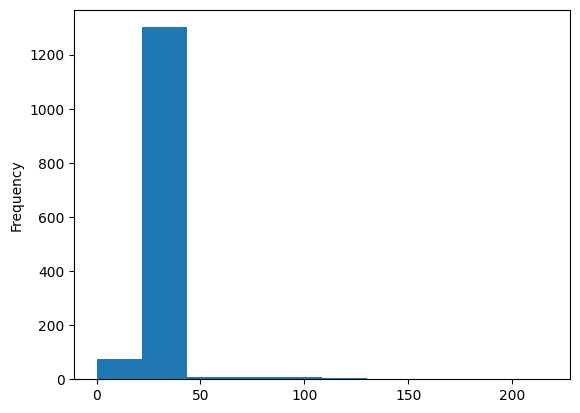

In [338]:
# Histogram after NaN removal
covid_flu["CReactiveProteinLevels"].plot(kind = "hist")

In [339]:
covid_flu.isna().mean()

Diagnosis                      0.000000
InitialPCRDiagnosis            0.000000
Age                            0.000000
Sex_M                          0.000000
neutrophil                     0.000000
serumLevelsOfWhiteBloodCell    0.000000
lymphocytes                    0.000000
CReactiveProteinLevels         0.000000
DurationOfIllness              0.000000
CTscanResults                  0.889758
RiskFactors                    0.852774
GroundGlassOpacity             0.936700
Diarrhea                       0.680654
Fever                          0.345661
Coughing                       0.391892
ShortnessOfBreath              0.947368
SoreThroat                     0.000000
NauseaVomitting                0.700569
Temperature                    0.000000
Fatigue                        0.622333
dtype: float64

#### CTscanResults

In [340]:
covid_flu["CTscanResults"].value_counts(dropna = False)

NaN    1251
Yes     140
No       15
Name: CTscanResults, dtype: int64

In [341]:
covid_flu["CTscanResults"].isna().mean()

0.8897581792318634

In [342]:
covid_flu["CTscanResults"].fillna("No", inplace = True)

In [343]:
covid_flu["CTscanResults"].value_counts(dropna = False)

No     1266
Yes     140
Name: CTscanResults, dtype: int64

In [344]:
covid_flu["CTscanResults"] = covid_flu["CTscanResults"].map({"No": 0, "Yes": 1})
# covid_flu = pd.get_dummies(covid_flu, columns = ["CTscanResults"])

In [345]:
covid_flu.columns

Index(['Diagnosis', 'InitialPCRDiagnosis', 'Age', 'Sex_M', 'neutrophil',
       'serumLevelsOfWhiteBloodCell', 'lymphocytes', 'CReactiveProteinLevels',
       'DurationOfIllness', 'CTscanResults', 'RiskFactors',
       'GroundGlassOpacity', 'Diarrhea', 'Fever', 'Coughing',
       'ShortnessOfBreath', 'SoreThroat', 'NauseaVomitting', 'Temperature',
       'Fatigue'],
      dtype='object')

### Coughing Column

In [346]:
covid_flu["Coughing"].value_counts(dropna= False)

Yes    742
NaN    551
No     113
Name: Coughing, dtype: int64

In [347]:
covid_flu["Coughing"].fillna("No", inplace = True)

In [348]:
covid_flu["Coughing"].value_counts()

Yes    742
No     664
Name: Coughing, dtype: int64

In [349]:
covid_flu["Coughing"] = covid_flu["Coughing"].map({"Yes": 1, "No": 0})
# covid_flu = pd.get_dummies(covid_flu, columns = ["Coughing"])

In [350]:
covid_flu.columns

Index(['Diagnosis', 'InitialPCRDiagnosis', 'Age', 'Sex_M', 'neutrophil',
       'serumLevelsOfWhiteBloodCell', 'lymphocytes', 'CReactiveProteinLevels',
       'DurationOfIllness', 'CTscanResults', 'RiskFactors',
       'GroundGlassOpacity', 'Diarrhea', 'Fever', 'Coughing',
       'ShortnessOfBreath', 'SoreThroat', 'NauseaVomitting', 'Temperature',
       'Fatigue'],
      dtype='object')

In [351]:
covid_flu.isnull().sum()

Diagnosis                         0
InitialPCRDiagnosis               0
Age                               0
Sex_M                             0
neutrophil                        0
serumLevelsOfWhiteBloodCell       0
lymphocytes                       0
CReactiveProteinLevels            0
DurationOfIllness                 0
CTscanResults                     0
RiskFactors                    1199
GroundGlassOpacity             1317
Diarrhea                        957
Fever                           486
Coughing                          0
ShortnessOfBreath              1332
SoreThroat                        0
NauseaVomitting                 985
Temperature                       0
Fatigue                         875
dtype: int64

### RiskFactors

In [352]:
covid_flu["RiskFactors"].value_counts(dropna = False).head(10)

NaN                                    1199
asthma                                   36
pneumonia                                21
immuno                                   21
diabetes                                 16
chronic                                  11
congestive, diabetes, Renal Disease       7
influenza                                 7
Hypertension                              6
chronic, diabetes                         5
Name: RiskFactors, dtype: int64

In [353]:
covid_flu["RiskFactors"].fillna("No_RiskFactors", inplace = True)

In [354]:
covid_flu["RiskFactors"].value_counts(dropna = False).head(10)

No_RiskFactors                         1199
asthma                                   36
pneumonia                                21
immuno                                   21
diabetes                                 16
chronic                                  11
congestive, diabetes, Renal Disease       7
influenza                                 7
Hypertension                              6
chronic, diabetes                         5
Name: RiskFactors, dtype: int64

In [355]:
# Step 1: Split combined risk factors and normalize
# Normalize the Risk Factor Names
# Convert to title case and split by commas
covid_flu['RiskFactors'] = covid_flu['RiskFactors'].astype(str).apply(lambda x: [item.strip().title() for item in x.split(',')])

In [356]:
covid_flu["RiskFactors"].value_counts(dropna = False).head(10)

[No_Riskfactors]                         1199
[Asthma]                                   36
[Pneumonia]                                22
[Immuno]                                   21
[Diabetes]                                 16
[Chronic]                                  11
[Hypertension]                              7
[Congestive, Diabetes, Renal Disease]       7
[Influenza]                                 7
[Chronic, Diabetes]                         5
Name: RiskFactors, dtype: int64

In [357]:
# Step 2: Expand the list of risk factors into separate rows
expanded_risk_factors = covid_flu['RiskFactors'].explode()

In [358]:
covid_flu["RiskFactors"].value_counts(dropna = False).head(10)

[No_Riskfactors]                         1199
[Asthma]                                   36
[Pneumonia]                                22
[Immuno]                                   21
[Diabetes]                                 16
[Chronic]                                  11
[Hypertension]                              7
[Congestive, Diabetes, Renal Disease]       7
[Influenza]                                 7
[Chronic, Diabetes]                         5
Name: RiskFactors, dtype: int64

In [359]:
# Step 3: Create dummy variables
dummies = pd.get_dummies(expanded_risk_factors)

In [360]:
# Step 4: Aggregate the dummies back to the original DataFrame structure
dummy_agg = dummies.groupby(expanded_risk_factors.index).max()

In [361]:
dummy_agg.columns

Index(['Asthma', 'Athero',
       'Atopic Dermatitis And Repetitive Respiratory Infections',
       'Begin Tumor (Removed)', 'Chronic', 'Chronic Endrocrine Disorder',
       'Chronic Liver Dieseas', 'Chronic Liver Disorder',
       'Chronic Neurological Disorders',
       'Chronic Obstructive Pulmonary Disease', 'Chronic Sinusitis',
       'Chronic Spontaneous Urticaria', 'Congestive',
       'Coronary Artery Disease', 'Coronary Eart Disease', 'Diabetes',
       'Fatty Liver', 'Fetal Distress', 'Heart Disease',
       'Hematological Disease', 'Hepb', 'Hypertension',
       'Hypertension And Copd', 'Hypertention', 'Hyperthyroidism',
       'Hypothyroidism', 'Immuno', 'Influenza', 'Kidney Transplant Recipient',
       'Lung Cancer', 'Lung Disease', 'Myxoma Of Abdominal Cavity',
       'No_Riskfactors', 'Obesity',
       'Pneumomediastinum And Subcutaneous Emphysema', 'Pneumonia',
       'Pre-Eclampsia', 'Prom', 'Renal Disease', 'Respiratory Disease',
       'Rheumatoid Arthritis'],
     

In [362]:
dummy_agg = dummy_agg.drop('No_Riskfactors', axis=1)

In [363]:
covid_flu.columns

Index(['Diagnosis', 'InitialPCRDiagnosis', 'Age', 'Sex_M', 'neutrophil',
       'serumLevelsOfWhiteBloodCell', 'lymphocytes', 'CReactiveProteinLevels',
       'DurationOfIllness', 'CTscanResults', 'RiskFactors',
       'GroundGlassOpacity', 'Diarrhea', 'Fever', 'Coughing',
       'ShortnessOfBreath', 'SoreThroat', 'NauseaVomitting', 'Temperature',
       'Fatigue'],
      dtype='object')

In [364]:
covid_flu = covid_flu.drop("RiskFactors", axis=1)

In [365]:
# Combine with the original DataFrame
covid_flu = pd.concat([covid_flu, dummy_agg], axis=1)

In [366]:
covid_flu

Diagnosis  InitialPCRDiagnosis   Age  Sex_M  neutrophil  \
0         H1N1                    0  67.0      0    6.854078   
1         H1N1                    0  29.0      1    6.854078   
2         H1N1                    0  22.0      0    6.854078   
3         H1N1                    0  20.0      0    6.854078   
4         H1N1                    0  21.0      1    6.854078   
...        ...                  ...   ...    ...         ...   
1472   COVID19                    0  35.0      1    2.620000   
1473   COVID19                    0  51.0      1    3.180000   
1474   COVID19                    0  65.0      0    5.350000   
1475   COVID19                    0  72.0      1    3.730000   
1476   COVID19                    0  56.0      0    3.000000   

      serumLevelsOfWhiteBloodCell  lymphocytes  CReactiveProteinLevels  \
0                        6.885159     1.850154               31.305152   
1                        6.885159     1.850154               31.305152   
2                        6.885159     1.850154               31.305152   
3                        6.885159     1.850154               31.305152   
4                        6.885159     1.850154               31.305152   
...                           ...          ...                     ...   
1472                     4.620000     1.590000               35.600000   
1473                     4.940000     1.450000               13.000000   
1474                     5.890000     0.420000               33.200000   
1475                     4.990000     1.850154               85.000000   
1476                     3.980000     0.830000               28.400000   

      DurationOfIllness  CTscanResults GroundGlassOpacity Diarrhea Fever  \
0             13.988506              0                NaN      NaN   Yes   
1             13.988506              0                NaN      NaN   NaN   
2             13.988506              0                NaN      NaN   NaN   
3             13.988506              0                NaN      NaN   Yes   
4             13.988506              0                NaN      NaN   NaN   
...                 ...            ...                ...      ...   ...   
1472          13.988506              0                NaN       No   Yes   
1473          13.988506              0                NaN       No    No   
1474          13.988506              0                NaN       No   Yes   
1475          13.988506              0                NaN       No   Yes   
1476          13.988506              0                NaN       No   Yes   

      Coughing ShortnessOfBreath  SoreThroat NauseaVomitting  Temperature  \
0            1               NaN           0             NaN    38.111111   
1            0               NaN           0             NaN    36.800000   
2            0               NaN           0             NaN    36.800000   
3            1               NaN           0             NaN    36.555556   
4            0               NaN           0             NaN    36.800000   
...        ...               ...         ...             ...          ...   
1472         1               NaN           0              No    36.800000   
1473         1               NaN           0             Yes    36.800000   
1474         1               NaN           0              No    36.800000   
1475         1               NaN           0              No    36.800000   
1476         1               NaN           0              No    36.800000   

     Fatigue  Asthma  Athero  \
0         No       0       0   
1        NaN       0       0   
2        NaN       0       0   
3        Yes       0       0   
4        NaN       0       0   
...      ...     ...     ...   
1472     NaN       0       0   
1473     NaN       0       0   
1474     NaN       0       0   
1475     NaN       0       0   
1476     NaN       0       0   

      Atopic Dermatitis And Repetitive Respiratory Infections  \
0                                                     0    

In [367]:
covid_flu.isna().sum().head(30)

Diagnosis                                                     0
InitialPCRDiagnosis                                           0
Age                                                           0
Sex_M                                                         0
neutrophil                                                    0
serumLevelsOfWhiteBloodCell                                   0
lymphocytes                                                   0
CReactiveProteinLevels                                        0
DurationOfIllness                                             0
CTscanResults                                                 0
GroundGlassOpacity                                         1317
Diarrhea                                                    957
Fever                                                       486
Coughing                                                      0
ShortnessOfBreath                                          1332
SoreThroat                              

#### GroundGlassOpacity

In [368]:
covid_flu["GroundGlassOpacity"].value_counts(dropna = False)

NaN    1317
Yes      86
No        3
Name: GroundGlassOpacity, dtype: int64

In [369]:
covid_flu["GroundGlassOpacity"].fillna("Not Tested", inplace = True)

In [370]:
covid_flu["GroundGlassOpacity"].value_counts(dropna = False)

Not Tested    1317
Yes             86
No               3
Name: GroundGlassOpacity, dtype: int64

In [371]:
covid_flu = pd.get_dummies(covid_flu, columns = ["GroundGlassOpacity"])

In [372]:
covid_flu.columns

Index(['Diagnosis', 'InitialPCRDiagnosis', 'Age', 'Sex_M', 'neutrophil',
       'serumLevelsOfWhiteBloodCell', 'lymphocytes', 'CReactiveProteinLevels',
       'DurationOfIllness', 'CTscanResults', 'Diarrhea', 'Fever', 'Coughing',
       'ShortnessOfBreath', 'SoreThroat', 'NauseaVomitting', 'Temperature',
       'Fatigue', 'Asthma', 'Athero',
       'Atopic Dermatitis And Repetitive Respiratory Infections',
       'Begin Tumor (Removed)', 'Chronic', 'Chronic Endrocrine Disorder',
       'Chronic Liver Dieseas', 'Chronic Liver Disorder',
       'Chronic Neurological Disorders',
       'Chronic Obstructive Pulmonary Disease', 'Chronic Sinusitis',
       'Chronic Spontaneous Urticaria', 'Congestive',
       'Coronary Artery Disease', 'Coronary Eart Disease', 'Diabetes',
       'Fatty Liver', 'Fetal Distress', 'Heart Disease',
       'Hematological Disease', 'Hepb', 'Hypertension',
       'Hypertension And Copd', 'Hypertention', 'Hyperthyroidism',
       'Hypothyroidism', 'Immuno', 'Influen

#### Diarrhea

In [373]:
covid_flu["Diarrhea"].value_counts(dropna = False)

NaN    957
No     340
Yes    109
Name: Diarrhea, dtype: int64

In [374]:
covid_flu["Diarrhea"].fillna("No", inplace = True)

In [375]:
covid_flu["Diarrhea"].value_counts(dropna = False)

No     1297
Yes     109
Name: Diarrhea, dtype: int64

In [376]:
# Map 'No' to 0 and 'Yes' to 1
covid_flu["Diarrhea"] = covid_flu["Diarrhea"].map({"No": 0, "Yes": 1})

#### Fever

In [377]:
covid_flu["Fever"].value_counts(dropna = False)

Yes    775
NaN    486
No     145
Name: Fever, dtype: int64

In [378]:
covid_flu["Fever"].fillna("No", inplace = True)

In [379]:
covid_flu["Fever"].value_counts(dropna = False)

Yes    775
No     631
Name: Fever, dtype: int64

In [380]:
# Map 'No' to 0 and 'Yes' to 1
covid_flu["Fever"] = covid_flu["Fever"].map({'No': 0, 'Yes': 1})

#### Shortness Of Breath 

In [381]:
covid_flu["ShortnessOfBreath"].value_counts(dropna = False)

NaN    1332
Yes      45
No       29
Name: ShortnessOfBreath, dtype: int64

In [382]:
covid_flu["ShortnessOfBreath"].fillna("No", inplace = True)

In [383]:
covid_flu["ShortnessOfBreath"].value_counts(dropna = False)

No     1361
Yes      45
Name: ShortnessOfBreath, dtype: int64

In [384]:
# Map 'No' to 0 and 'Yes' to 1
covid_flu["ShortnessOfBreath"] = covid_flu["ShortnessOfBreath"].map({'No': 0, 'Yes': 1})

#### SoreThroat

In [385]:
covid_flu["SoreThroat"].value_counts(dropna = False)

0    1001
1     405
Name: SoreThroat, dtype: int64

#### Nausea Vomitting

In [389]:
covid_flu["NauseaVomitting"].value_counts(dropna = False)

NaN    985
No     319
Yes    102
Name: NauseaVomitting, dtype: int64

In [390]:
covid_flu["NauseaVomitting"].fillna("No", inplace = True)

In [391]:
covid_flu["NauseaVomitting"].value_counts(dropna = False)

No     1304
Yes     102
Name: NauseaVomitting, dtype: int64

In [392]:
# Map 'No' to 0 and 'Yes' to 1
covid_flu["NauseaVomitting"] = covid_flu["NauseaVomitting"].map({'No': 0, 'Yes': 1})

#### Fatigue 

In [393]:
covid_flu["Fatigue"].value_counts(dropna = False)

NaN    875
Yes    348
No     183
Name: Fatigue, dtype: int64

In [394]:
covid_flu["Fatigue"].fillna("No", inplace = True)

In [395]:
covid_flu["Fatigue"].value_counts(dropna = False)

No     1058
Yes     348
Name: Fatigue, dtype: int64

In [396]:
# Map 'No' to 0 and 'Yes' to 1
covid_flu["Fatigue"] = covid_flu["Fatigue"].map({'No': 0, 'Yes': 1})

In [397]:
covid_flu.columns

Index(['Diagnosis', 'InitialPCRDiagnosis', 'Age', 'Sex_M', 'neutrophil',
       'serumLevelsOfWhiteBloodCell', 'lymphocytes', 'CReactiveProteinLevels',
       'DurationOfIllness', 'CTscanResults', 'Diarrhea', 'Fever', 'Coughing',
       'ShortnessOfBreath', 'SoreThroat', 'NauseaVomitting', 'Temperature',
       'Fatigue', 'Asthma', 'Athero',
       'Atopic Dermatitis And Repetitive Respiratory Infections',
       'Begin Tumor (Removed)', 'Chronic', 'Chronic Endrocrine Disorder',
       'Chronic Liver Dieseas', 'Chronic Liver Disorder',
       'Chronic Neurological Disorders',
       'Chronic Obstructive Pulmonary Disease', 'Chronic Sinusitis',
       'Chronic Spontaneous Urticaria', 'Congestive',
       'Coronary Artery Disease', 'Coronary Eart Disease', 'Diabetes',
       'Fatty Liver', 'Fetal Distress', 'Heart Disease',
       'Hematological Disease', 'Hepb', 'Hypertension',
       'Hypertension And Copd', 'Hypertention', 'Hyperthyroidism',
       'Hypothyroidism', 'Immuno', 'Influen

In [398]:
covid_flu.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1406 entries, 0 to 1476
Data columns (total 61 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   Diagnosis                                                1406 non-null   object 
 1   InitialPCRDiagnosis                                      1406 non-null   int64  
 2   Age                                                      1406 non-null   float64
 3   Sex_M                                                    1406 non-null   int64  
 4   neutrophil                                               1406 non-null   float64
 5   serumLevelsOfWhiteBloodCell                              1406 non-null   float64
 6   lymphocytes                                              1406 non-null   float64
 7   CReactiveProteinLevels                                   1406 non-null   float64
 8   DurationOfIllness           

In [399]:
# Set pandas display options globally
pd.set_option('display.max_columns', None)

# Display the DataFrame (all columns will be shown)
covid_flu

Diagnosis  InitialPCRDiagnosis   Age  Sex_M  neutrophil  \
0         H1N1                    0  67.0      0    6.854078   
1         H1N1                    0  29.0      1    6.854078   
2         H1N1                    0  22.0      0    6.854078   
3         H1N1                    0  20.0      0    6.854078   
4         H1N1                    0  21.0      1    6.854078   
...        ...                  ...   ...    ...         ...   
1472   COVID19                    0  35.0      1    2.620000   
1473   COVID19                    0  51.0      1    3.180000   
1474   COVID19                    0  65.0      0    5.350000   
1475   COVID19                    0  72.0      1    3.730000   
1476   COVID19                    0  56.0      0    3.000000   

      serumLevelsOfWhiteBloodCell  lymphocytes  CReactiveProteinLevels  \
0                        6.885159     1.850154               31.305152   
1                        6.885159     1.850154               31.305152   
2                        6.885159     1.850154               31.305152   
3                        6.885159     1.850154               31.305152   
4                        6.885159     1.850154               31.305152   
...                           ...          ...                     ...   
1472                     4.620000     1.590000               35.600000   
1473                     4.940000     1.450000               13.000000   
1474                     5.890000     0.420000               33.200000   
1475                     4.990000     1.850154               85.000000   
1476                     3.980000     0.830000               28.400000   

      DurationOfIllness  CTscanResults  Diarrhea  Fever  Coughing  \
0             13.988506              0         0      1         1   
1             13.988506              0         0      0         0   
2             13.988506              0         0      0         0   
3             13.988506              0         0      1         1   
4             13.988506              0         0      0         0   
...                 ...            ...       ...    ...       ...   
1472          13.988506              0         0      1         1   
1473          13.988506              0         0      0         1   
1474          13.988506              0         0      1         1   
1475          13.988506              0         0      1         1   
1476          13.988506              0         0      1         1   

      ShortnessOfBreath  SoreThroat  NauseaVomitting  Temperature  Fatigue  \
0                     0           0                0    38.111111        0   
1                     0           0                0    36.800000        0   
2                     0           0                0    36.800000        0   
3                     0           0                0    36.555556        1   
4                     0           0                0    36.800000        0   
...                 ...         ...              ...          ...      ...   
1472                  0           0                0    36.800000        0   
1473                  0           0                1    36.800000        0   
1474                  0           0                0    36.800000        0   
1475                  0           0                0    36.800000        0   
1476                  0           0                0    36.800000        0   

      Asthma  Athero  Atopic Dermatitis And Repetitive Respiratory Infections  \
0          0       0                                                  0         
1          0       0                                                  0         
2          0       0                                                  0         
3          0       0                                                  0         
4          0       0                                                  0         
...      ...     ...                                                ...         
1472       0  

### Check Duplicates

In [400]:
# Identify duplicate rows
duplicate_rows = covid_flu[covid_flu.duplicated(keep=False)]

In [401]:
# Sort duplicates based on the first column
sorted_duplicates = duplicate_rows.sort_values(by=duplicate_rows.columns[0])

In [402]:
sorted_duplicates

Diagnosis  InitialPCRDiagnosis   Age  Sex_M  neutrophil  \
1416   COVID19                    0  32.0      0    6.854078   
1089   COVID19                    0  29.0      0    6.854078   
1090   COVID19                    0  35.0      0    6.854078   
1095   COVID19                    0  32.0      0    6.854078   
1096   COVID19                    0  30.0      0    6.854078   
...        ...                  ...   ...    ...         ...   
391       H1N1                    0   4.0      1    6.854078   
390       H1N1                    0   3.0      0    6.854078   
389       H1N1                    0   9.0      1    6.854078   
398       H1N1                    0   6.0      0    6.854078   
460       H1N1                    0   5.0      0    6.854078   

      serumLevelsOfWhiteBloodCell  lymphocytes  CReactiveProteinLevels  \
1416                     6.885159     1.850154               31.305152   
1089                     6.885159     1.850154               31.305152   
1090                     6.885159     1.850154               31.305152   
1095                     6.885159     1.850154               31.305152   
1096                     6.885159     1.850154               31.305152   
...                           ...          ...                     ...   
391                      6.885159     1.850154               31.305152   
390                      6.885159     1.850154               31.305152   
389                      6.885159     1.850154               31.305152   
398                      6.885159     1.850154               31.305152   
460                      6.885159     1.850154               31.305152   

      DurationOfIllness  CTscanResults  Diarrhea  Fever  Coughing  \
1416          13.988506              0         0      1         0   
1089          13.988506              0         0      1         0   
1090          13.988506              0         0      1         0   
1095          13.988506              0         0      1         0   
1096          13.988506              0         0      1         0   
...                 ...            ...       ...    ...       ...   
391           13.988506              0         0      0         0   
390           13.988506              0         0      0         0   
389           13.988506              0         0      0         0   
398           13.988506              0         0      0         0   
460           13.988506              0         0      0         0   

      ShortnessOfBreath  SoreThroat  NauseaVomitting  Temperature  Fatigue  \
1416                  0           0                0         36.8        0   
1089                  0           0                0         36.8        0   
1090                  0           0                0         36.8        0   
1095                  0           0                0         36.8        0   
1096                  0           0                0         36.8        0   
...                 ...         ...              ...          ...      ...   
391                   0           0                0         36.8        0   
390                   0           0                0         36.8        0   
389                   0           0                0         36.8        0   
398                   0           0                0         36.8        0   
460                   0           0                0         36.8        0   

      Asthma  Athero  Atopic Dermatitis And Repetitive Respiratory Infections  \
1416       0       0                                                  0         
1089       0       0                                                  0         
1090       0       0                                                  0         
1095       0       0                                                  0         
1096       0       0                                                  0         
...      ...     ...                                                ...         
391        0  

### B. Handling Float Columns

The float64 columns represent continuous numeric variables. Here are common EDA techniques for these columns:

#### Summary Statistics

- Get an overview of basic statistics for the float columns (mean, median, standard deviation, etc.).

In [403]:
covid_flu.describe()

InitialPCRDiagnosis          Age        Sex_M   neutrophil  \
count          1406.000000  1406.000000  1406.000000  1406.000000   
mean              0.068990    27.292501     0.532006     6.854078   
std               0.253527    21.293288     0.499152     3.419228   
min               0.000000     0.000000     0.000000     0.446000   
25%               0.000000     7.000000     0.000000     6.854078   
50%               0.000000    26.000000     1.000000     6.854078   
75%               0.000000    43.000000     1.000000     6.854078   
max               1.000000    88.000000     1.000000    93.000000   

       serumLevelsOfWhiteBloodCell  lymphocytes  CReactiveProteinLevels  \
count                  1406.000000  1406.000000             1406.000000   
mean                      6.873442     1.850154               31.305152   
std                       1.385586     1.314188               12.141780   
min                       0.500000     0.130000                0.200000   
25%                       6.885159     1.850154               31.305152   
50%                       6.885159     1.850154               31.305152   
75%                       6.885159     1.850154               31.305152   
max                      36.070000    30.600000              217.170000   

       DurationOfIllness  CTscanResults     Diarrhea        Fever  \
count        1406.000000    1406.000000  1406.000000  1406.000000   
mean           13.989912       0.099573     0.077525     0.551209   
std             2.235755       0.299537     0.267518     0.497548   
min             1.000000       0.000000     0.000000     0.000000   
25%            13.988506       0.000000     0.000000     0.000000   
50%            13.988506       0.000000     0.000000     1.000000   
75%            13.988506       0.000000     0.000000     1.000000   
max            37.000000       1.000000     1.000000     1.000000   

          Coughing  ShortnessOfBreath   SoreThroat  NauseaVomitting  \
count  1406.000000        1406.000000  1406.000000      1406.000000   
mean      0.527738           0.032006     0.288051         0.072546   
std       0.499408           0.176078     0.453016         0.259482   
min       0.000000           0.000000     0.000000         0.000000   
25%       0.000000           0.000000     0.000000         0.000000   
50%       1.000000           0.000000     0.000000         0.000000   
75%       1.000000           0.000000     1.000000         0.000000   
max       1.000000           1.000000     1.000000         1.000000   

       Temperature      Fatigue       Asthma       Athero  \
count  1406.000000  1406.000000  1406.000000  1406.000000   
mean     37.319630     0.247511     0.037696     0.004267   
std       0.934090     0.431719     0.190527     0.065209   
min      35.722222     0.000000     0.000000     0.000000   
25%      36.800000     0.000000     0.000000     0.000000   
50%      36.800000     0.000000     0.000000     0.000000   
75%      37.763889     0.000000     0.000000     0.000000   
max      42.222222     1.000000     1.000000     1.000000   

       Atopic Dermatitis And Repetitive Respiratory Infections  \
count                                        1406.000000         
mean                                            0.000711         
std                                             0.026669         
min                                             0.000000         
25%                                             0.000000         
50%                                             0.000000         
75%                                             0.000000         
max                                             1.000000         

       Begin Tumor (Removed)      Chronic  Chronic Endrocrine Disorder  \
count            1406.000000  1406.000000                  1406.000000   
mean                0.000711     0.017070                     0.000711   
std                 0.026669     0.129577                     0.026669   
min   

#### Histograms

- Visualize the distribution of each float column to understand its spread and shape (normal, skewed, etc.).

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'neutrophil'}>,
        <Axes: title={'center': 'serumLevelsOfWhiteBloodCell'}>],
       [<Axes: title={'center': 'lymphocytes'}>,
        <Axes: title={'center': 'CReactiveProteinLevels'}>,
        <Axes: title={'center': 'DurationOfIllness'}>],
       [<Axes: title={'center': 'Temperature'}>, <Axes: >, <Axes: >]],
      dtype=object)

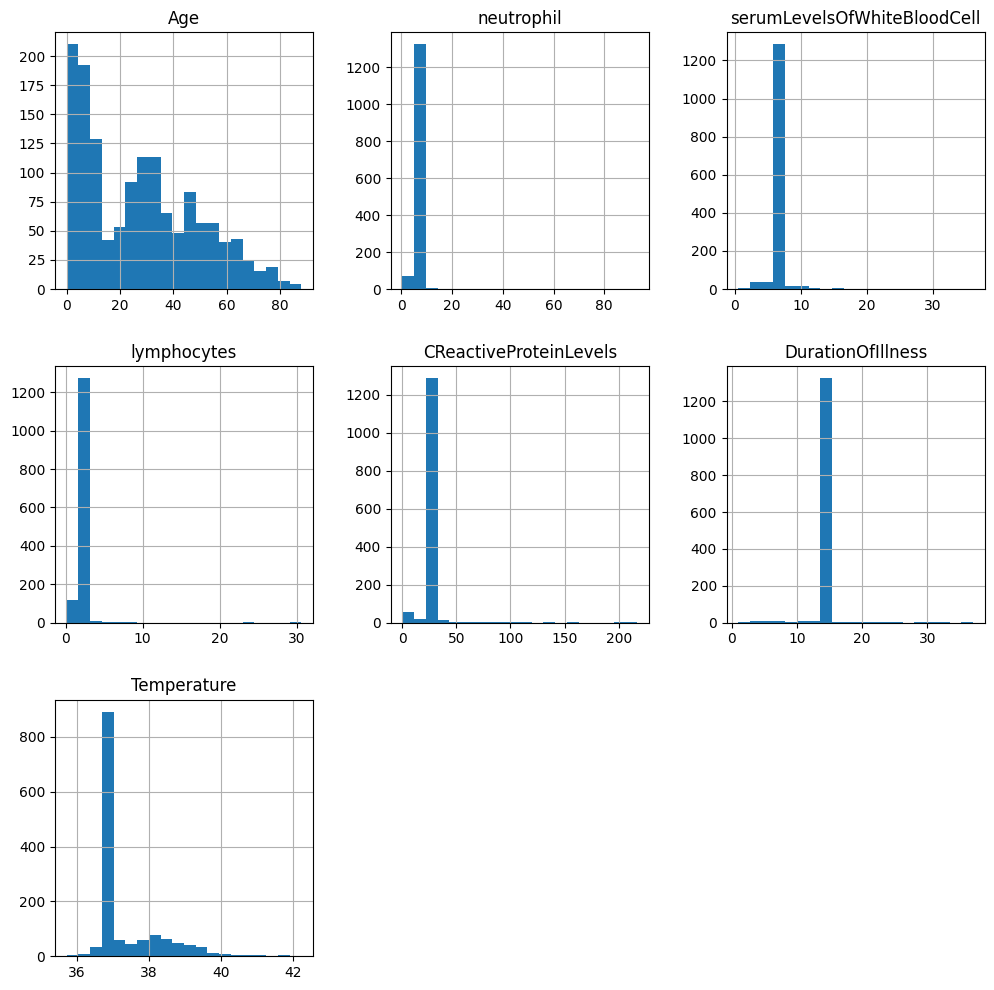

In [404]:
covid_flu[["Age", "neutrophil", "serumLevelsOfWhiteBloodCell", "lymphocytes", "CReactiveProteinLevels", "DurationOfIllness", "Temperature"]].hist(bins=20, figsize=(12, 12))

#### Boxplots

- Use boxplots to identify potential outliers in the float columns

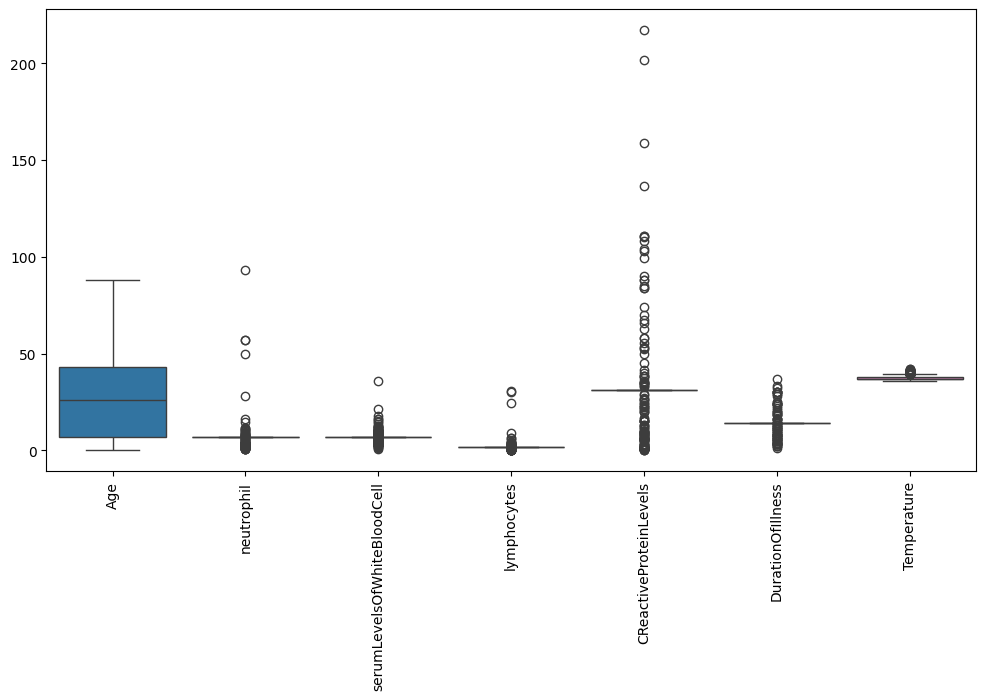

In [405]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=covid_flu[["Age", "neutrophil", "serumLevelsOfWhiteBloodCell", "lymphocytes", "CReactiveProteinLevels", "DurationOfIllness", "Temperature"]])
plt.xticks(rotation=90)
plt.show()

 #### Correlation Matrix

- Check the correlation between the float columns to see if any of them are highly correlated.

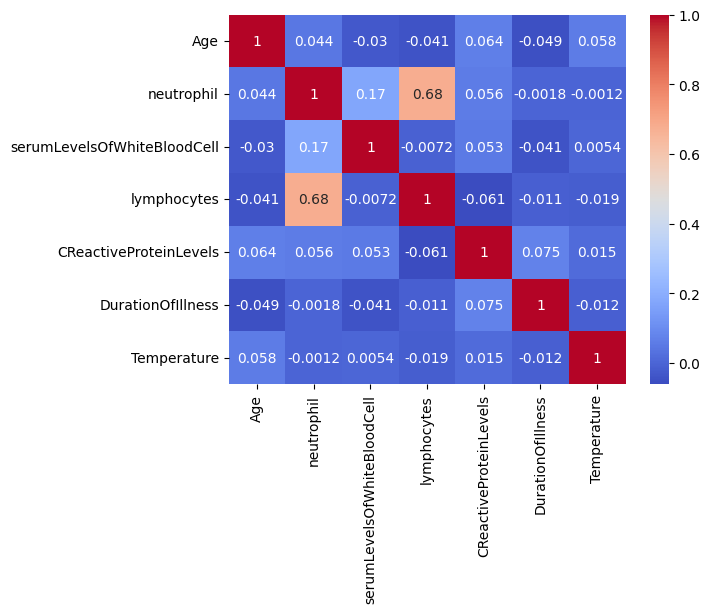

In [406]:
correlation_matrix = covid_flu[["Age", "neutrophil", "serumLevelsOfWhiteBloodCell", "lymphocytes", "CReactiveProteinLevels", "DurationOfIllness", "Temperature"]].corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.show()

## Handling Dummy Columns (Binary Variables)

The dummy columns (binary variables) can be summarized and visualized using different techniques.

#### Count Plots for Binary Variables:

- For each binary column, use a count plot to see how many 0s and 1s there are.

In [407]:
binary_cols = covid_flu.select_dtypes(include=['uint8', 'int64']).columns

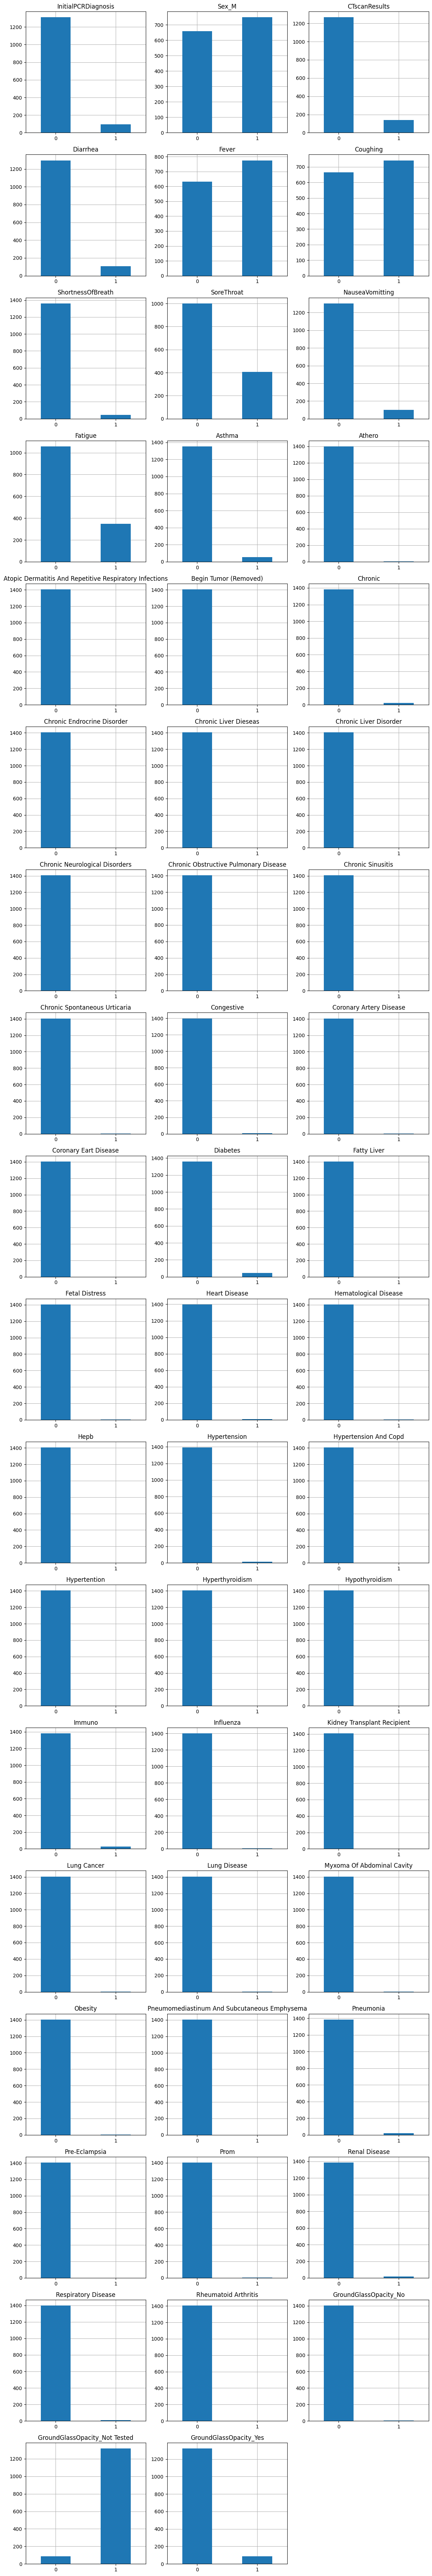

In [408]:
# Assuming 'binary_cols' is a list of your binary columns
n_cols = 3  # Maximum number of subplots per row
n_rows = (len(binary_cols) + n_cols - 1) // n_cols  # Calculate the number of rows needed

# Create subplots with max 3 per row
fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, n_rows * 4))  # Adjust figure height

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop over each binary column and plot the bar chart
for i, col in enumerate(binary_cols):
    value_counts = covid_flu[col].value_counts().sort_index()  # Get counts for 0 and 1
    axes[i].bar(value_counts.index, value_counts.values, width=0.5, align='center', zorder=2)  # Bar plot with higher zorder
    axes[i].set_title(col)  # Set the title to the column name
    axes[i].set_xticks([0, 1])  # Ensure the x-axis shows 0 and 1 for binary data
    axes[i].set_xlim(-0.5, 1.5)  # Adjust x-limits to center bars above 0 and 1
    axes[i].grid(True, zorder=1)  # Enable grid behind bars with lower zorder

# Hide any unused subplots if the number of binary columns is less than the total subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Use tight_layout to ensure proper spacing
plt.tight_layout()
plt.show()

#### Bar Plots for Summarizing the Dummy Variables:

- Summarize the proportion of 1s and 0s across all dummy columns by calculating the sum of each dummy column.

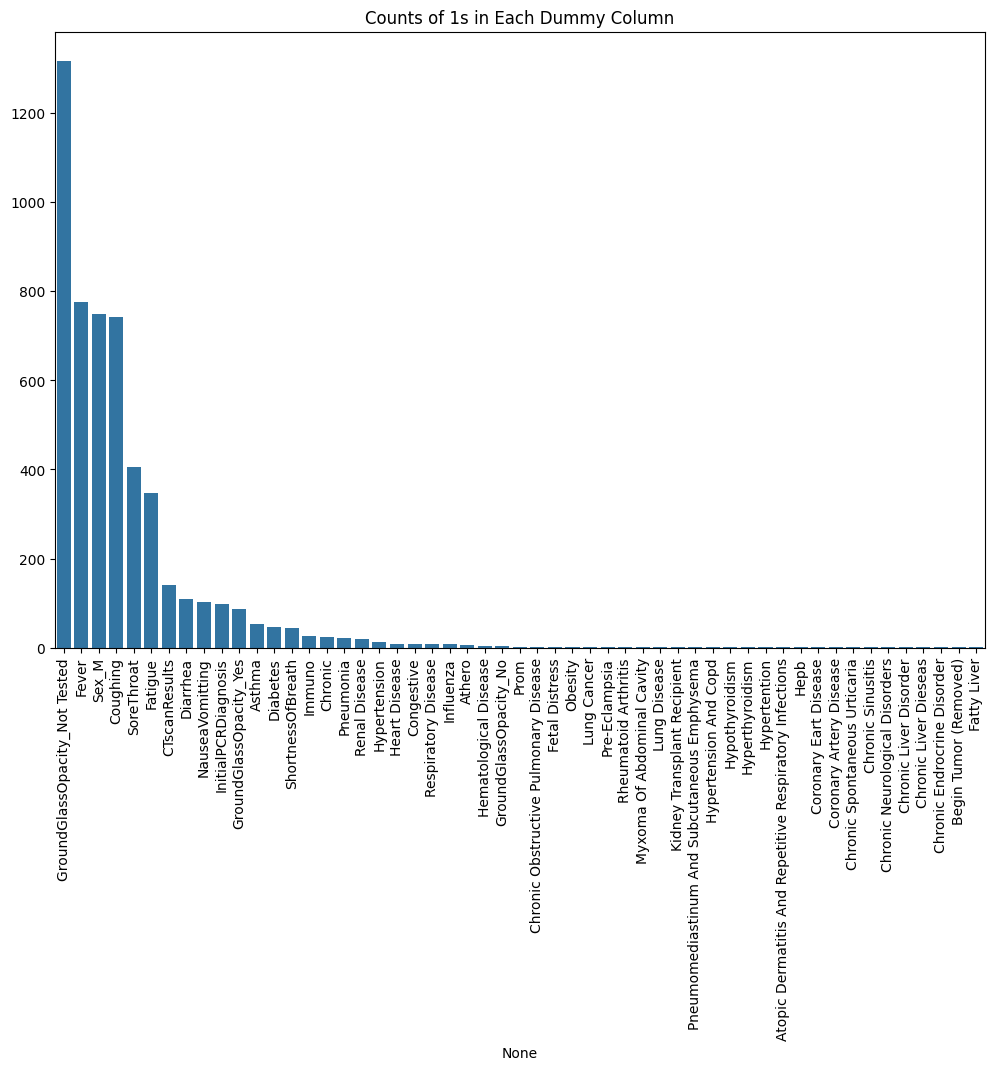

In [409]:
binary_summary = covid_flu[binary_cols].sum().sort_values(ascending=False)
plt.figure(figsize=(12, 8))
sns.barplot(x=binary_summary.index, y=binary_summary.values)
plt.xticks(rotation=90)
plt.title("Counts of 1s in Each Dummy Column")
plt.show()


In [411]:
covid_flu

Diagnosis  InitialPCRDiagnosis   Age  Sex_M  neutrophil  \
0         H1N1                    0  67.0      0    6.854078   
1         H1N1                    0  29.0      1    6.854078   
2         H1N1                    0  22.0      0    6.854078   
3         H1N1                    0  20.0      0    6.854078   
4         H1N1                    0  21.0      1    6.854078   
...        ...                  ...   ...    ...         ...   
1472   COVID19                    0  35.0      1    2.620000   
1473   COVID19                    0  51.0      1    3.180000   
1474   COVID19                    0  65.0      0    5.350000   
1475   COVID19                    0  72.0      1    3.730000   
1476   COVID19                    0  56.0      0    3.000000   

      serumLevelsOfWhiteBloodCell  lymphocytes  CReactiveProteinLevels  \
0                        6.885159     1.850154               31.305152   
1                        6.885159     1.850154               31.305152   
2                        6.885159     1.850154               31.305152   
3                        6.885159     1.850154               31.305152   
4                        6.885159     1.850154               31.305152   
...                           ...          ...                     ...   
1472                     4.620000     1.590000               35.600000   
1473                     4.940000     1.450000               13.000000   
1474                     5.890000     0.420000               33.200000   
1475                     4.990000     1.850154               85.000000   
1476                     3.980000     0.830000               28.400000   

      DurationOfIllness  CTscanResults  Diarrhea  Fever  Coughing  \
0             13.988506              0         0      1         1   
1             13.988506              0         0      0         0   
2             13.988506              0         0      0         0   
3             13.988506              0         0      1         1   
4             13.988506              0         0      0         0   
...                 ...            ...       ...    ...       ...   
1472          13.988506              0         0      1         1   
1473          13.988506              0         0      0         1   
1474          13.988506              0         0      1         1   
1475          13.988506              0         0      1         1   
1476          13.988506              0         0      1         1   

      ShortnessOfBreath  SoreThroat  NauseaVomitting  Temperature  Fatigue  \
0                     0           0                0    38.111111        0   
1                     0           0                0    36.800000        0   
2                     0           0                0    36.800000        0   
3                     0           0                0    36.555556        1   
4                     0           0                0    36.800000        0   
...                 ...         ...              ...          ...      ...   
1472                  0           0                0    36.800000        0   
1473                  0           0                1    36.800000        0   
1474                  0           0                0    36.800000        0   
1475                  0           0                0    36.800000        0   
1476                  0           0                0    36.800000        0   

      Asthma  Athero  Atopic Dermatitis And Repetitive Respiratory Infections  \
0          0       0                                                  0         
1          0       0                                                  0         
2          0       0                                                  0         
3          0       0                                                  0         
4          0       0                                                  0         
...      ...     ...                                                ...         
1472       0  

### Target Column "Diagnosis" Containing Categorical Values ("H1N1" and "COVID19")

In [412]:
# Map 'H1N1' to 0 and 'COVID19' to 1 manually
covid_flu['Diagnosis'] = covid_flu['Diagnosis'].map({'H1N1': 0, 'COVID19': 1})

In [413]:
# Verify the encoding
print(covid_flu['Diagnosis'].unique())

[0 1]


In [414]:
covid_flu

Diagnosis  InitialPCRDiagnosis   Age  Sex_M  neutrophil  \
0             0                    0  67.0      0    6.854078   
1             0                    0  29.0      1    6.854078   
2             0                    0  22.0      0    6.854078   
3             0                    0  20.0      0    6.854078   
4             0                    0  21.0      1    6.854078   
...         ...                  ...   ...    ...         ...   
1472          1                    0  35.0      1    2.620000   
1473          1                    0  51.0      1    3.180000   
1474          1                    0  65.0      0    5.350000   
1475          1                    0  72.0      1    3.730000   
1476          1                    0  56.0      0    3.000000   

      serumLevelsOfWhiteBloodCell  lymphocytes  CReactiveProteinLevels  \
0                        6.885159     1.850154               31.305152   
1                        6.885159     1.850154               31.305152   
2                        6.885159     1.850154               31.305152   
3                        6.885159     1.850154               31.305152   
4                        6.885159     1.850154               31.305152   
...                           ...          ...                     ...   
1472                     4.620000     1.590000               35.600000   
1473                     4.940000     1.450000               13.000000   
1474                     5.890000     0.420000               33.200000   
1475                     4.990000     1.850154               85.000000   
1476                     3.980000     0.830000               28.400000   

      DurationOfIllness  CTscanResults  Diarrhea  Fever  Coughing  \
0             13.988506              0         0      1         1   
1             13.988506              0         0      0         0   
2             13.988506              0         0      0         0   
3             13.988506              0         0      1         1   
4             13.988506              0         0      0         0   
...                 ...            ...       ...    ...       ...   
1472          13.988506              0         0      1         1   
1473          13.988506              0         0      0         1   
1474          13.988506              0         0      1         1   
1475          13.988506              0         0      1         1   
1476          13.988506              0         0      1         1   

      ShortnessOfBreath  SoreThroat  NauseaVomitting  Temperature  Fatigue  \
0                     0           0                0    38.111111        0   
1                     0           0                0    36.800000        0   
2                     0           0                0    36.800000        0   
3                     0           0                0    36.555556        1   
4                     0           0                0    36.800000        0   
...                 ...         ...              ...          ...      ...   
1472                  0           0                0    36.800000        0   
1473                  0           0                1    36.800000        0   
1474                  0           0                0    36.800000        0   
1475                  0           0                0    36.800000        0   
1476                  0           0                0    36.800000        0   

      Asthma  Athero  Atopic Dermatitis And Repetitive Respiratory Infections  \
0          0       0                                                  0         
1          0       0                                                  0         
2          0       0                                                  0         
3          0       0                                                  0         
4          0       0                                                  0         
...      ...     ...                                                ...         
147

In [415]:
covid_flu['Diagnosis'].value_counts()

0    1017
1     389
Name: Diagnosis, dtype: int64

### Convert all int64 columns to uint8

In [416]:
# Convert all int64 columns to uint8
covid_flu = covid_flu.astype({col: 'uint8' for col in covid_flu.select_dtypes(include=['int64']).columns})

In [417]:
covid_flu.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1406 entries, 0 to 1476
Data columns (total 61 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   Diagnosis                                                1406 non-null   uint8  
 1   InitialPCRDiagnosis                                      1406 non-null   uint8  
 2   Age                                                      1406 non-null   float64
 3   Sex_M                                                    1406 non-null   uint8  
 4   neutrophil                                               1406 non-null   float64
 5   serumLevelsOfWhiteBloodCell                              1406 non-null   float64
 6   lymphocytes                                              1406 non-null   float64
 7   CReactiveProteinLevels                                   1406 non-null   float64
 8   DurationOfIllness           

In [418]:
covid_flu.head()

Diagnosis  InitialPCRDiagnosis   Age  Sex_M  neutrophil  \
0          0                    0  67.0      0    6.854078   
1          0                    0  29.0      1    6.854078   
2          0                    0  22.0      0    6.854078   
3          0                    0  20.0      0    6.854078   
4          0                    0  21.0      1    6.854078   

   serumLevelsOfWhiteBloodCell  lymphocytes  CReactiveProteinLevels  \
0                     6.885159     1.850154               31.305152   
1                     6.885159     1.850154               31.305152   
2                     6.885159     1.850154               31.305152   
3                     6.885159     1.850154               31.305152   
4                     6.885159     1.850154               31.305152   

   DurationOfIllness  CTscanResults  Diarrhea  Fever  Coughing  \
0          13.988506              0         0      1         1   
1          13.988506              0         0      0         0   
2          13.988506              0         0      0         0   
3          13.988506              0         0      1         1   
4          13.988506              0         0      0         0   

   ShortnessOfBreath  SoreThroat  NauseaVomitting  Temperature  Fatigue  \
0                  0           0                0    38.111111        0   
1                  0           0                0    36.800000        0   
2                  0           0                0    36.800000        0   
3                  0           0                0    36.555556        1   
4                  0           0                0    36.800000        0   

   Asthma  Athero  Atopic Dermatitis And Repetitive Respiratory Infections  \
0       0       0                                                  0         
1       0       0                                                  0         
2       0       0                                                  0         
3       0       0                                                  0         
4       0       0                                                  0         

   Begin Tumor (Removed)  Chronic  Chronic Endrocrine Disorder  \
0                      0        0                            0   
1                      0        0                            0   
2                      0        0                            0   
3                      0        0                            0   
4                      0        0                            0   

   Chronic Liver Dieseas  Chronic Liver Disorder  \
0                      0                       0   
1                      0                       0   
2                      0                       0   
3                      0                       0   
4                      0                       0   

   Chronic Neurological Disorders  Chronic Obstructive Pulmonary Disease  \
0                               0                                      0   
1                               0                                      0   
2                               0                                      0   
3                               0                                      0   
4                               0                                      0   

   Chronic Sinusitis  Chronic Spontaneous Urticaria  Congestive  \
0                  0                              0           0   
1                  0                              0           0   
2                  0                              0           0   
3                  0                              0           0   
4                  0                              0           0   

   Coronary Artery Disease  Coronary Eart Disease  Diabetes  Fatty Liver  \
0                        0                      0         0            0   
1                        0                      0         0            0   
2                        0                      0         0            0   
3           

### C. Duplicate removal

In [419]:
covid_flu.shape

(1406, 61)

In [420]:
# Sort the entire dataset by all columns to group duplicates together
covid_flu_sorted = covid_flu.sort_values(by=covid_flu.columns.tolist())

In [421]:
# Identify duplicate rows (based on all columns)
duplicates = covid_flu[covid_flu.duplicated(keep=False)]

In [422]:
# To print all duplicate occurrences (including the first)
duplicates = covid_flu[covid_flu.duplicated(keep=False)]

In [423]:
duplicates

Diagnosis  InitialPCRDiagnosis   Age  Sex_M  neutrophil  \
1             0                    0  29.0      1    6.854078   
2             0                    0  22.0      0    6.854078   
5             0                    0  22.0      0    6.854078   
6             0                    0  19.0      0    6.854078   
9             0                    0  18.0      1    6.854078   
...         ...                  ...   ...    ...         ...   
1318          1                    0   7.0      0    6.854078   
1370          1                    0  57.0      1    6.854078   
1372          1                    0  30.0      0    6.854078   
1403          1                    0  57.0      1    6.854078   
1416          1                    0  32.0      0    6.854078   

      serumLevelsOfWhiteBloodCell  lymphocytes  CReactiveProteinLevels  \
1                        6.885159     1.850154               31.305152   
2                        6.885159     1.850154               31.305152   
5                        6.885159     1.850154               31.305152   
6                        6.885159     1.850154               31.305152   
9                        6.885159     1.850154               31.305152   
...                           ...          ...                     ...   
1318                     6.885159     1.850154               31.305152   
1370                     6.885159     1.850154               31.305152   
1372                     6.885159     1.850154               31.305152   
1403                     6.885159     1.850154               31.305152   
1416                     6.885159     1.850154               31.305152   

      DurationOfIllness  CTscanResults  Diarrhea  Fever  Coughing  \
1             13.988506              0         0      0         0   
2             13.988506              0         0      0         0   
5             13.988506              0         0      0         0   
6             13.988506              0         0      0         0   
9             13.988506              0         0      0         0   
...                 ...            ...       ...    ...       ...   
1318          13.988506              0         0      0         0   
1370          13.988506              1         0      0         0   
1372          13.988506              0         0      0         0   
1403          13.988506              1         0      0         0   
1416          13.988506              0         0      1         0   

      ShortnessOfBreath  SoreThroat  NauseaVomitting  Temperature  Fatigue  \
1                     0           0                0         36.8        0   
2                     0           0                0         36.8        0   
5                     0           0                0         36.8        0   
6                     0           0                0         36.8        0   
9                     0           0                0         36.8        0   
...                 ...         ...              ...          ...      ...   
1318                  0           0                0         36.8        0   
1370                  0           0                0         36.8        0   
1372                  0           0                0         36.8        0   
1403                  0           0                0         36.8        0   
1416                  0           0                0         36.8        0   

      Asthma  Athero  Atopic Dermatitis And Repetitive Respiratory Infections  \
1          0       0                                                  0         
2          0       0                                                  0         
5          0       0                                                  0         
6          0       0                                                  0         
9          0       0                                                  0         
...      ...     ...                                                ...         
131

In [424]:
# Remove duplicate rows based on all columns
covid_flu = covid_flu.drop_duplicates()

In [425]:
covid_flu.shape

(1107, 61)

# 3. Feature Importance

### Random Forest Classifier

This approach uses Random Forest to compute feature importance based on the Gini impurity (or information gain). Features are sorted and displayed from most important to least important.

In [426]:
# Assuming covid_flu is your DataFrame, and 'Diagnosis' is the target column
X = covid_flu.drop(columns=['Diagnosis'])
y = covid_flu['Diagnosis']

In [427]:
# Train a Random Forest model
rf = RandomForestClassifier(random_state=2024)
rf.fit(X, y)

RandomForestClassifier(random_state=2024)

In [428]:
# Get feature importances
importances = rf.feature_importances_
features = X.columns

In [429]:
# Create a DataFrame to display feature importances
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

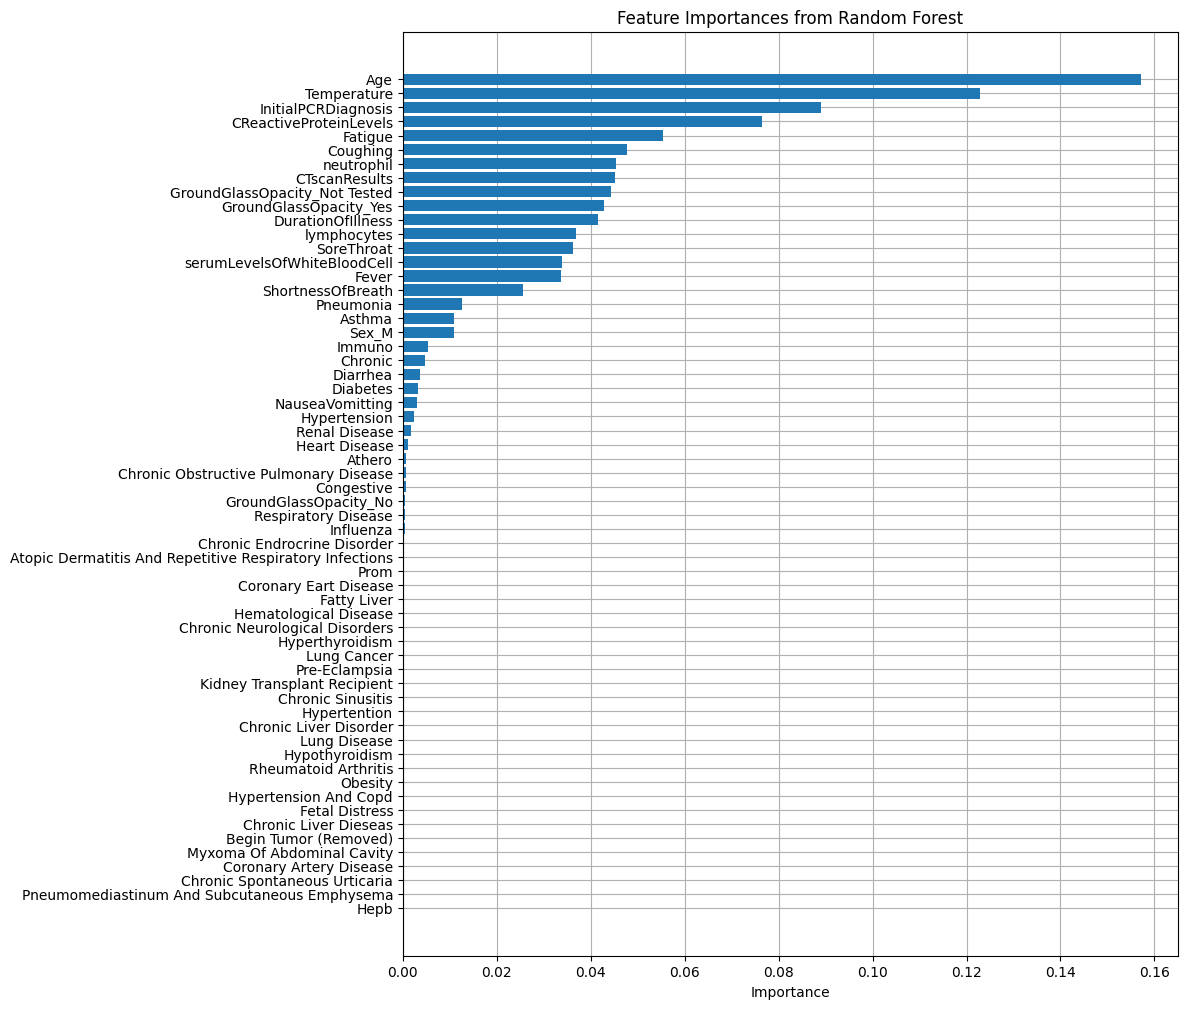

In [430]:
# Plot feature importances
plt.figure(figsize=(10, 12))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], zorder=2)
plt.gca().invert_yaxis()
plt.title('Feature Importances from Random Forest')
plt.xlabel('Importance')
plt.grid(True, zorder=1)
plt.show()

In [431]:
feature_importance_df.head(10)

Feature  Importance
1                             Age    0.157127
15                    Temperature    0.122964
0             InitialPCRDiagnosis    0.088918
6          CReactiveProteinLevels    0.076433
16                        Fatigue    0.055469
11                       Coughing    0.047653
3                      neutrophil    0.045434
8                   CTscanResults    0.045116
58  GroundGlassOpacity_Not Tested    0.044335
59         GroundGlassOpacity_Yes    0.042822

### Permutation Importance (Model-Agnostic)

Permutation Importance shuffles each feature and measures the drop in accuracy. Larger drops mean the feature is important. This method works for any model, not just tree-based ones.

In [432]:
# Train your Random Forest or any classifier
model = RandomForestClassifier(random_state=2024)
model.fit(X, y)

RandomForestClassifier(random_state=2024)

In [433]:
# Compute permutation importance
perm_importance = permutation_importance(model, X, y, n_repeats=30, random_state=2024)

In [434]:
# Create a DataFrame for visualization
perm_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': perm_importance.importances_mean})
perm_importance_df = perm_importance_df.sort_values(by='Importance', ascending=False)

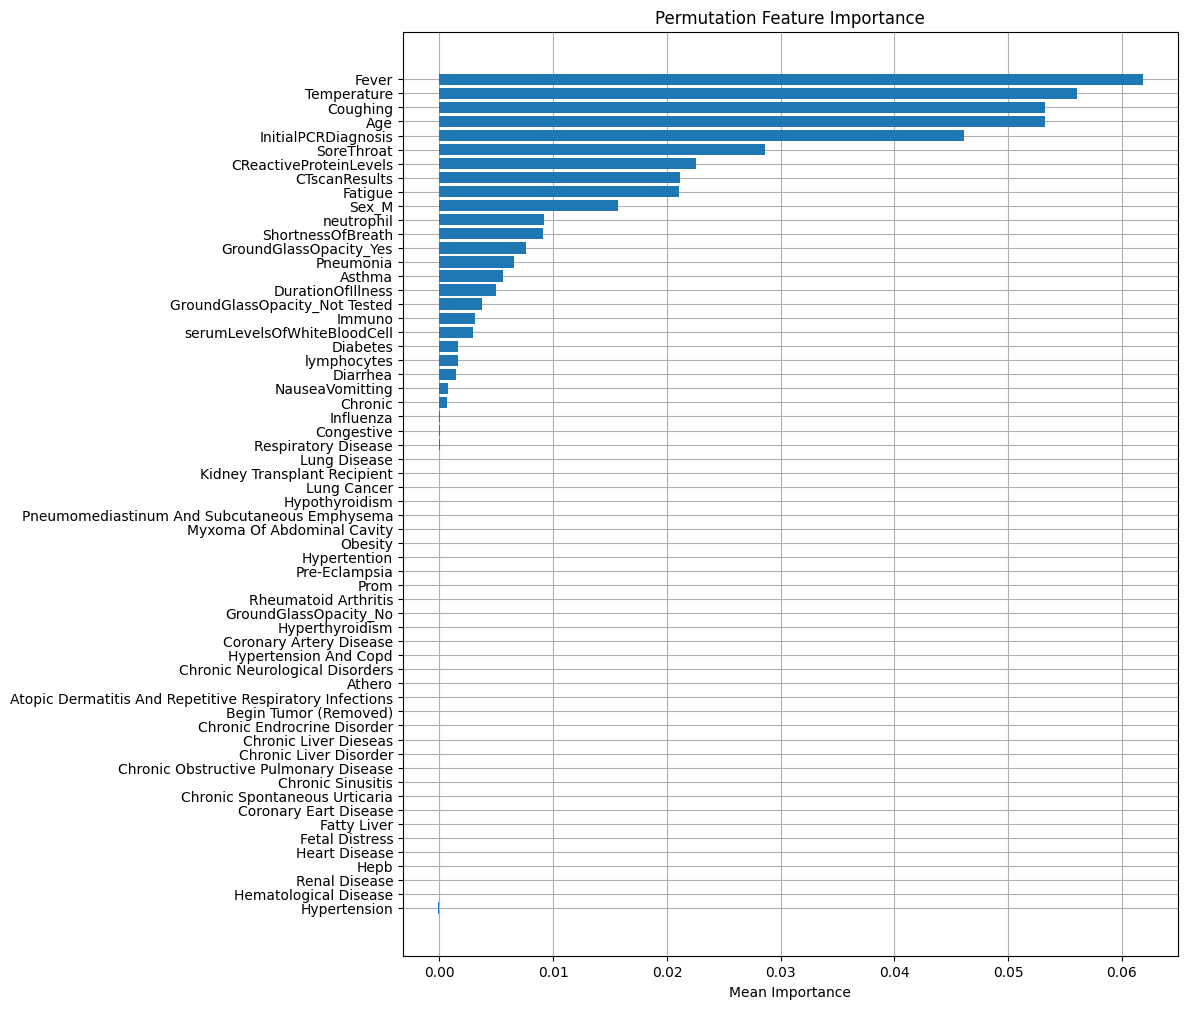

In [435]:
# Plot
plt.figure(figsize=(10, 12))
plt.barh(perm_importance_df['Feature'], perm_importance_df['Importance'], zorder=2)
plt.gca().invert_yaxis()
plt.title('Permutation Feature Importance')
plt.xlabel('Mean Importance')
plt.grid(True, zorder=1)
plt.show()

In [436]:
perm_importance_df.head(10)

Feature  Importance
10                   Fever    0.061819
15             Temperature    0.056037
11                Coughing    0.053237
1                      Age    0.053237
0      InitialPCRDiagnosis    0.046101
13              SoreThroat    0.028636
6   CReactiveProteinLevels    0.022523
8            CTscanResults    0.021168
16                 Fatigue    0.021078
2                    Sex_M    0.015658

### Logistic Regression Coefficients

Using Logistic Regression, the absolute value of the model coefficients gives you an indication of feature importance.

In [437]:
# Train a logistic regression model
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X, y)

LogisticRegression(max_iter=1000)

In [438]:
# Get the coefficients (feature importance)
coefficients = np.abs(log_reg.coef_[0])

In [439]:
# Create a DataFrame for visualization
coef_importance_df = pd.DataFrame({'Feature': X.columns, 'Coefficient': coefficients})
coef_importance_df = coef_importance_df.sort_values(by='Coefficient', ascending=False)

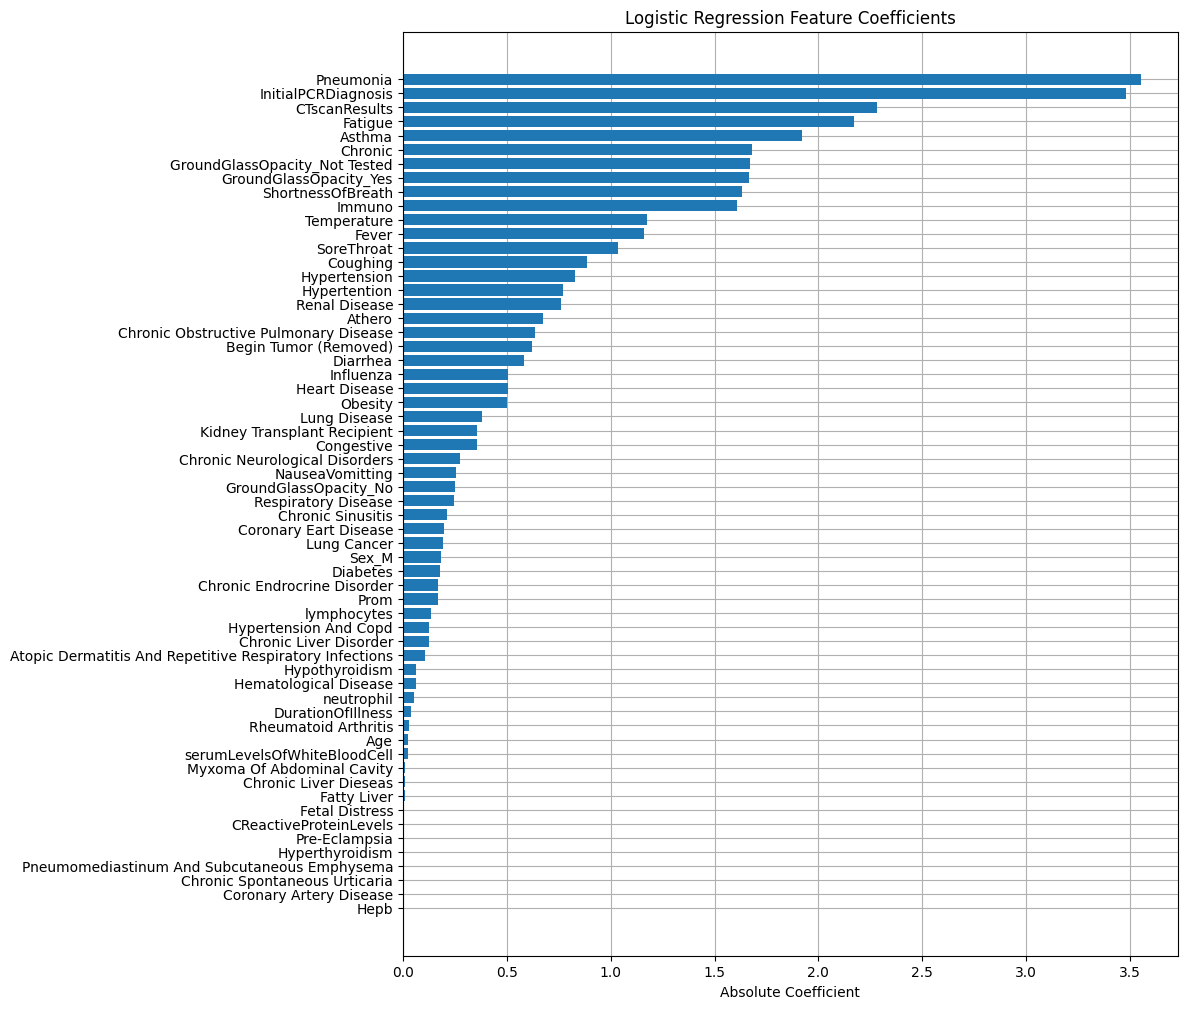

In [440]:
# Plot
plt.figure(figsize=(10, 12))
plt.barh(coef_importance_df['Feature'], coef_importance_df['Coefficient'], zorder=2)
plt.gca().invert_yaxis()
plt.title('Logistic Regression Feature Coefficients')
plt.xlabel('Absolute Coefficient')
plt.grid(True, zorder=1)
plt.show()

In [441]:
coef_importance_df.head(10)

Feature  Coefficient
51                      Pneumonia     3.552462
0             InitialPCRDiagnosis     3.478262
8                   CTscanResults     2.281059
16                        Fatigue     2.171921
17                         Asthma     1.919036
21                        Chronic     1.681700
58  GroundGlassOpacity_Not Tested     1.669821
59         GroundGlassOpacity_Yes     1.668095
12              ShortnessOfBreath     1.630686
43                         Immuno     1.606824

Working with complex data and models, Permutation Importance is often the most reliable and versatile. 

The Permutation Importance method highlights Fever as the most influential feature (0.0618) in predicting Diagnosis, followed by Temperature (0.0560), Coughing (0.0532), and Age (0.0532). Other notable features include InitialPCRDiagnosis and SoreThroat, with moderate impact. Overall, the most important features are related to symptomatic conditions and patient characteristics, which align with expectations in a diagnostic setting.

# 4. Data Augmentation

In [442]:
# Step 1: Prepare the data by identifying binary (discrete) columns
# Binary columns (uint8) are treated as categorical in CTGAN
binary_cols = covid_flu.select_dtypes(include=['uint8']).columns.tolist()

In [443]:
# Step 2: Initialize the CTGAN model
ctgan = CTGAN(epochs=500)

In [444]:
# Step 3: Fit the CTGAN model on your dataset
# The binary_cols will be treated as categorical (discrete) features
ctgan.fit(covid_flu, discrete_columns=binary_cols)

In [445]:
# Step 4: Generate synthetic data (e.g., generate 1000 new samples)
synthetic_data = ctgan.sample(2000)

In [446]:
# Step 5: (Optional) Combine the synthetic data with the original data
augmented_data = pd.concat([covid_flu, synthetic_data], ignore_index=True)

In [447]:
# Step 6: Display the first few rows of the augmented dataset
augmented_data.head()

Diagnosis  InitialPCRDiagnosis   Age  Sex_M  neutrophil  \
0          0                    0  67.0      0    6.854078   
1          0                    0  29.0      1    6.854078   
2          0                    0  22.0      0    6.854078   
3          0                    0  20.0      0    6.854078   
4          0                    0  21.0      1    6.854078   

   serumLevelsOfWhiteBloodCell  lymphocytes  CReactiveProteinLevels  \
0                     6.885159     1.850154               31.305152   
1                     6.885159     1.850154               31.305152   
2                     6.885159     1.850154               31.305152   
3                     6.885159     1.850154               31.305152   
4                     6.885159     1.850154               31.305152   

   DurationOfIllness  CTscanResults  Diarrhea  Fever  Coughing  \
0          13.988506              0         0      1         1   
1          13.988506              0         0      0         0   
2          13.988506              0         0      0         0   
3          13.988506              0         0      1         1   
4          13.988506              0         0      0         0   

   ShortnessOfBreath  SoreThroat  NauseaVomitting  Temperature  Fatigue  \
0                  0           0                0    38.111111        0   
1                  0           0                0    36.800000        0   
2                  0           0                0    36.800000        0   
3                  0           0                0    36.555556        1   
4                  0           0                0    36.800000        0   

   Asthma  Athero  Atopic Dermatitis And Repetitive Respiratory Infections  \
0       0       0                                                  0         
1       0       0                                                  0         
2       0       0                                                  0         
3       0       0                                                  0         
4       0       0                                                  0         

   Begin Tumor (Removed)  Chronic  Chronic Endrocrine Disorder  \
0                      0        0                            0   
1                      0        0                            0   
2                      0        0                            0   
3                      0        0                            0   
4                      0        0                            0   

   Chronic Liver Dieseas  Chronic Liver Disorder  \
0                      0                       0   
1                      0                       0   
2                      0                       0   
3                      0                       0   
4                      0                       0   

   Chronic Neurological Disorders  Chronic Obstructive Pulmonary Disease  \
0                               0                                      0   
1                               0                                      0   
2                               0                                      0   
3                               0                                      0   
4                               0                                      0   

   Chronic Sinusitis  Chronic Spontaneous Urticaria  Congestive  \
0                  0                              0           0   
1                  0                              0           0   
2                  0                              0           0   
3                  0                              0           0   
4                  0                              0           0   

   Coronary Artery Disease  Coronary Eart Disease  Diabetes  Fatty Liver  \
0                        0                      0         0            0   
1                        0                      0         0            0   
2                        0                      0         0            0   
3           

In [448]:
augmented_data.shape

(3107, 61)

# 5. t-SNE (t-distributed Stochastic Neighbor Embedding)

In [449]:
# Assuming X is your features and y is the target (e.g., 'Diagnosis')
# X = covid_flu.drop(columns=['Diagnosis'])
# y = covid_flu['Diagnosis']

X = augmented_data.drop(columns=['Diagnosis'])
y = augmented_data['Diagnosis']

In [455]:
# Apply t-SNE to reduce the dataset to 2 dimensions
tsne = TSNE(n_components=2, random_state=2024)

In [456]:
# Fit t-SNE on the original dataset
X_tsne = tsne.fit_transform(X)

In [457]:
# Create a DataFrame to hold the t-SNE results along with the target
tsne_df = pd.DataFrame(X_tsne, columns=['Component 1', 'Component 2'])
tsne_df['Diagnosis'] = y.reset_index(drop=True)

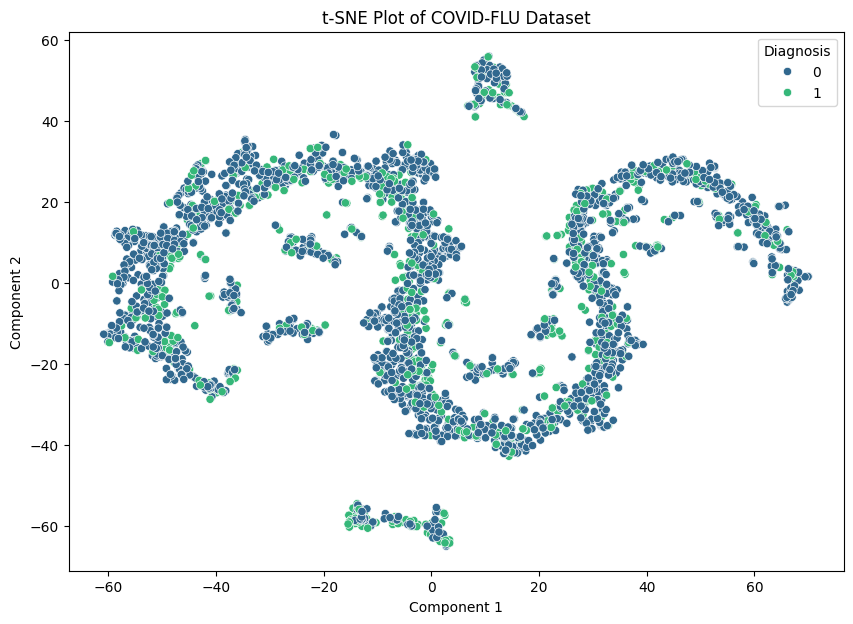

In [458]:
# Plot the t-SNE results with seaborn
plt.figure(figsize=(10, 7))
sns.scatterplot(x='Component 1', y='Component 2', hue='Diagnosis', palette='viridis', data=tsne_df)
plt.title('t-SNE Plot of COVID-FLU Dataset')
plt.show()

# 5. Dataset Training Preparation

In [463]:
# Diagnosis' is the target column

# Separate features and target variable
# X = covid_flu.drop(columns=['Diagnosis'])
# y = covid_flu['Diagnosis']

X = augmented_data.drop(columns=['Diagnosis'])
y = augmented_data['Diagnosis']

In [464]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=2024, stratify=y)

In [465]:
# Balance the training set using SMOTE
smote = SMOTE(random_state=2024)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

In [466]:
# Verify the class distribution after balancing
print("Class distribution in the balanced training set:")
print(y_train_balanced.value_counts())

Class distribution in the balanced training set:
1    1993
0    1993
Name: Diagnosis, dtype: int64


In [467]:
# Verify the class distribution
print("Class distribution in the testing set:")
print(y_test.value_counts())

Class distribution in the testing set:
0    353
1    114
Name: Diagnosis, dtype: int64


# 6. Transformation/Standardization

In [ ]:
# Initialize the StandardScaler
# scaler = StandardScaler()

# # Apply Standard Scaling
# covid_flu[numerical_cols] = scaler.fit_transform(covid_flu[numerical_cols])

In [468]:
# Apply log normalization
for feature in numerical_columns:
    covid_flu[feature] = np.log1p(covid_flu[feature])

In [ ]:
# # Initialize the PowerTransformer with the Yeo-Johnson method
# transformer = PowerTransformer(method='yeo-johnson')

# # Apply the transformation to the specified numerical columns
# covid_flu[numerical_columns] = transformer.fit_transform(covid_flu[numerical_columns])

# 7. Train and Evaluate Multiple Models with Cross-Validation

### Classic ML Models

In [469]:
# Increase iterations for models like Logistic Regression and SVM
models = {
    'Logistic Regression': LogisticRegression(max_iter=5000),  # Increased iterations
    'Random Forest': RandomForestClassifier(n_estimators=200, max_depth=None),  # Increased number of trees
    'Support Vector Machine': SVC(max_iter=5000, probability=True),  # Increased iterations
    'Decision Tree': DecisionTreeClassifier(max_depth=None),  # No max depth, letting the tree grow
    'Naive Bayes': GaussianNB(),  # Naive Bayes does not have iterative training, so no changes here
    # 'Three-Layer NN': MLPClassifier(hidden_layer_sizes=(64, 64, 32), max_iter=500)  # Three hidden layers with 64, 32, and 16 neurons
}

In [470]:
# KFold cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=2024)

In [471]:
# Dictionary to store cross-validation results
cv_results = {}

# Perform cross-validation for each model
for model_name, model in models.items():
    accuracies = []
    training_times = []
    
    for train_index, test_index in kf.split(X_train_balanced):
        X_train_fold, X_test_fold = X_train_balanced.iloc[train_index], X_train_balanced.iloc[test_index]
        y_train_fold, y_test_fold = y_train_balanced.iloc[train_index], y_train_balanced.iloc[test_index]
        
        # Record the start time
        start_time = time.time()
        
        # Train the model
        model.fit(X_train_fold, y_train_fold)
        
        # Record the end time
        end_time = time.time()
        
        # Calculate the duration
        duration = end_time - start_time
        training_times.append(duration)
        
        # Evaluate the model
        y_pred_fold = model.predict(X_test_fold)
        accuracy = accuracy_score(y_test_fold, y_pred_fold)
        accuracies.append(accuracy)
    
    # Store the results
    cv_results[model_name] = {
        'accuracy_mean': sum(accuracies) / len(accuracies),
        'accuracy_std': (max(accuracies) - min(accuracies)) / 2,
        'training_time_mean': sum(training_times) / len(training_times)
    }
    
    # Print the results
    print(f"{model_name} - Mean Accuracy: {cv_results[model_name]['accuracy_mean']:.4f}, Std: {cv_results[model_name]['accuracy_std']:.4f}, Mean Training Time: {cv_results[model_name]['training_time_mean']:.2f} seconds")

Logistic Regression - Mean Accuracy: 0.7469, Std: 0.0326, Mean Training Time: 0.75 seconds
Random Forest - Mean Accuracy: 0.8583, Std: 0.0152, Mean Training Time: 0.65 seconds
Support Vector Machine - Mean Accuracy: 0.6209, Std: 0.0183, Mean Training Time: 1.69 seconds
Decision Tree - Mean Accuracy: 0.7657, Std: 0.0326, Mean Training Time: 0.02 seconds
Naive Bayes - Mean Accuracy: 0.5768, Std: 0.0271, Mean Training Time: 0.00 seconds


### Neural Network

In [473]:
# Step 1: Define the neural network model
model = Sequential()

In [474]:
# Step 2: Add hidden layers with LeakyReLU activation
model.add(Dense(32, input_dim=X_train.shape[1], kernel_regularizer=l2(0.001)))  # Input layer
model.add(LeakyReLU(alpha=0.1))  # LeakyReLU activation for the first hidden layer
model.add(Dropout(0.3))  # Dropout layer to reduce overfitting
# model.add(BatchNormalization())  # Batch Normalization

model.add(Dense(64, kernel_regularizer=l2(0.001)))
model.add(LeakyReLU(alpha=0.1))  # LeakyReLU activation for the second hidden layer
model.add(Dropout(0.3))  # Dropout layer to reduce overfitting
# model.add(BatchNormalization())  # Batch Normalization

model.add(Dense(32, kernel_regularizer=l2(0.001)))
model.add(LeakyReLU(alpha=0.1))  # LeakyReLU activation for the third hidden layer
model.add(Dropout(0.3))  # Dropout layer to reduce overfitting
# model.add(BatchNormalization())  # Batch Normalization

# Step 3: Add output layer with sigmoid activation (logistic regression)
# Output layer
model.add(Dense(1, activation='sigmoid'))  # Logistic regression for binary classification

In [475]:
# # Step 4: Compile the model
# model.compile(optimizer=Adam(learning_rate=0.0001), 
#               loss='binary_crossentropy', 
#               metrics=['accuracy'])

# Step 4: Compile the model with AdamW
model.compile(optimizer=AdamW(learning_rate=0.001, weight_decay=0.0001), 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

In [476]:
# Step 5: Train the model
# Train the model with an explicit validation set



history = model.fit(X_train, y_train, validation_data=(X_test, y_test), 
                    epochs=200, batch_size=128)#, callbacks=[early_stopping, lr_scheduler])

# history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=64)

Epoch 1/200
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5236 - loss: 1.6982 - val_accuracy: 0.7559 - val_loss: 0.7429
Epoch 2/200
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6751 - loss: 0.9412 - val_accuracy: 0.7537 - val_loss: 0.6868
Epoch 3/200
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6948 - loss: 0.7578 - val_accuracy: 0.7559 - val_loss: 0.6829
Epoch 4/200
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7208 - loss: 0.7357 - val_accuracy: 0.7559 - val_loss: 0.6818
Epoch 5/200
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7325 - loss: 0.7141 - val_accuracy: 0.7559 - val_loss: 0.6856
Epoch 6/200
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7400 - loss: 0.7166 - val_accuracy: 0.7559 - val_loss: 0.6783
Epoch 7/200
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7380 - loss: 0.6842 - val_accuracy: 0.7559 - val_loss: 0.6707
Epoch 8/200
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7433 - loss: 0.6926 - val_accuracy: 0.7559 - v

In [957]:
# Step 6: Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy:.4f}")

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 833us/step - accuracy: 0.9457 - loss: 0.2034
Test Accuracy: 0.9336


After training on the dataset, the Neural Network achieved the highest accuracy with a mean of 94.57%, demonstrating its strong performance. Random Forest followed with an accuracy of 85.83%, showing stability with a low standard deviation (0.0152). Logistic Regression and the Decision Tree provided moderate accuracies at 74.69% and 76.57% respectively, while Support Vector Machine and Naive Bayes underperformed with accuracies of 62.09% and 57.68%. The Neural Network emerges as the most effective model, significantly outperforming the others in predictive accuracy.

### Key Metrics for Binary Classification

- Accuracy: Proportion of correct predictions (true positives and true negatives) out of all predictions.
- Precision: Proportion of true positives out of all positive predictions. Measures the quality of positive predictions.
- Recall: Proportion of true positives out of all actual positives. Measures the ability to detect positive cases.
- F1 Score: The harmonic mean of precision and recall. It balances the two metrics and is useful when dealing with class imbalance.

In [500]:
# Use the trained model to make predictions on the test set
y_pred = model.predict(X_test)

y_pred = (y_pred > 0.5).astype(int)

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 748us/step


In [501]:
# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [502]:
# Print the results
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Optionally, you can print a full classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.8030
Precision: 0.7500
Recall: 0.2895
F1 Score: 0.4177

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.97      0.88       353
           1       0.75      0.29      0.42       114

    accuracy                           0.80       467
   macro avg       0.78      0.63      0.65       467
weighted avg       0.79      0.80      0.77       467


Confusion Matrix:
[[342  11]
 [ 81  33]]


The model achieved an overall accuracy of 80.3%, indicating that it correctly predicted the target in the majority of cases. However, the performance on the minority class (class 1) is weaker, as shown by the precision of 75.0% and a significantly lower recall of 28.95%. This indicates that while the model is good at identifying positives when predicted (precision), it misses a large portion of the actual positives (recall), leading to an F1 score of 41.77% for class 1.

The confusion matrix reveals that the model correctly classified 342 out of 353 instances of class 0 (negative class) and 33 out of 114 instances of class 1 (positive class). The imbalance in the recall for class 1 highlights a need for improvement in detecting the positive class, as 81 instances were misclassified as negative.

In summary, while the model performs well for the majority class, its ability to detect the minority class is limited, which can be problematic in applications where identifying positive cases is crucial.

# 8. Examples

In [477]:
# Step 1: Ensure the covid_flu dataset is prepared similarly to training
X = covid_flu.drop(columns=['Diagnosis'])  # Features
y = covid_flu['Diagnosis']  # Original target values

In [478]:
# Step 2: Use the trained Neural Network model to predict on the entire dataset
# 'model' is your trained neural network
predictions = model.predict(X)

35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


In [479]:
# Convert predictions to binary values (if needed)
predictions_binary = (predictions > 0.5).astype(int)  # Assuming a binary classification with threshold 0.5

In [485]:
# Step 3: Create a DataFrame with features, original target values, and predictions
results_df = X.copy()  # Start with the features
results_df['Original_Diagnosis'] = y  # Add the original target values
results_df['Predicted_Diagnosis'] = predictions_binary.flatten()  # Add the predicted values

In [486]:
# Step 4: Reorder columns to have 'Predicted_Diagnosis' and 'Original_Diagnosis' first
cols = ['Predicted_Diagnosis', 'Original_Diagnosis'] + list(X.columns)  # Reorder columns
results_df = results_df[cols]

In [504]:
# Step 5: Save the DataFrame to a CSV file
results_df.to_csv('./data/covid_flu_predictions_with_features.csv', index=False)

In [488]:
results_df.shape

(1107, 62)

In [493]:
# Optionally, display the first few rows of the result
results_df.sample(frac=1).head(20)

Predicted_Diagnosis  Original_Diagnosis  InitialPCRDiagnosis       Age  \
1024                    0                   0                    0  3.135494   
6                       0                   0                    0  2.995732   
1067                    0                   0                    0  4.110874   
988                     0                   0                    0  2.708050   
1193                    1                   1                    1  3.583519   
1062                    0                   0                    0  3.332205   
1379                    1                   1                    1  3.258097   
1412                    0                   1                    0  3.555348   
1100                    0                   1                    0  4.060443   
893                     0                   0                    0  2.833213   
1423                    0                   1                    0  4.382027   
240                     0                   0                    0  4.304065   
296                     0                   0                    0  1.791759   
768                     0                   0                    0  3.912023   
1054                    0                   0                    0  3.332205   
651                     0                   0                    0  2.079442   
1244                    1                   1                    0  3.555348   
1186                    0                   1                    0  4.077537   
711                     0                   0                    0  2.484907   
1113                    0                   1                    0  0.223144   

      Sex_M  neutrophil  serumLevelsOfWhiteBloodCell  lymphocytes  \
1024      0    2.061033                     2.064982     1.047373   
6         0    2.061033                     2.064982     1.047373   
1067      1    2.061033                     1.648659     0.223144   
988       0    2.061033                     2.064982     1.047373   
1193      0    2.061033                     2.064982     1.047373   
1062      0    2.061033                     2.433613     0.122218   
1379      0    0.875469                     1.193922     0.587787   
1412      1    2.061033                     2.064982     1.047373   
1100      1    2.061033                     2.064982     0.357674   
893       1    2.061033                     2.064982     1.047373   
1423      1    2.753661                     2.064982     0.277632   
240       0    2.061033                     2.064982     1.047373   
296       1    2.061033                     2.064982     1.047373   
768       1    2.061033                     2.064982     1.047373   
1054      0    2.061033                     1.435085     0.343590   
651       1    2.061033                     2.064982     1.047373   
1244      0    2.061033                     2.089392     0.904218   
1186      1    2.061033                     2.064982     1.047373   
711       0    2.061033                     2.064982     1.047373   
1113      1    2.061033                     2.064982     1.047373   

      CReactiveProteinLevels  DurationOfIllness  CTscanResults  Diarrhea  \
1024                3.475227           2.707284              0         0   
6                   3.475227           2.707284              0         0   
1067                3.475227           2.707284              1         0   
988                 3.475227           2.707284              0         0   
1193                3.475227           2.707284              0         1   
1062                3.475227           2.707284              1         0   
1379                1.029619           2.707284              1         1   
1412                3.475227           2.707284              0         0   
1100                3.475227           2.707284              0         0   
893                 3.475227           2.707284              0         0   
1423                3.475227           

# 9. Conclusion

This project successfully demonstrated the use of machine learning to predict diagnosis from clinical and demographic features. The process included a thorough exploration of the dataset, data cleaning, feature importance analysis, data augmentation to handle class imbalance, and training various machine learning models. The Neural Network showed the strongest overall performance in terms of accuracy, while Random Forest provided valuable insights into feature importance.

Despite these successes, there remain challenges in detecting the minority class (positive cases), as seen in the lower recall for class 1. Future work could focus on improving recall for the positive class by employing techniques such as cost-sensitive learning, ensemble methods, or more sophisticated augmentation strategies.